<a href="https://colab.research.google.com/github/pippo97-jpg/DataScienceForBusiness/blob/main/ClimateChange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Climate change project



Global warming is real?

When it started?

Which is the causes and the effects?

Which is the trend of the temperatures in the next years?

N.B (In climate science, temperature anomaly represents temperature pattern accurately than absolute temperature. It is a measure of the departure from baseline temperature. Basically, it indicates how much warmer or cooler it is than the baseline. The baseline used here is the average temperature over the 30 year period 1951-1980 (base period used by NASA).)




In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd gdrive



---


**Importing libraries**


---



In [2]:
%matplotlib inline 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
sns.set_style("whitegrid", {'axes.grid' : False})

In [ ]:
# Main libraries for data manipulation
import numpy as np 
import pandas as pd
pd.set_option('display.max_columns', None) # Show all the columns 
pd.set_option('display.max_rows', 66) 

# Libraries for data visualization
import plotly.express as px
import plotly.offline as pyo
pyo.init_notebook_mode()

# Useful libraries
import warnings
warnings.filterwarnings('ignore')

!pip install fuzzywuzzy
import fuzzywuzzy
from fuzzywuzzy import process

import datetime

# Plotly
!pip install chart_studio

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go
import colorlover as cl
from plotly.subplots import make_subplots

# Colors
#maroon = rgb(128,0,0)
#chocolate = rgb(210,105,30)
#sky blue = rgb(135,206,235)
#olive drab = rgb(107,142,35)
#steel blue = rgb(70,130,180)



---

**Importing datasets**


---



In [12]:
# Food and feed production worlwide dataset
fao_df = pd.read_csv('/content/sample_data/FAO.csv', encoding='latin-1') 
df_prod = fao_df.copy()

# Greenhouse gases emission for food production dataset
emission_df = pd.read_csv('/content/sample_data/Food_Production.csv')
df_emiss = emission_df.copy()

# Temperatures change dataset
temperature_df = pd.read_csv('/content/sample_data/Environment_Temperature_change_E_All_Data_NOFLAG.csv', encoding='latin-1')
df_temp = temperature_df.copy()

# ISO-3 country code dataset
country_iso3 = pd.read_csv('/content/sample_data/FAOSTAT_data_11-24-2020.csv')

# Pollution concentrations
climateChange = pd.read_csv("/content/sample_data/climate-change.csv", index_col=0)

# Load the natural disaster dataset and store it in a dataframe
orig_disaster_data = pd.read_csv('/content/sample_data/number-of-natural-disaster-events.csv')
nat_disaster_df = orig_disaster_data.copy()

# Temperatures anomaly
temperature = pd.read_csv("/content/sample_data/temperature-anomaly.csv", index_col=0)

Firstly I analyse the temperature with this dataset: Environment_Temperature_change_E_All_Data_NOFLAG.csv

In [ ]:
print(f"Shape of the dataframe: {df_temp.shape[0]} rows and {df_temp.shape[1]} columns.")
print("\nColumns in this dataframe:\n", df_temp.columns)
df_temp.head()

Shape of the dataframe: 9656 rows and 69 columns.

Columns in this dataframe:
 Index(['Area Code', 'Area Code (M49)', 'Area', 'Months Code', 'Months',
       'Element Code', 'Element', 'Unit', 'Y1961', 'Y1962', 'Y1963', 'Y1964',
       'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969', 'Y1970', 'Y1971', 'Y1972',
       'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977', 'Y1978', 'Y1979', 'Y1980',
       'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985', 'Y1986', 'Y1987', 'Y1988',
       'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993', 'Y1994', 'Y1995', 'Y1996',
       'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001', 'Y2002', 'Y2003', 'Y2004',
       'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009', 'Y2010', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020',
       'Y2021'],
      dtype='object')


Area Code Area Code (M49)         Area  Months Code    Months  \
0          2            '004  Afghanistan         7001   January   
1          2            '004  Afghanistan         7001   January   
2          2            '004  Afghanistan         7002  February   
3          2            '004  Afghanistan         7002  February   
4          2            '004  Afghanistan         7003     March   

   Element Code             Element Unit  Y1961  Y1962  Y1963  Y1964  Y1965  \
0          7271  Temperature change   °C  0.786  0.039  2.718 -5.226  1.889   
1          6078  Standard Deviation   °C  1.944  1.944  1.944  1.944  1.944   
2          7271  Temperature change   °C -1.762  2.423  3.880 -0.209 -0.090   
3          6078  Standard Deviation   °C  2.603  2.603  2.603  2.603  2.603   
4          7271  Temperature change   °C  0.477  1.293  0.391  1.655 -0.897   

   Y1966  Y1967  Y1968  Y1969  Y1970  Y1971  Y1972  Y1973  Y1974  Y1975  \
0  3.638 -1.429  0.394 -2.524  0.824 -1.465 -1.237 -2.871 -1.181 -0.499   
1  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944   
2  3.383  0.282 -2.071 -3.436  2.101  0.872 -7.674  1.895 -3.652 -1.237   
3  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603   
4 -0.076 -0.768  0.486  2.277 -0.797  1.713 -1.725 -0.457  1.061 -0.595   

   Y1976  Y1977  Y1978  Y1979  Y1980  Y1981  Y1982  Y1983  Y1984  Y1985  \
0  2.404 -2.902 -0.608  1.069 -0.348  1.871  0.828  0.609  0.018  0.588   
1  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944   
2 -1.651 -0.090 -0.447  0.906 -1.071  1.236 -1.985  0.541 -4.206  2.581   
3  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603   
4 -2.789  3.302 -1.637 -1.351 -0.445  1.282 -1.681 -2.321  1.897 -0.091   

   Y1986  Y1987  Y1988  Y1989  Y1990  Y1991  Y1992  Y1993  Y1994  Y1995  \
0  0.453  2.807  1.297 -1.046  0.618  0.175  0.714 -0.647  1.250  1.412   
1  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944   
2 -0.097  1.548  0.292 -2.815 -0.273 -1.228 -0.011  1.579 -1.262 -0.038   
3  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603   
4 -3.040  1.659  0.051  0.155 -0.954 -0.763 -2.079 -1.375  1.393 -1.322   

   Y1996  Y1997  Y1998  Y1999  Y2000  Y2001  Y2002  Y2003  Y2004  Y2005  \
0 -0.627  1.515  1.089  0.994  1.703 -0.465  1.825  2.560  2.770  0.140   
1  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944   
2  0.949  0.131 -0.403  3.351 -0.829  0.815  1.018  1.774  3.200 -1.536   
3  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603   
4 -0.277  0.108 -0.484 -0.106 -0.175  1.349  2.045 -0.114  2.930  1.807   

   Y2006  Y2007  Y2008  Y2009  Y2010  Y2011  Y2012  Y2013  Y2014  Y2015  \
0 -1.366  0.597 -5.509  1.746  3.702  1.344 -0.425  1.368  1.761  1.937   
1  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944  1.944   
2  4.942  1.722 -2.229  2.539  1.304  0.263 -3.066  1.615 -3.110  2.592   
3  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603  2.603   
4  2.012 -0.008  4.398  2.574  3.468  0.888 -0.366  2.369 -0.061 -0.545   

   Y2016  Y2017  Y2018  Y2019  Y2020  Y2021  
0  3.612  1.273  2.127  2.978 -0.584  0.558  
1  1.944  1.944  1.944  1.944  1.944  1.944  
2  2.454 -0.189  2.760  0.112  2.548  4.149  
3  2.603  2.603  2.603  2.603  2.603  2.603  
4  2.459  0.923  4.580  0.354  0.611  2.557

In [ ]:
# Select the dataframe subset without standard deviation values
df_temp = df_temp.loc[df_temp.Element == 'Temperature change']

# Delete unnecessary columns 
df_temp.drop(columns=['Area Code', 'Months Code', 'Element Code', 'Element', 'Unit'], inplace=True)

# Remove 'Y' from year's labels
df_temp.rename(columns={x:x[1:] for x in df_temp.columns if 'Y' in x}, inplace=True)

# Change the names of 'Area' and 'Months' columns
df_temp.rename(columns={'Area': 'country_name', 'Months':'months'}, inplace=True)

**Missing values**

I proceed by clearing the dataframe from the missing values. First I’m going to visualize their presence and their position in the dataframe

In [ ]:
print("Dtype, Unique values and Missing values(%) of each column:")

df_temp_info= pd.DataFrame({"Dtype": df_temp.dtypes, 
                            "Unique values": df_temp.nunique(),
                            "Missing values(%)": round(df_temp.isnull().sum()/df_temp.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

df_temp_info

Dtype, Unique values and Missing values(%) of each column:


Dtype  Unique values  Missing values(%)
Columns                                                   
Area Code (M49)   object            284               0.00
country_name      object            284               0.00
months            object             17               0.00
1961             float64           2003              14.04
1962             float64           1878              13.84
1963             float64           1998              14.13
1964             float64           1936              14.54
1965             float64           1878              14.35
1966             float64           1955              13.17
1967             float64           1870              13.73
1968             float64           1911              14.02
1969             float64           1976              14.11
1970             float64           1878              14.15
1971             float64           1838              13.17
1972             float64           2044              12.70
1973             float64           2019              12.37
1974             float64           1887              12.78
1975             float64           1905              13.77
1976             float64           1958              13.42
1977             float64           1943              13.30
1978             float64           1878              13.21
1979             float64           1935              12.90
1980             float64           1902              13.05
1981             float64           1974              13.38
1982             float64           1982              13.79
1983             float64           2194              14.21
1984             float64           1988              13.65
1985             float64           1989              14.13
1986             float64           1957              13.88
1987             float64           2183              13.46
1988             float64           1984              13.17
1989             float64           2090              13.30
1990             float64           2075              13.73
1991             float64           1990              14.06
1992             float64           2365               7.31
1993             float64           2307               8.06
1994             float64           2273               8.22
1995             float64           2198               7.54
1996             float64           2186               7.27
1997             float64           2302               8.78
1998             float64           2307               7.87
1999             float64           2305               8.35
2000             float64           2324               8.22
2001             float64           2249               9.18
2002             float64           2244               8.22
2003             float64           2235               7.33
2004             float64           2070               7.44
2005             float64           2234               7.27
2006             float64           2349               6.86
2007             float64           2318               6.38
2008             float64           2399               7.17
2009             float64           2252               6.67
2010             float64           2466               7.10
2011             float64           2342               7.04
2012             float64           2394               7.25
2013             float64           2137               6.44
2014             float64           2272               7.13
2015             float64           2362               7.17
2016             float64           2321               7.50
2017             float64           2263               7.73
2018             float64           2456               7.29
2019             float64           2298               7.60
2020             float64           2380               7.81
2021             float64           2372               7.83

The missing values are more present in the period 1961 - 1991 and less frequent since 1992.

Unfortunately, I found no consistent explanation in the documentation available. Maybe for some countries the measurements have not been made due to the unavailability of the necessary technologies or other problems.

I proceed by deleting the rows that contain missing values from 1961 to 2021.

In [ ]:
# Get the indixes of the rows that contain at least a null value from 1961 to 2021
index_nan = df_temp.loc[df_temp.isnull().any(axis=1), '1961':].index

# Delete all rows with these indexes
df_temp.drop(index_nan, inplace=True)

In [ ]:
# check duplicates
df_temp.loc[df_temp.duplicated()]

Empty DataFrame
Columns: [Area Code (M49), country_name, months, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
Index: []

[0 rows x 64 columns]

The quantitative variables in the dataframe indicate the calculated temperature changes and no corrective action is required.

For qualitative variables, however, I must replace the decryption errors in the 'months' column and delete the lines containing the 'China' entry in 'country_name' column, because it's duplicated and already present under the name 'China, mainland'.

In [ ]:
# Fix decryption errors
df_temp.months.replace({
    'Mar\x96Apr\x96May': 'Spring',
    'Jun\x96Jul\x96Aug':'Summer',
    'Sep\x96Oct\x96Nov':'Fall',
    'Dec\x96Jan\x96Feb': 'Winter', 
    }, inplace=True)

# Get the indixes of the rows to be deleted
china_index = df_temp.loc[df_temp.country_name == 'China'].index

# Delete the rows
df_temp.drop(china_index, inplace=True)

# Reset the index
df_temp.reset_index(drop=True, inplace=True)

Add the ISO-3 codes to the dataframe and change the configuration from wide format to long format.

In [ ]:
# First check the dataset containing the ISO-3 codes to add to the temperature dataset
country_iso3.head()

Country Code        Country  M49 Code ISO2 Code ISO3 Code  Start Year  \
0             2    Afghanistan       4.0        AF       AFG         NaN   
1          5100         Africa       2.0       NaN       X06         NaN   
2           284  Åland Islands     248.0       NaN       ALA         NaN   
3             3        Albania       8.0        AL       ALB         NaN   
4             4        Algeria      12.0        DZ       DZA         NaN   

   End Year  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN

In [ ]:
# Delete unnecessary columns
country_iso3.drop(columns=['Country Code', 'M49 Code', 'ISO2 Code', 'Start Year', 'End Year'], inplace=True)

# Rename useful columns
country_iso3.rename(columns={'Country':'country_name','ISO3 Code':'country_code'},inplace=True)

# 'China, mainland' does not have the ISO3 code. Fix the problem by creating a filter...
filter_china = country_iso3['country_name'] == 'China, mainland'

# ...and replace the ISO3 code 'CHN' to the right place
country_iso3[filter_china] = country_iso3[filter_china].fillna('CHN') 

In [ ]:
# Do a merge between the two dataframe
df_temp = pd.merge(df_temp, country_iso3, how='inner', on='country_name')

# Do a melt to change the data layout
df_temp = df_temp.melt(

    id_vars=["country_code", "country_name", "months"], 
    value_vars=[str(n) for n in range(1961, 2019+1)], 
    var_name="years", 
    value_name="temp_changes")

df_temp.head()

country_code country_name    months years  temp_changes
0          AFG  Afghanistan   January  1961         0.786
1          AFG  Afghanistan  February  1961        -1.762
2          AFG  Afghanistan     March  1961         0.477
3          AFG  Afghanistan     April  1961        -1.745
4          AFG  Afghanistan       May  1961         1.365

## Is there any significant difference between seasons?

In [ ]:
# Create a filter for whole World
world_filter = df_temp.country_name == 'World'

# Create a filter for seasons
seasons_filter = df_temp.months.isin(['Winter', 'Spring', 'Summer', 'Fall'])

# Create a dataframe subset with newly created filters
seasons_variations = df_temp.loc[seasons_filter & world_filter, ['months', 'years', 'temp_changes']].reset_index(drop=True)

fig = px.line(
    seasons_variations,
    x='years',
    y='temp_changes',
    
    color = 'months',
    color_discrete_map={
        'Winter':'grey',
        'Spring':'green',
        'Summer':'yellow',
        'Fall':'orange'},

    hover_name='months',
    hover_data=dict(months=None),

    labels=dict(
        months='Season',
        years='Years',
        temp_changes="Temperature Change (°C)"))
fig.update_layout(
    width=950,
    height=550,

    title="Worldwide Temperature Changes by Seasons from 1961 to 2019",
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0,
        dtick = 4),
        
    legend_itemclick=False)    


# Create tuples and a for loop to use fig.add_notation once
x = (55, 55, 55, 54)
y = (2.165, 1.999, 1.359, 1.471)
ax = (-50, -90, -145, -100)
ay = (-30, -20, -60, -70)
seasons = ('Winter', 'Spring', 'Summer', 'Fall')
colors = ('gray', 'green', 'yellow', 'orange')
for n in range(4):

    fig.add_annotation(
    y=y[n],
    x=x[n],
    text=f"The Hottest {seasons[n]}",
    showarrow=True,

    align="center",
    arrowhead=2,
    arrowsize=1,
    arrowwidth=2,
    arrowcolor="black",
    ax=ax[n],
    ay=ay[n],

    bgcolor=f"{colors[n]}")

fig.update_traces(
    line_dash='dashdot',
    line_shape='spline')

fig.show()

In [ ]:
# Create a filter for whole World
world = df_temp.country_name == 'World'

# Create a filter for the 12 months
months = df_temp.months.isin(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Create a dataframe subset with newly created filters
montly_variations = df_temp.loc[months & world, ['months', 'years', 'temp_changes']].reset_index(drop=True)

fig = px.line_polar(
    montly_variations, 
    r='temp_changes',
    theta='months',

    animation_frame='years',
    line_close=True)

fig.update_layout(
    width=600,
    height=600,

    title="Worldwide Temperature Changes by Months from 1961 to 2021",
    title_x = 0.5,
    title_y = 0.97,
    title_xanchor='center',
    title_yanchor='top',

    polar=dict(radialaxis=dict(range=[-0.5, 3])))

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 300
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 80

fig.show()

Now I use another dataset of temperatures: 'temperatures-anomaly'
Because the first one it was "preapered" for the previous chart

In [13]:
 temperature

Code  Year  Median temperature anomaly from 1961-1990 average  \
Entity                                                                   
Global    NaN  1850                                             -0.373   
Global    NaN  1851                                             -0.218   
Global    NaN  1852                                             -0.228   
Global    NaN  1853                                             -0.269   
Global    NaN  1854                                             -0.248   
...       ...   ...                                                ...   
Tropics   NaN  2015                                              0.737   
Tropics   NaN  2016                                              0.763   
Tropics   NaN  2017                                              0.563   
Tropics   NaN  2018                                              0.473   
Tropics   NaN  2019                                              0.656   

         Upper bound (95% CI)  Lower bound (95% CI)  
Entity                                               
Global                 -0.339                -0.425  
Global                 -0.184                -0.274  
Global                 -0.196                -0.280  
Global                 -0.239                -0.321  
Global                 -0.218                -0.301  
...                       ...                   ...  
Tropics                 0.781                 0.690  
Tropics                 0.806                 0.713  
Tropics                 0.607                 0.514  
Tropics                 0.517                 0.424  
Tropics                 0.703                 0.607  

[680 rows x 5 columns]

I want a dataset with only the median temperature for the global world, with as index the 'Years'

In [14]:
temperature = temperature.drop(columns = ['Code', 'Upper bound (95% CI)', 'Lower bound (95% CI)'])
temperature

Year  Median temperature anomaly from 1961-1990 average
Entity                                                          
Global   1850                                             -0.373
Global   1851                                             -0.218
Global   1852                                             -0.228
Global   1853                                             -0.269
Global   1854                                             -0.248
...       ...                                                ...
Tropics  2015                                              0.737
Tropics  2016                                              0.763
Tropics  2017                                              0.563
Tropics  2018                                              0.473
Tropics  2019                                              0.656

[680 rows x 2 columns]

In [15]:
temperature = temperature.drop(["Tropics", "Northern Hemisphere", "Southern Hemisphere"])
temperature

Year  Median temperature anomaly from 1961-1990 average
Entity                                                         
Global  1850                                             -0.373
Global  1851                                             -0.218
Global  1852                                             -0.228
Global  1853                                             -0.269
Global  1854                                             -0.248
...      ...                                                ...
Global  2015                                              0.763
Global  2016                                              0.797
Global  2017                                              0.677
Global  2018                                              0.597
Global  2019                                              0.736

[170 rows x 2 columns]

In [16]:
temperature.set_index('Year', inplace = True)
temperature.rename(columns = {'Median temperature anomaly from 1961-1990 average':'Temperature anomaly'}, inplace = True)
temperature

Temperature anomaly
Year                     
1850               -0.373
1851               -0.218
1852               -0.228
1853               -0.269
1854               -0.248
...                   ...
2015                0.763
2016                0.797
2017                0.677
2018                0.597
2019                0.736

[170 rows x 1 columns]

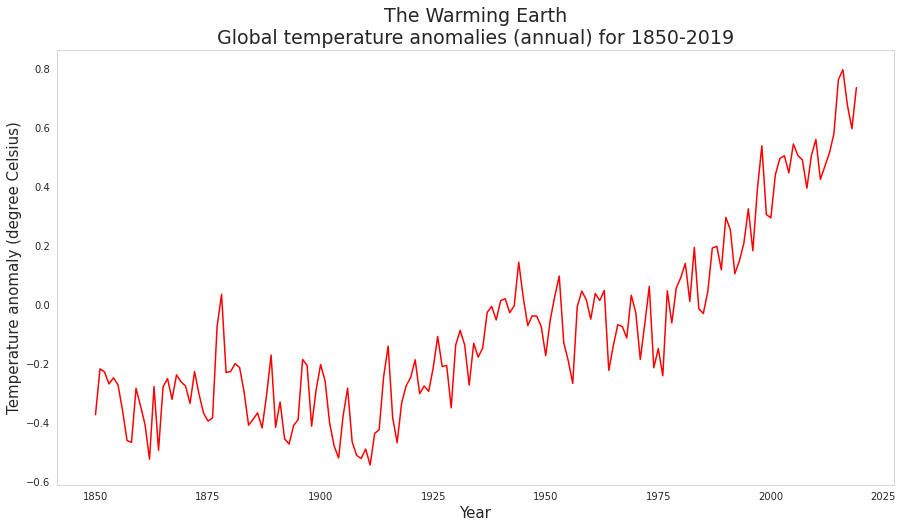

In [18]:
# Plot the temperature anomaly
plt.figure(figsize = (15, 8))

plt.plot(temperature['Temperature anomaly'], 'r')

plt.title('The Warming Earth\nGlobal temperature anomalies (annual) for 1850-2019', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)

plt.show()

#Now I analyse the pollution impact

In [68]:
climateChange

Year  CO2 concentrations  CH4 concentrations  N2O concentrations  \
Entity                                                                         
Antarctica  1979                 NaN                 NaN                 NaN   
Antarctica  1980                 NaN                 NaN                 NaN   
Antarctica  1981                 NaN                 NaN                 NaN   
Antarctica  1982                 NaN                 NaN                 NaN   
Antarctica  1983                 NaN                 NaN                 NaN   
...          ...                 ...                 ...                 ...   
World       2018          408.520833         1857.425000          330.925000   
World       2019          411.419167         1866.675000          331.883333   
World       2020          413.943333         1879.108333          333.033333   
World       2021          416.106667         1895.458333          334.325000   
World       2022          417.652857         1908.900000          335.350000   

            February  September  Mass U.S. glaciers  CSIRO        IAP  \
Entity                                                                  
Antarctica  1.212361   7.027059                 NaN    NaN        NaN   
Antarctica  1.088808   7.266443                 NaN    NaN        NaN   
Antarctica  1.108113   7.181500                 NaN    NaN        NaN   
Antarctica  1.208500   7.084975                 NaN    NaN        NaN   
Antarctica  1.185334   7.177639                 NaN    NaN        NaN   
...              ...        ...                 ...    ...        ...   
World            NaN        NaN                 NaN    NaN  17.630567   
World            NaN        NaN                 NaN    NaN  18.933567   
World            NaN        NaN                 NaN    NaN  20.007567   
World            NaN        NaN                 NaN    NaN        NaN   
World            NaN        NaN                 NaN    NaN        NaN   

               MRIJMA       NOAA  Snow cover  Sea surface temp  \
Entity                                                           
Antarctica        NaN        NaN         NaN               NaN   
Antarctica        NaN        NaN         NaN               NaN   
Antarctica        NaN        NaN         NaN               NaN   
Antarctica        NaN        NaN         NaN               NaN   
Antarctica        NaN        NaN         NaN               NaN   
...               ...        ...         ...               ...   
World       16.642667  16.485767         NaN           0.61641   
World       17.872667  17.489767         NaN           0.71702   
World       18.082667  17.287767         NaN           0.70991   
World             NaN        NaN         NaN           0.63219   
World             NaN        NaN         NaN               NaN   

            Sea surface temp (lower-bound)  Sea surface temp (upper-bound)  \
Entity                                                                       
Antarctica                             NaN                             NaN   
Antarctica                             NaN                             NaN   
Antarctica                             NaN                             NaN   
Antarctica                             NaN                             NaN   
Antarctica                             NaN                             NaN   
...                                    ...                             ...   
World                              0.59350                         0.63888   
World                              0.69317                         0.73946   
World                              0.68467                         0.73446   
World                              0.60608                         0.65442   
World                                  NaN                             NaN   

                IAP.1     NOAA.1   MRIJMA.1  Arctic sea ice  
Entity                                                       
Antarctica        NaN  

In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [19]:
climateChange.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2779 entries, Antarctica to World
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Year                            2779 non-null   int64  
 1   CO2 concentrations              1875 non-null   float64
 2   CH4 concentrations              91 non-null     float64
 3   N2O concentrations              91 non-null     float64
 4   February                        43 non-null     float64
 5   September                       43 non-null     float64
 6   Mass U.S. glaciers              239 non-null    float64
 7   CSIRO                           56 non-null     float64
 8   IAP                             66 non-null     float64
 9   MRIJMA                          66 non-null     float64
 10  NOAA                            66 non-null     float64
 11  Snow cover                      49 non-null     float64
 12  Sea surface temp             

In [20]:
total = climateChange.isnull().sum().sort_values(ascending=False)
percent = (climateChange.isnull().sum()/climateChange.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

Total   Percent
Arctic sea ice                   2736  0.984527
February                         2736  0.984527
September                        2736  0.984527
Snow cover                       2730  0.982368
CSIRO                            2723  0.979849
NOAA.1                           2717  0.977690
NOAA                             2713  0.976250
MRIJMA.1                         2713  0.976250
IAP.1                            2713  0.976250
MRIJMA                           2713  0.976250
IAP                              2713  0.976250
N2O concentrations               2688  0.967254
CH4 concentrations               2688  0.967254
Mass U.S. glaciers               2540  0.913998
Sea surface temp                 2091  0.752429
Sea surface temp (lower-bound)   2091  0.752429
Sea surface temp (upper-bound)   2091  0.752429
CO2 concentrations                904  0.325297
Year                                0  0.000000

In [21]:
climateChange = climateChange.drop(["Antarctica", "Tropics", "Northern Hemisphere", "Southern Hemisphere", "Gulkana Glacier", "Lemon Creek Glacier", "North America", "South Cascade Glacier", "Wolverine Glacier"])

In [22]:
total = climateChange.isnull().sum().sort_values(ascending=False)
percent = (climateChange.isnull().sum()/climateChange.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

Total   Percent
February                         1932  1.000000
September                        1932  1.000000
Mass U.S. glaciers               1932  1.000000
Snow cover                       1932  1.000000
Arctic sea ice                   1889  0.977743
CSIRO                            1876  0.971014
NOAA.1                           1870  0.967909
NOAA                             1866  0.965839
MRIJMA.1                         1866  0.965839
IAP.1                            1866  0.965839
MRIJMA                           1866  0.965839
IAP                              1866  0.965839
N2O concentrations               1841  0.952899
CH4 concentrations               1841  0.952899
Sea surface temp                 1760  0.910973
Sea surface temp (lower-bound)   1760  0.910973
Sea surface temp (upper-bound)   1760  0.910973
CO2 concentrations                 57  0.029503
Year                                0  0.000000

In [23]:
climateChange = climateChange.loc[climateChange["Year"] > 1850]
climateChange

Year  CO2 concentrations  CH4 concentrations  N2O concentrations  \
Entity                                                                     
World   1851          287.128113                 NaN                 NaN   
World   1852                 NaN                 NaN                 NaN   
World   1853                 NaN                 NaN                 NaN   
World   1854          288.054437                 NaN                 NaN   
World   1855          285.565577          808.500000          275.900000   
...      ...                 ...                 ...                 ...   
World   2018          408.520833         1857.425000          330.925000   
World   2019          411.419167         1866.675000          331.883333   
World   2020          413.943333         1879.108333          333.033333   
World   2021          416.106667         1895.458333          334.325000   
World   2022          417.652857         1908.900000          335.350000   

        February  September  Mass U.S. glaciers  CSIRO        IAP     MRIJMA  \
Entity                                                                         
World        NaN        NaN                 NaN    NaN        NaN        NaN   
World        NaN        NaN                 NaN    NaN        NaN        NaN   
World        NaN        NaN                 NaN    NaN        NaN        NaN   
World        NaN        NaN                 NaN    NaN        NaN        NaN   
World        NaN        NaN                 NaN    NaN        NaN        NaN   
...          ...        ...                 ...    ...        ...        ...   
World        NaN        NaN                 NaN    NaN  17.630567  16.642667   
World        NaN        NaN                 NaN    NaN  18.933567  17.872667   
World        NaN        NaN                 NaN    NaN  20.007567  18.082667   
World        NaN        NaN                 NaN    NaN        NaN        NaN   
World        NaN        NaN                 NaN    NaN        NaN        NaN   

             NOAA  Snow cover  Sea surface temp  \
Entity                                            
World         NaN         NaN          -0.19337   
World         NaN         NaN          -0.18339   
World         NaN         NaN          -0.21098   
World         NaN         NaN          -0.26843   
World         NaN         NaN          -0.24173   
...           ...         ...               ...   
World   16.485767         NaN           0.61641   
World   17.489767         NaN           0.71702   
World   17.287767         NaN           0.70991   
World         NaN         NaN           0.63219   
World         NaN         NaN               NaN   

        Sea surface temp (lower-bound)  Sea surface temp (upper-bound)  \
Entity                                                                   
World                         -0.28779                        -0.11750   
World                         -0.27454                        -0.10496   
World                         -0.29375                        -0.14112   
World                         -0.34812                        -0.20058   
World                         -0.31821                        -0.17362   
...                                ...                             ...   
World                          0.59350                         0.63888   
World                          0.69317                         0.73946   
World                          0.68467                         0.73446   
World                          0.60608                         0.65442   
World                              NaN                             NaN   

            IAP.1     NOAA.1   MRIJMA.1  Arctic sea ice  
Entity                                                   
World         NaN        NaN        NaN             NaN  
World         NaN        NaN        NaN             NaN  
World         NaN        NaN        NaN             NaN  
World         NaN        NaN        NaN             NaN  
Wor

In [24]:
climateChange = climateChange.drop(columns= ["February", "September", "Mass U.S. glaciers", "CSIRO", "IAP", "MRIJMA", "NOAA", "Snow cover", "IAP.1", "NOAA.1", "MRIJMA.1",'Sea surface temp (upper-bound)','Sea surface temp (lower-bound)' ])
climateChange

Year  CO2 concentrations  CH4 concentrations  N2O concentrations  \
Entity                                                                     
World   1851          287.128113                 NaN                 NaN   
World   1852                 NaN                 NaN                 NaN   
World   1853                 NaN                 NaN                 NaN   
World   1854          288.054437                 NaN                 NaN   
World   1855          285.565577          808.500000          275.900000   
...      ...                 ...                 ...                 ...   
World   2018          408.520833         1857.425000          330.925000   
World   2019          411.419167         1866.675000          331.883333   
World   2020          413.943333         1879.108333          333.033333   
World   2021          416.106667         1895.458333          334.325000   
World   2022          417.652857         1908.900000          335.350000   

        Sea surface temp  Arctic sea ice  
Entity                                    
World           -0.19337             NaN  
World           -0.18339             NaN  
World           -0.21098             NaN  
World           -0.26843             NaN  
World           -0.24173             NaN  
...                  ...             ...  
World            0.61641            4.79  
World            0.71702            4.36  
World            0.70991            4.00  
World            0.63219            4.92  
World                NaN             NaN  

[172 rows x 6 columns]

In [27]:
climateChange.interpolate(method ='linear', limit_direction ='forward')
climateChange

Year  CO2 concentrations  CH4 concentrations  N2O concentrations  \
Entity                                                                     
World   1851          287.128113                 NaN                 NaN   
World   1852                 NaN                 NaN                 NaN   
World   1853                 NaN                 NaN                 NaN   
World   1854          288.054437                 NaN                 NaN   
World   1855          285.565577          808.500000          275.900000   
...      ...                 ...                 ...                 ...   
World   2018          408.520833         1857.425000          330.925000   
World   2019          411.419167         1866.675000          331.883333   
World   2020          413.943333         1879.108333          333.033333   
World   2021          416.106667         1895.458333          334.325000   
World   2022          417.652857         1908.900000          335.350000   

        Sea surface temp  Arctic sea ice  
Entity                                    
World           -0.19337             NaN  
World           -0.18339             NaN  
World           -0.21098             NaN  
World           -0.26843             NaN  
World           -0.24173             NaN  
...                  ...             ...  
World            0.61641            4.79  
World            0.71702            4.36  
World            0.70991            4.00  
World            0.63219            4.92  
World                NaN             NaN  

[172 rows x 6 columns]

In [26]:
total = climateChange.isnull().sum().sort_values(ascending=False)
percent = (climateChange.isnull().sum()/climateChange.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

Total   Percent
Arctic sea ice        129  0.750000
CH4 concentrations    102  0.593023
N2O concentrations    102  0.593023
CO2 concentrations     40  0.232558
Sea surface temp        1  0.005814
Year                    0  0.000000

In [ ]:
#climateChange.fillna(value = 0, inplace = True)
#climateChange

*I dati sulla temperatura del mare iniziano dal 1850, quelli sul ghiacciaio artico dal 1979*

In [ ]:
total = climateChange.isnull().sum().sort_values(ascending=False)
percent = (climateChange.isnull().sum()/climateChange.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(19)

Total  Percent
Year                    0      0.0
CO2 concentrations      0      0.0
CH4 concentrations      0      0.0
N2O concentrations      0      0.0
Sea surface temp        0      0.0
Arctic sea ice          0      0.0

In [28]:
climateChange.set_index('Year', inplace = True)

In [29]:
climateChange

CO2 concentrations  CH4 concentrations  N2O concentrations  \
Year                                                               
1851          287.128113                 NaN                 NaN   
1852                 NaN                 NaN                 NaN   
1853                 NaN                 NaN                 NaN   
1854          288.054437                 NaN                 NaN   
1855          285.565577          808.500000          275.900000   
...                  ...                 ...                 ...   
2018          408.520833         1857.425000          330.925000   
2019          411.419167         1866.675000          331.883333   
2020          413.943333         1879.108333          333.033333   
2021          416.106667         1895.458333          334.325000   
2022          417.652857         1908.900000          335.350000   

      Sea surface temp  Arctic sea ice  
Year                                    
1851          -0.19337             NaN  
1852          -0.18339             NaN  
1853          -0.21098             NaN  
1854          -0.26843             NaN  
1855          -0.24173             NaN  
...                ...             ...  
2018           0.61641            4.79  
2019           0.71702            4.36  
2020           0.70991            4.00  
2021           0.63219            4.92  
2022               NaN             NaN  

[172 rows x 5 columns]

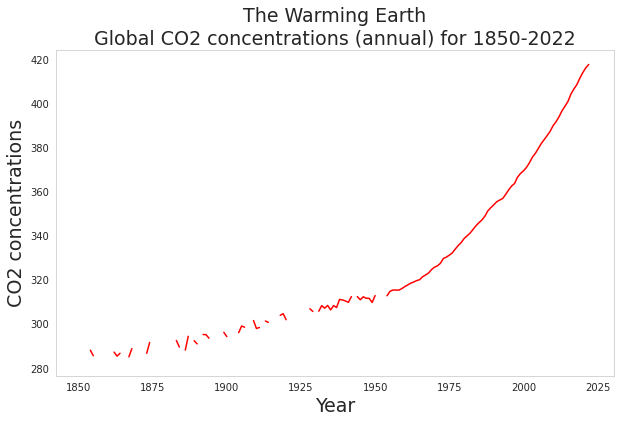

In [30]:
# Plot the CO2 concentrations
plt.figure(figsize = (10, 6))

plt.plot(climateChange['CO2 concentrations'], 'r')

plt.title('The Warming Earth\nGlobal CO2 concentrations (annual) for 1850-2022', fontsize = 19)
plt.xlabel('Year', fontsize = 19)
plt.ylabel('CO2 concentrations', fontsize = 19)

plt.show()

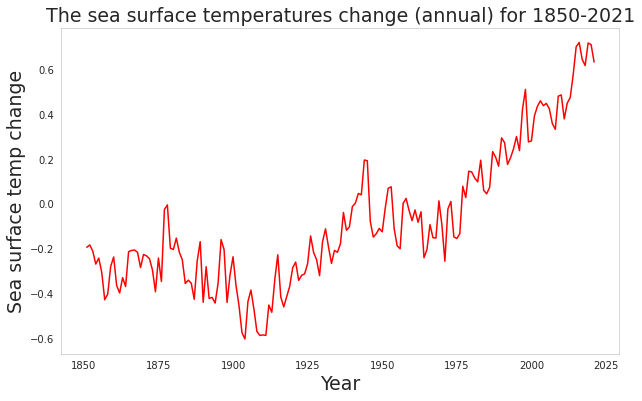

In [32]:
# Plot the CO2 concentrations
plt.figure(figsize = (10, 6))

plt.plot(climateChange['Sea surface temp'], 'r')

plt.title('The sea surface temperatures change (annual) for 1850-2021', fontsize = 19)
plt.xlabel('Year', fontsize = 19)
plt.ylabel('Sea surface temp change', fontsize = 19)

plt.show()

<Figure size 432x288 with 0 Axes>

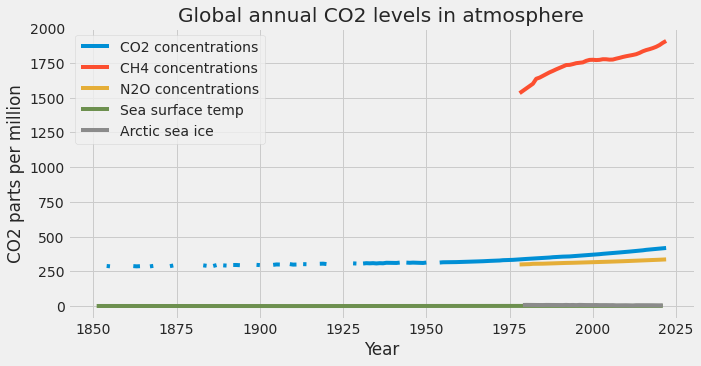

In [33]:
plt.figure()
plt.style.use("fivethirtyeight")

climateChange.plot(figsize = (10,5), grid=True, legend=True)
plt.title("Global annual CO2 levels in atmosphere")
plt.ylabel("CO2 parts per million")
plt.show()

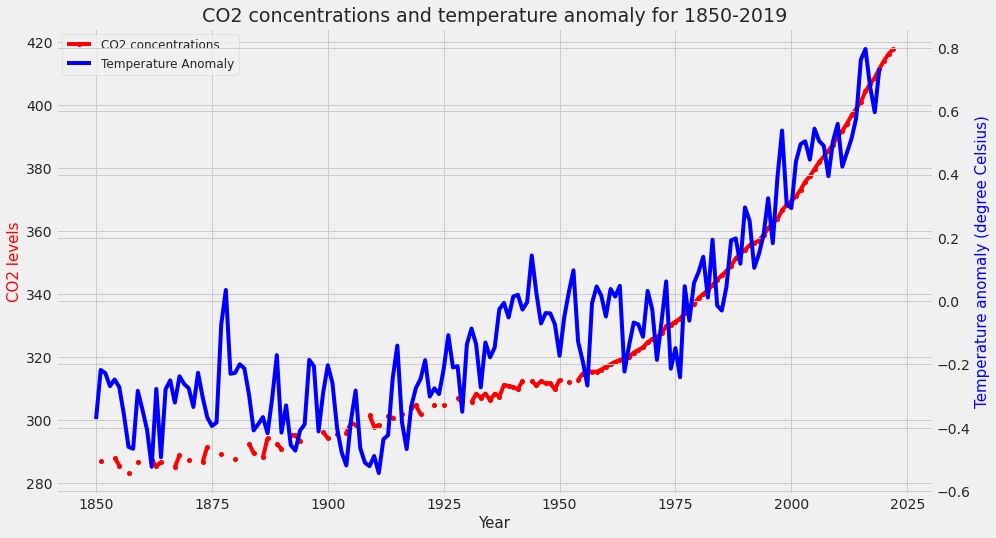

In [35]:
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(climateChange['CO2 concentrations'], '-ro', markersize = 4, label = 'CO2 concentrations')
line2 = ax2.plot(temperature['Temperature anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('CO2 concentrations and temperature anomaly for 1850-2019', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('CO2 levels', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

plt.show()

In [36]:
combined_df = climateChange.join(temperature)
combined_df.head()

CO2 concentrations  CH4 concentrations  N2O concentrations  \
Year                                                               
1851          287.128113                 NaN                 NaN   
1852                 NaN                 NaN                 NaN   
1853                 NaN                 NaN                 NaN   
1854          288.054437                 NaN                 NaN   
1855          285.565577               808.5               275.9   

      Sea surface temp  Arctic sea ice  Temperature anomaly  
Year                                                         
1851          -0.19337             NaN               -0.218  
1852          -0.18339             NaN               -0.228  
1853          -0.21098             NaN               -0.269  
1854          -0.26843             NaN               -0.248  
1855          -0.24173             NaN               -0.272

In [38]:
correlation_table = combined_df.corr()
correlation_table.head()

CO2 concentrations  CH4 concentrations  \
CO2 concentrations            1.000000            0.924919   
CH4 concentrations            0.924919            1.000000   
N2O concentrations            0.998324            0.952993   
Sea surface temp              0.925668            0.900457   
Arctic sea ice               -0.894851           -0.795910   

                    N2O concentrations  Sea surface temp  Arctic sea ice  \
CO2 concentrations            0.998324          0.925668       -0.894851   
CH4 concentrations            0.952993          0.900457       -0.795910   
N2O concentrations            1.000000          0.954998       -0.887295   
Sea surface temp              0.954998          1.000000       -0.795762   
Arctic sea ice               -0.887295         -0.795762        1.000000   

                    Temperature anomaly  
CO2 concentrations             0.929847  
CH4 concentrations             0.890843  
N2O concentrations             0.958231  
Sea surface temp               0.982252  
Arctic sea ice                -0.805876

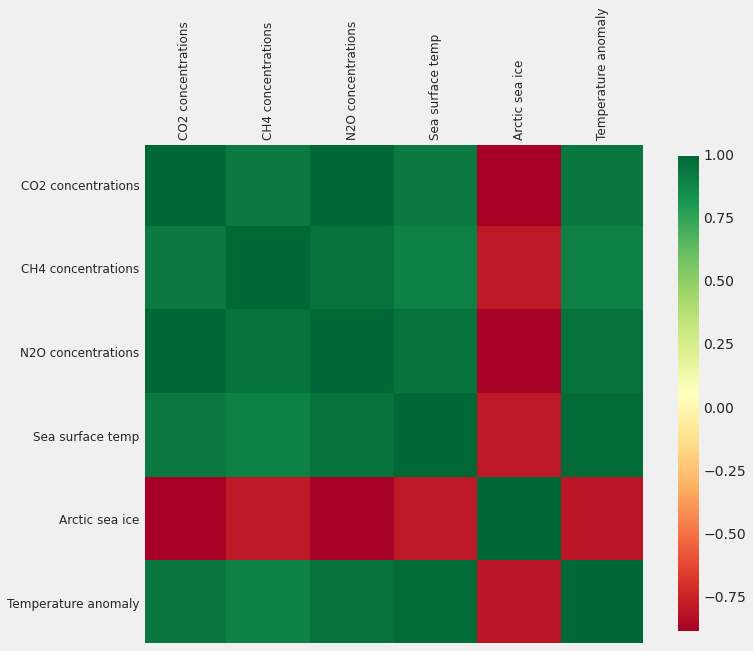

In [39]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]

cax = ax.matshow(correlation_table, cmap = 'RdYlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)

plt.show()



---


CO2 is produced by factories, cars and many factors.

Nowadays we talk more and more about the impact that has what we eat.

Let's see how much


---



**Greenhouse gas emissions dataset for food production**

In [ ]:
print(f"Shape of the dataframe: {df_emiss.shape[0]} rows and {df_emiss.shape[1]} columns.")
print("\nColumns in this dataframe:\n", df_emiss.columns)

df_emiss.head()

Shape of the dataframe: 43 rows and 23 columns.

Columns in this dataframe:
 Index(['Food product', 'Land use change', 'Animal Feed', 'Farm', 'Processing',
       'Transport', 'Packging', 'Retail', 'Total_emissions',
       'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)',
       'Eutrophying emissions per kilogram (gPO₄eq per kilogram)',
       'Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)',
       'Freshwater withdrawals per 1000kcal (liters per 1000kcal)',
       'Freshwater withdrawals per 100g protein (liters per 100g protein)',
       'Freshwater withdrawals per kilogram (liters per kilogram)',
       'Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)',
       'Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)',
       'Land use per 1000kcal (m² per 1000kcal)',
       'Land use per kilogram (m² per kilogram)',
       'Land use per 100g protein (m² per 100g protein)',
       'Scarcity-weighted water use per kilogram 

Food product  Land use change  Animal Feed  Farm  Processing  \
0  Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1         Maize (Meal)              0.3          0.0   0.5         0.1   
2        Barley (Beer)              0.0          0.0   0.2         0.1   
3              Oatmeal              0.0          0.0   1.4         0.0   
4                 Rice              0.0          0.0   3.6         0.1   

   Transport  Packging  Retail  Total_emissions  \
0        0.1       0.1     0.1              1.4   
1        0.1       0.1     0.0              1.1   
2        0.0       0.5     0.3              1.1   
3        0.1       0.1     0.0              1.6   
4        0.1       0.1     0.1              4.0   

   Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                           4.281357          
4                                           9.514379          

   Eutrophying emissions per kilogram (gPO₄eq per kilogram)  \
0                                                NaN          
1                                                NaN          
2                                                NaN          
3                                              11.23          
4                                              35.07          

   Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)  \
0                                                NaN                       
1                                                NaN                       
2                                                NaN                       
3                                           8.638462                       
4                                          49.394366                       

   Freshwater withdrawals per 1000kcal (liters per 1000kcal)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                         183.911552           
4                                         609.983722           

   Freshwater withdrawals per 100g protein (liters per 100g protein)  \
0                                                NaN                   
1                                                NaN                   
2                                                NaN                   
3                                         371.076923                   
4                                        3166.760563                   

   Freshwater withdrawals per kilogram (liters per kilogram)  \
0                                                NaN           
1                                                NaN           
2                                                NaN           
3                                              482.4           
4                                             2248.4           

   Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                           0.945482              
4                                           1.207271              

   Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)  \
0                                                NaN                      
1                                                NaN                      
2                                                NaN                      
3                                           1.907692                      
4                                           6.267606          

 **Missing values**
 
I’m going to detect the presence of NaN values in the dataframe.

In [ ]:
print("Dtype, Unique values and Missing values(%) of each column:")

emission_df_info= pd.DataFrame({"Dtype": df_emiss.dtypes, 
                            "Unique values": df_emiss.nunique(),
                            "Missing values(%)": round(df_emiss.isnull().sum()/df_emiss.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

emission_df_info.sort_values(by='Missing values(%)')

Dtype, Unique values and Missing values(%) of each column:


Dtype  Unique values  \
Columns                                                                      
Food product                                         object             43   
Land use change                                     float64             21   
Animal Feed                                         float64             10   
Farm                                                float64             24   
Processing                                          float64             10   
Transport                                           float64              8   
Packging                                            float64             10   
Retail                                              float64              4   
Total_emissions                                     float64             33   
Eutrophying emissions per kilogram (gPO₄eq per ...  float64             38   
Scarcity-weighted water use per kilogram (liter...  float64             38   
Land use per kilogram (m² per kilogram)             float64             38   
Freshwater withdrawals per kilogram (liters per...  float64             38   
Eutrophying emissions per 1000kcal (gPO₄eq per ...  float64             33   
Land use per 1000kcal (m² per 1000kcal)             float64             33   
Greenhouse gas emissions per 1000kcal (kgCO₂eq ...  float64             33   
Scarcity-weighted water use per 1000kcal (liter...  float64             30   
Freshwater withdrawals per 1000kcal (liters per...  float64             30   
Land use per 100g protein (m² per 100g protein)     float64             27   
Greenhouse gas emissions per 100g protein (kgCO...  float64             27   
Eutrophying emissions per 100g protein (gPO₄eq ...  float64             27   
Freshwater withdrawals per 100g protein (liters...  float64             26   
Scarcity-weighted water use per 100g protein (l...  float64             26   

                                                    Missing values(%)  
Columns                                                                
Food product                                                     0.00  
Land use change                                                  0.00  
Animal Feed                                                      0.00  
Farm                                                             0.00  
Processing                                                       0.00  
Transport                                                        0.00  
Packging                                                         0.00  
Retail                                                           0.00  
Total_emissions                                                  0.00  
Eutrophying emissions per kilogram (gPO₄eq per ...              11.63  
Scarcity-weighted water use per kilogram (liter...              11.63  
Land use per kilogram (m² per kilogram)                         11.63  
Freshwater withdrawals per kilogram (liters per...              11.63  
Eutrophying emissions per 1000kcal (gPO₄eq per ...              23.26  
Land use per 1000kcal (m² per 1000kcal)                         23.26  
Greenhouse gas emissions per 1000kcal (kgCO₂eq ...              23.26  
Scarcity-weighted water use per 1000kcal (liter...              30.23  
Freshwater withdrawals per 1000kcal (liters per...              30.23  
Land use per 100g protein (m² per 100g protein)                 37.21  
Greenhouse gas emissions per 100g protein (kgCO...              37.21  
Eutrophying emissions per 100g protein (gPO₄eq ...              37.21  
Freshwater withdrawals per 100g protein (liters...              39.53  
Scarcity-weighted water use per 100g protein (l...              39.53

The missing values are concentrated exclusively in the columns that evaluate pollutant emissions and water consumption in relation to 1 kilogram, 100 grams of protein, or 1000 kcal of food produced. In this case, I didn't perform an imputation on the presence of these missing values, not being interested in the data contained in these columns. Then, I proceed to delete them directly.

In [ ]:
# List of columns to delete
columns_to_delete = [n for n in df_emiss.columns if '(' in n]

df_emiss.drop(columns=(columns_to_delete), inplace=True)

# Delete spaces in labels and change them in lower case
df_emiss.rename(columns={x:x.replace(' ', '_').lower() for x in df_emiss.columns}, inplace=True)

df_emiss.rename(columns={'land_use_change':'land_use'}, inplace=True)

**Qualitative and quantitative variables**

There is only one column containing qualitative variables, 'food_product', which has no inconsistencies or repeated entries.

As for the quantitative variables, there is an error to be fixed. In the site from where the data are derived it is specified that the values in the column 'land_use' are expressed as square meters used to produce 1 kg of food, whereas in all other columns they refer to 1 kg of CO₂ emitted to produce 1 kg of food. When the total emissions value (column 'total_emissions') is calculated, the value of 'land_use' is also added to that of the other columns, but this refers to another unit of measurement which has nothing to do with CO₂ emissions.

Therefore, to fix this inconsistency I have to subtract from the total emissions of each food the respective value of 'land_use'.

In [ ]:
# Create an array consisting of the difference between total_emission and land_use values
difference = df_emiss.total_emissions.values - df_emiss.land_use.values

# Replace the correct values in the 'total_emissions' column
df_emiss.total_emissions = difference

df_emiss.head()

food_product  land_use  animal_feed  farm  processing  transport  \
0  Wheat & Rye (Bread)       0.1          0.0   0.8         0.2        0.1   
1         Maize (Meal)       0.3          0.0   0.5         0.1        0.1   
2        Barley (Beer)       0.0          0.0   0.2         0.1        0.0   
3              Oatmeal       0.0          0.0   1.4         0.0        0.1   
4                 Rice       0.0          0.0   3.6         0.1        0.1   

   packging  retail  total_emissions  
0       0.1     0.1              1.3  
1       0.1     0.0              0.8  
2       0.5     0.3              1.1  
3       0.1     0.0              1.6  
4       0.1     0.1              4.0

In [ ]:
# Create a dataframe subset using only top 8 elements with highest total emissions values
top_8_emiss = df_emiss.sort_values(by='total_emissions', ascending=False).head(8)

fig = px.bar(
    top_8_emiss,
    x='food_product',
    y='total_emissions',

    color='total_emissions',
    color_continuous_scale='Burgyl',
    
    hover_name='total_emissions',
    hover_data=dict(
        total_emissions=None,
        food_product=None))


fig.update_layout(
    coloraxis_showscale=False,

    title = 'Top 8 food items for Total Emissions of CO₂',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    yaxis = dict(title='Emissions (kgCO₂ per kg of product)'),
    xaxis = dict(
        title=None, 
        tickangle=45))    

fig.show()


In [ ]:

# Columns to be compared
features=['animal_feed', 'farm', 'processing', 'transport', 'packging', 'retail']
colors = ['#412722', '#eec666', '#a51c28', '#6b0f1a', '#1b512d', '#0c7c59']

# Create a dictionary to assign a color to each feature
color_map = {features[n]:colors[n] for n in range(len(colors))}

fig = px.bar(    
    top_8_emiss.sort_values(by=['farm']), 
    y="food_product", 
    x=features,    

    color_discrete_map=color_map,

    hover_name='food_product',
    hover_data=dict(food_product=None))
    

fig.update_layout(    
    barmode='group',

    title = 'Top 8 food items for Total Emissions of CO₂ - Production Steps',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    legend_title_text='Steps of production chain',

    xaxis = dict(title='Emissions (kgCO₂ per kg of product)'), 
    yaxis = dict(title=None))

fig.show()

## One of the effects of the global warming are the natural disaster for me, **is it true?** 

Natural disaster dataset

In [40]:
nat_disaster_df.head()

Entity  Code  Year  \
0  All natural disasters   NaN  1900   
1  All natural disasters   NaN  1901   
2  All natural disasters   NaN  1902   
3  All natural disasters   NaN  1903   
4  All natural disasters   NaN  1904   

   Number of reported natural disasters (reported disasters)  
0                                                  5          
1                                                  2          
2                                                  9          
3                                                  8          
4                                                  2

In [41]:
# Remove the 'Code' column
nat_disaster_df.drop(['Code'], axis = 1, inplace = True)

# Check the different types of 'Entity' values
nat_disaster_df['Entity'].unique()

array(['All natural disasters', 'Drought', 'Earthquake',
       'Extreme temperature', 'Extreme weather', 'Flood', 'Impact',
       'Landslide', 'Mass movement (dry)', 'Volcanic activity',
       'Wildfire'], dtype=object)

The 'Entity' column contains 10 types of natural disaster entries and their summation, 'All natural disasters'. For further analysis it is suitable to rearrange the data according to the disaster categories.

In [42]:
# Pivot the dataframe
nat_disaster_df = nat_disaster_df.pivot(index = 'Year', columns = 'Entity', values = 'Number of reported natural disasters (reported disasters)')
nat_disaster_df.head()

Entity  All natural disasters  Drought  Earthquake  Extreme temperature  \
Year                                                                      
1900                      5.0      2.0         NaN                  NaN   
1901                      2.0      NaN         2.0                  NaN   
1902                      9.0      NaN         3.0                  NaN   
1903                      8.0      1.0         1.0                  NaN   
1904                      2.0      NaN         1.0                  NaN   

Entity  Extreme weather  Flood  Impact  Landslide  Mass movement (dry)  \
Year                                                                     
1900                1.0    1.0     NaN        NaN                  NaN   
1901                NaN    NaN     NaN        NaN                  NaN   
1902                1.0    NaN     NaN        NaN                  NaN   
1903                2.0    2.0     NaN        NaN                  1.0   
1904                1.0    NaN     NaN        NaN                  NaN   

Entity  Volcanic activity  Wildfire  
Year                                 
1900                  1.0       NaN  
1901                  NaN       NaN  
1902                  5.0       NaN  
1903                  1.0       NaN  
1904                  NaN       NaN

Global warming doesn't affect the probability of impact by asteroids, meteroites, etc. on Earth. So, the 'Impact' entity can be removed from the dataframe.

There are several 'NaN' values which could mean missing values or unreported disaster occurrences. For our analysis, we'll replace them with 0, which means no disaster occurrence and it would also benefit plotting the data.

In [43]:
# Remove the 'Impact' column
nat_disaster_df.drop(['Impact'], axis = 1, inplace = True)

# Handle missing values and rename columns
nat_disaster_df.fillna(value = 0, inplace = True)
nat_disaster_df = nat_disaster_df.add_suffix(' (Occurrence)')

nat_disaster_df.head()

Entity  All natural disasters (Occurrence)  Drought (Occurrence)  \
Year                                                               
1900                                   5.0                   2.0   
1901                                   2.0                   0.0   
1902                                   9.0                   0.0   
1903                                   8.0                   1.0   
1904                                   2.0                   0.0   

Entity  Earthquake (Occurrence)  Extreme temperature (Occurrence)  \
Year                                                                
1900                        0.0                               0.0   
1901                        2.0                               0.0   
1902                        3.0                               0.0   
1903                        1.0                               0.0   
1904                        1.0                               0.0   

Entity  Extreme weather (Occurrence)  Flood (Occurrence)  \
Year                                                       
1900                             1.0                 1.0   
1901                             0.0                 0.0   
1902                             1.0                 0.0   
1903                             2.0                 2.0   
1904                             1.0                 0.0   

Entity  Landslide (Occurrence)  Mass movement (dry) (Occurrence)  \
Year                                                               
1900                       0.0                               0.0   
1901                       0.0                               0.0   
1902                       0.0                               0.0   
1903                       0.0                               1.0   
1904                       0.0                               0.0   

Entity  Volcanic activity (Occurrence)  Wildfire (Occurrence)  
Year                                                           
1900                               1.0                    0.0  
1901                               0.0                    0.0  
1902                               5.0                    0.0  
1903                               1.0                    0.0  
1904                               0.0                    0.0

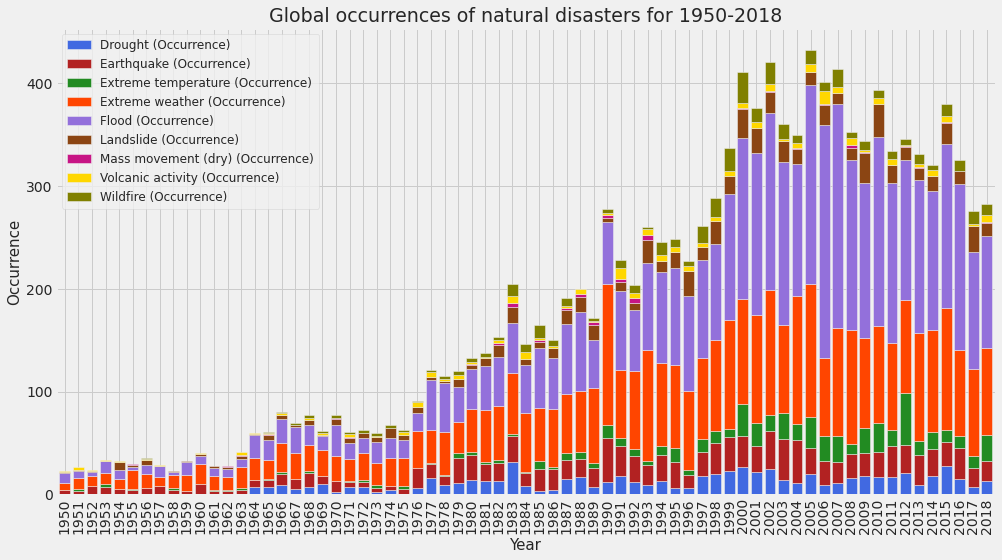

In [44]:
# Plot the types of natural disasters occurrences for 1950-2018
colors = ['#4169e1', '#b22222', '#228b22', '#ff4500', '#9370db', '#8b4513', '#c71585', '#ffd700', 'olive']

nat_disaster_df.drop(['All natural disasters (Occurrence)'], axis = 1).loc[1950:].plot.bar(width = 0.8, stacked = True, color = colors, figsize = (15, 8))

plt.title('Global occurrences of natural disasters for 1950-2018', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Occurrence', fontsize = 15)
plt.legend(loc = 2, prop = {'size': 12})

plt.show()

The bar plot above with individual stacks for each disaster category shows that the occurrence of floods has significantly increased over the years relative to other disasters. The next highest increase in occurrence is that of extreme weather followed by earthquakes. The plot also shows that there has been a steady increase in the number of total natural disasters globally. This is more evident from the plot below.

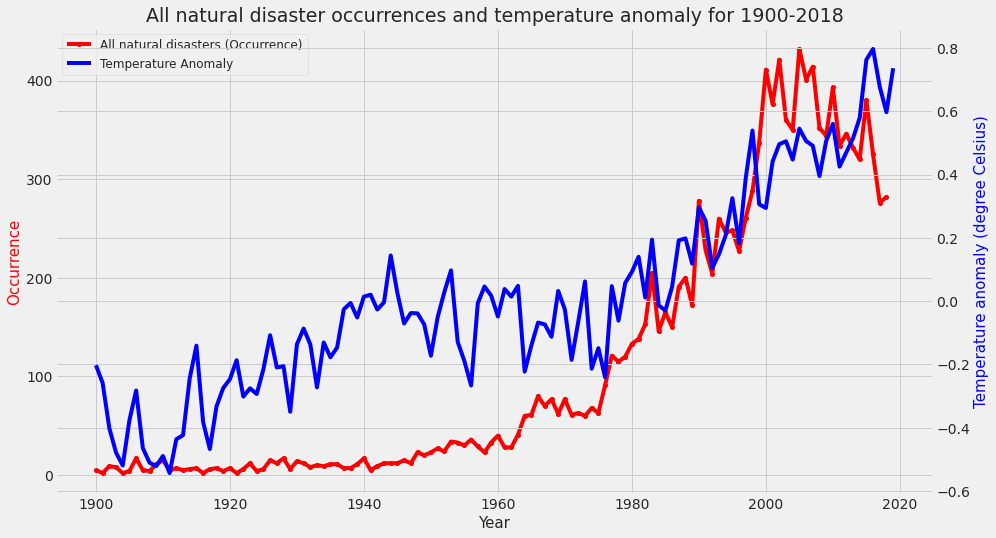

In [45]:
# Plot all natural disasters occurrences and temperature anomaly for comparison
fig, ax = plt.subplots(figsize = (14, 8))
ax2 = ax.twinx()

line1 = ax.plot(nat_disaster_df.loc[:2018, 'All natural disasters (Occurrence)'], '-ro', markersize = 4, label = 'All natural disasters (Occurrence)')
line2 = ax2.plot(temperature.loc[1900:, 'Temperature anomaly'], 'b-', label = 'Temperature Anomaly')

lines = line1 + line2
labels = [l.get_label() for l in lines]

plt.title('All natural disaster occurrences and temperature anomaly for 1900-2018', fontsize = 19)
ax.set_xlabel('Year', fontsize = 15)
ax.set_ylabel('Occurrence', fontsize = 15, color = 'r')
ax2.set_ylabel('Temperature anomaly (degree Celsius)', fontsize = 15, color = 'b')
ax.legend(lines, labels, loc = 0, prop = {'size': 12})

plt.show()

In [ ]:
combined_df = global_temp_df.join(nat_disaster_df)
combined_df.head()

Temperature Anomaly  All natural disasters (Occurrence)  \
Year                                                            
1850            -0.432381                                 NaN   
1851            -0.307714                                 NaN   
1852            -0.293047                                 NaN   
1853            -0.344381                                 NaN   
1854            -0.308547                                 NaN   

      Drought (Occurrence)  Earthquake (Occurrence)  \
Year                                                  
1850                   NaN                      NaN   
1851                   NaN                      NaN   
1852                   NaN                      NaN   
1853                   NaN                      NaN   
1854                   NaN                      NaN   

      Extreme temperature (Occurrence)  Extreme weather (Occurrence)  \
Year                                                                   
1850                               NaN                           NaN   
1851                               NaN                           NaN   
1852                               NaN                           NaN   
1853                               NaN                           NaN   
1854                               NaN                           NaN   

      Flood (Occurrence)  Landslide (Occurrence)  \
Year                                               
1850                 NaN                     NaN   
1851                 NaN                     NaN   
1852                 NaN                     NaN   
1853                 NaN                     NaN   
1854                 NaN                     NaN   

      Mass movement (dry) (Occurrence)  Volcanic activity (Occurrence)  \
Year                                                                     
1850                               NaN                             NaN   
1851                               NaN                             NaN   
1852                               NaN                             NaN   
1853                               NaN                             NaN   
1854                               NaN                             NaN   

      Wildfire (Occurrence)  
Year                         
1850                    NaN  
1851                    NaN  
1852                    NaN  
1853                    NaN  
1854                    NaN

In [ ]:
correlation_table = combined_df.corr()
correlation_table.head()

Temperature Anomaly  \
Temperature Anomaly                            1.000000   
All natural disasters (Occurrence)             0.865128   
Drought (Occurrence)                           0.750086   
Earthquake (Occurrence)                        0.796451   
Extreme temperature (Occurrence)               0.738191   

                                    All natural disasters (Occurrence)  \
Temperature Anomaly                                           0.865128   
All natural disasters (Occurrence)                            1.000000   
Drought (Occurrence)                                          0.854789   
Earthquake (Occurrence)                                       0.903392   
Extreme temperature (Occurrence)                              0.859863   

                                    Drought (Occurrence)  \
Temperature Anomaly                             0.750086   
All natural disasters (Occurrence)              0.854789   
Drought (Occurrence)                            1.000000   
Earthquake (Occurrence)                         0.815286   
Extreme temperature (Occurrence)                0.684009   

                                    Earthquake (Occurrence)  \
Temperature Anomaly                                0.796451   
All natural disasters (Occurrence)                 0.903392   
Drought (Occurrence)                               0.815286   
Earthquake (Occurrence)                            1.000000   
Extreme temperature (Occurrence)                   0.721105   

                                    Extreme temperature (Occurrence)  \
Temperature Anomaly                                         0.738191   
All natural disasters (Occurrence)                          0.859863   
Drought (Occurrence)                                        0.684009   
Earthquake (Occurrence)                                     0.721105   
Extreme temperature (Occurrence)                            1.000000   

                                    Extreme weather (Occurrence)  \
Temperature Anomaly                                     0.848536   
All natural disasters (Occurrence)                      0.969517   
Drought (Occurrence)                                    0.829133   
Earthquake (Occurrence)                                 0.917687   
Extreme temperature (Occurrence)                        0.776985   

                                    Flood (Occurrence)  \
Temperature Anomaly                           0.841740   
All natural disasters (Occurrence)            0.978128   
Drought (Occurrence)                          0.785536   
Earthquake (Occurrence)                       0.824128   
Extreme temperature (Occurrence)              0.870008   

                                    Landslide (Occurrence)  \
Temperature Anomaly                               0.772180   
All natural disasters (Occurrence)                0.894296   
Drought (Occurrence)                              0.790511   
Earthquake (Occurrence)                           0.778272   
Extreme temperature (Occurrence)                  0.751340   

                                    Mass movement (dry) (Occurrence)  \
Temperature Anomaly                                         0.257074   
All natural disasters (Occurrence)                          0.349152   
Drought (Occurrence)                                        0.398695   
Earthquake (Occurrence)                                     0.408753   
Extreme temperature (Occurrence)                            0.165342   

                                    Volcanic activity (Occurrence)  \
Temperature Anomaly                                       0.669120   
All natural disasters (Occurrence)                        0.788590   
Drought (Occurrence)                                      0.710884   
Earthquake (Occurrence)                                   0.708440   
Extreme temperature (Occurrence)                          0.556775   

                                    Wildfire (Occurrence)  
Temperature Anomal

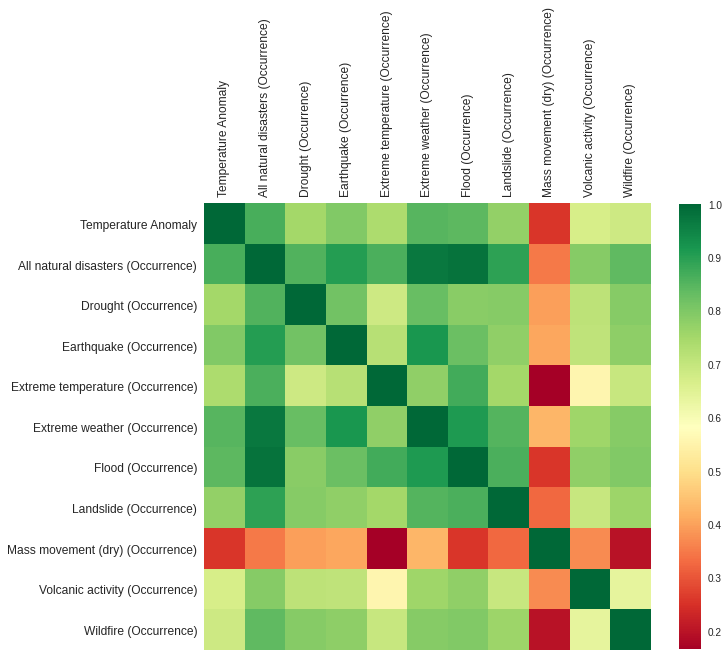

In [ ]:
# Plot correlation heatmap
fig, ax = plt.subplots(figsize = (10, 10))

labels = [name for name in correlation_table.columns]

cax = ax.matshow(correlation_table, cmap = 'RdYlGn')

cbar = fig.colorbar(cax, shrink = 0.82)

ax.set_xticks(np.arange(len(labels)))
ax.set_yticks(np.arange(len(labels)))

ax.set_xticklabels(labels, fontsize = 12, rotation = 'vertical')
ax.set_yticklabels(labels, fontsize = 12)

ax.grid(False)

plt.show()

##Now, to answer at the second question, I noticed that in many charts that I plotted seem that around the 1975 there was a 'speed up' in temperature changes, I want to deepen

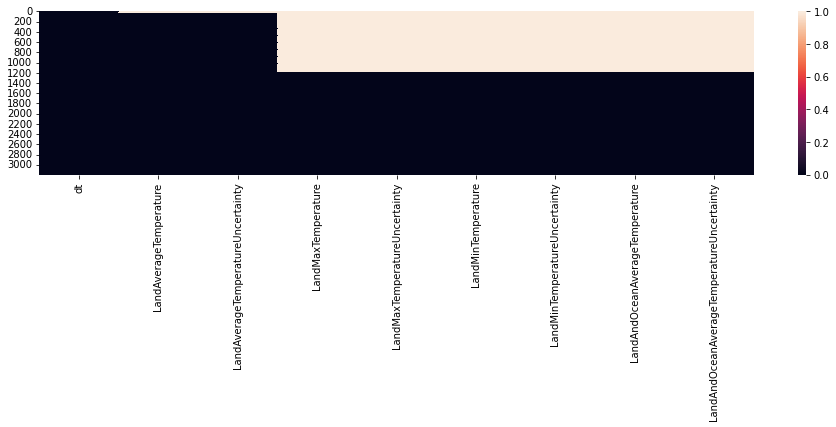

In [ ]:
# Read the data
data = pd.read_csv("/content/sample_data/GlobalTemperatures.csv")
data.head(2)

# Make a copy of the data for future graphs
copy = data.copy()

# Missing values
data.isna().sum() # there are 1200 missing values for Max, Min and Land&Ocean Average Temp
plt.figure(figsize = (16, 3))
sns.heatmap(data.isna())

In [ ]:
# Missing data with listwise deletion
# Because data is missing in chucks and we are dealing with time series data, we will delete all rows that have at least 
# one missing value.

data.dropna(axis = 0, inplace = True)


# Dealing with the DATE
data['Date'] = pd.to_datetime(data.dt) # converted all dates to the same format

data2 = data.copy() # create a new dataset
data2.drop(columns = ['dt'], axis = 1, inplace = True) # drop the dt column

# Creating new features
data2['day'] = data2['Date'].dt.day
data2['week'] = data2['Date'].dt.week
data2['month'] = data2['Date'].dt.month
data2['year'] = data2['Date'].dt.year

# Week data is not evenly distributed
data2['week'].value_counts() # very uneven information on weeks

# For future analysis, we will work only on yearly data, as average (because there are dates missing and data is not consistent)
earth_data = data2.groupby(by = 'year')[['LandAverageTemperature', 'LandAverageTemperatureUncertainty',
       'LandMaxTemperature', 'LandMaxTemperatureUncertainty',
       'LandMinTemperature', 'LandMinTemperatureUncertainty',
       'LandAndOceanAverageTemperature',
       'LandAndOceanAverageTemperatureUncertainty']].mean().reset_index()

earth_data['turnpoint'] = np.where(earth_data['year'] <= 1975, 'before', 'after') # creating a new columns
earth_data.head(2)

<ipython-input-16-be56781b797c>:16: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.



year  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1850                7.900667                           0.876417   
1  1851                8.178583                           0.881917   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0           13.476667                       2.394833            1.964333   
1           13.081000                       2.397250            2.203917   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                       1.571167                       14.867167   
1                       1.632417                       14.991833   

   LandAndOceanAverageTemperatureUncertainty turnpoint  
0                                   0.308167    before  
1                                   0.312083    before

In [ ]:
# Simple Summary Statistics
earth_data[['LandAverageTemperature', 'LandMaxTemperature', 
       'LandMinTemperature', 'LandAndOceanAverageTemperature']].describe()

LandAverageTemperature  LandMaxTemperature  LandMinTemperature  \
count              166.000000          166.000000          166.000000   
mean                 8.571583           14.350601            2.743595   
std                  0.473687            0.447741            0.614124   
min                  7.558583           13.081000            1.525083   
25%                  8.195708           14.055917            2.262562   
50%                  8.540750           14.307708            2.734917   
75%                  8.791250           14.539167            3.126833   
max                  9.831000           15.572667            4.148833   

       LandAndOceanAverageTemperature  
count                      166.000000  
mean                        15.212566  
std                          0.298629  
min                         14.740083  
25%                         14.991208  
50%                         15.144208  
75%                         15.379104  
max                         16.058583

In [ ]:
# Creating the dataset - using copy
copy['Date'] = pd.to_datetime(copy.dt)
copy['year'] = copy['Date'].dt.year
land_avg = copy.groupby('year')['LandAverageTemperature', 'LandAverageTemperatureUncertainty'].mean().reset_index()

# Creating the graph
fig = go.Figure()
fig.update_layout(title="Land Average Temperature: 1750-2010", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'))

fig.add_trace(go.Scatter(x = land_avg['year'], y = land_avg['LandAverageTemperatureUncertainty'], mode = 'lines',
                        name = 'Land Avg Temp Error', marker_color = 'rgb(107,142,35)'))


<ipython-input-18-0025043f7bbd>:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [ ]:
# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="When Global Warming Started?",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

# Figure data
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAverageTemperature'], mode = 'lines',
                        name = 'Land Avg Temp', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[7.5, 10], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMinTemperature'], mode = 'lines',
                        name = 'Land Min Temp', marker_color='rgb(210,105,30)'), row = 1, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[1.5, 4.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 1, col = 2)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandMaxTemperature'], mode = 'lines',
                        name = 'Land Max Temp', marker_color='rgb(135,206,235)'), row = 2, col = 1)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[13, 15.5], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 1)
#=============================================================================
fig.add_trace(go.Scatter(x = earth_data['year'], y = earth_data['LandAndOceanAverageTemperature'], mode = 'lines',
                        name = 'Land&Ocean Avg Temp', marker_color='rgb(107,142,35)'), row = 2, col = 2)
fig.add_trace(go.Scatter( x=[1975, 1975], y=[14.5, 16], mode="lines",line=go.scatter.Line(color="gray"), showlegend=False),
             row = 2, col = 2)

I feel like 1975 was a **"no turning back"** point, so I chose this moment to compare temperatures before and after.



*   Land Average Temperature - an increase from 8.74 degrees to 9.83; 1.09 grades increase

*  Land Minimum Temperatures - an increase from 3.12 degrees to 4.14; 1.02 grades increase
*   Land Maximum Temperature - an increase from 14.38 degrees to 15.57; 1.17 grades increase


*   Land and Ocean Average Temperature - an increase from 15.24 degrees to 16.06; 0.82 grades increase





In [ ]:
# Change in average temperature before/after 1975

# Figure layout
fig = make_subplots(rows=2, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Average Temperatures before and after 1975",font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                 template = "ggplot2", title_font_size = 20, hovermode= 'closest')

# Figure data
fig.add_trace(go.Box(x = earth_data['LandAverageTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(128, 0, 0)', boxmean = True, name = 'Land Avg Temp'),
             row = 1, col = 1)
fig.add_trace(go.Box(x = earth_data['LandMinTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(210,105,30)', boxmean = True, name = 'Land Min Temp'),
             row = 1, col = 2)
fig.add_trace(go.Box(x = earth_data['LandMaxTemperature'], y = earth_data['turnpoint'],boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(135,206,235)', boxmean = True, name = 'Land Max Temp'),
             row = 2, col = 1)
fig.add_trace(go.Box(x = earth_data['LandAndOceanAverageTemperature'], y = earth_data['turnpoint'], boxpoints = 'all',jitter = 0.3, 
                     pointpos = -1.6, marker_color = 'rgb(107,142,35)', boxmean = True, name = 'Land&Ocean Avg Temp'),
             row = 2, col = 2)


fig.update_traces(orientation='h')



In [ ]:
# Read the file (countries + cities)
countries = pd.read_csv("/content/sample_data/GlobalLandTemperaturesByCity.csv")

# Because the file is very big and there are many dates missing (like the last file), we will group by year
# create column year
countries['Date'] = pd.to_datetime(countries['dt'])
countries['year'] = countries['Date'].dt.year

# Group by year
by_year = countries.groupby(by = ['year', 'City', 'Country', 'Latitude', 'Longitude']).mean().reset_index()

# Append the continent & iso codes
continent_map = pd.read_csv("/content/sample_data/continents2.csv")
continent_map['Country'] = continent_map['name']
continent_map = continent_map[['Country', 'region', 'alpha-2', 'alpha-3']]

# Add information
data = pd.merge(left = by_year, right = continent_map, on = 'Country', how = 'left')

# Filter starting 1825 - because some countries weren't monitored before this year on some periods, 
# the mean overall could be quite misleading (example: Americas have an increase from 1821 to 1825 of 5 points in temperature,
# but this happens only because in 1824 data for South America started to be collected)
data = data[data['year'] >= 1825]

# Datasets:

region = data.dropna(axis = 0).groupby(by = ['region', 'year']).mean().reset_index()
countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year']).mean().reset_index()
cities = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'City', 'year', 'Latitude', 'Longitude']).mean().reset_index()

In [ ]:
# Figure layout
fig = make_subplots(rows=1, cols=2, insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.3}])
fig.update_layout(title="Continents increase in Average Temperature", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=12,color="#7f7f7f"),
                  template = "ggplot2", hovermode= 'closest')
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

#============================= Scatter =============================
fig.add_trace(go.Scatter(x = region[region['region'] == 'Europe']['year'], y = region[region['region'] == 'Europe']['AverageTemperature'], mode = 'lines',
                        name = 'Europe', marker_color='rgb(128, 0, 0)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Americas']['year'], y = region[region['region'] == 'Americas']['AverageTemperature'], mode = 'lines',
                        name = 'Americas', marker_color='rgb(210,105,30)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Asia']['year'], y = region[region['region'] == 'Asia']['AverageTemperature'], mode = 'lines',
                        name = 'Asia', marker_color='rgb(135,206,235)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Africa']['year'], y = region[region['region'] == 'Africa']['AverageTemperature'], mode = 'lines',
                        name = 'Africa', marker_color='rgb(107,142,35)'), row = 1, col = 1)
fig.add_trace(go.Scatter(x = region[region['region'] == 'Oceania']['year'], y = region[region['region'] == 'Oceania']['AverageTemperature'], mode = 'lines',
                        name = 'Oceania', marker_color='rgb(70,130,180)'), row = 1, col = 1)

#============================= Bar =============================
y1 = np.round(region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 1)
y2 = np.round(region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 1)

fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].mean().tolist(), 
                     name = 'Mean Temp', marker_color = 'rgb(188,143,143)', text = y1, textposition = 'auto'),
              row = 1, col = 2)
fig.add_trace(go.Bar(x = region['region'].unique(), y = region.groupby(by = 'region')['AverageTemperature'].max().tolist(), 
                     name = 'Max Temp', marker_color = 'rgb(222,184,135)', text = y2, textposition = 'auto'),
              row = 1, col = 2)

In [ ]:
# Data
mean = countries.groupby(['Country', 'region'])['AverageTemperature'].mean().reset_index()
maximum = countries.groupby(['Country', 'region'])['AverageTemperature'].max().reset_index()

difference = pd.merge(left = mean, right = maximum, on = ['Country', 'region'])
difference['diff'] = difference['AverageTemperature_y'] - difference['AverageTemperature_x']

# Graph
fig = go.Figure()
fig.update_layout(title="Difference in Temperature (Countries)", title_font_size = 20,
                  font=dict( family="Courier New, monospace", size=13,color="#7f7f7f"),
                  template = "ggplot2", autosize = False, height = 3500, width = 750)
fig.update_xaxes(showline=True, linewidth=1, linecolor='gray')
fig.update_yaxes(showline=True, linewidth=1, linecolor='gray')

sort_diff = difference[['Country', 'region', 'diff']].sort_values(by = 'diff', ascending = True)
fig.add_trace(go.Bar(x = sort_diff['diff'], y = sort_diff['Country'], orientation = 'h',
                    marker=dict(color='rgb(222,184,135)', line=dict( color='rgb(188,143,143)', width=0.6))))
fig.show()

Now, this is interesting:

Brazil, Argentina and Peru - BIG deforestation issues (their wildfires have
increased big time and the agriculture is the main factor)

Kazakhstan - place for testing biological and nuclear weapons by the soviets. Also, here are located the most polluting industries. Most of their water is infected by industrial and agricultural runoff and it is in some places radioactivity. (http://factsanddetails.com/central-asia/Kazakhstan/sub8_4f/entry-4681.html)

Turkmenistan - Desertification and drying of the Aral Sea, due to HEAVY agricultural practices. (https://en.wikipedia.org/wiki/Environmental_issues_in_Turkmenistan)

Nepal - Air Pollution. 1 in 10 Nepalese suffer from chronic lung problem, and the life expectancy of a new born is shorter by 2 years due solely to problems air quality related. (https://www.nepalitimes.com/here-now/air-pollution-is-more-dangerous-than-smoking/)

In [ ]:
# Data - we need iso alpha-3 codes
map_countries = data.dropna(axis = 0).groupby(by = ['region', 'Country', 'year','alpha-3']).mean().reset_index()

# Min temperature is -5.453083, and because the size in a map cannot be negative, we will add 6 to all temperatures
# to "standardize the data"
map_countries['AverageTemperature'] = map_countries['AverageTemperature'] + 6

fig = px.scatter_geo(map_countries, locations='alpha-3', color='region',
                     color_discrete_sequence = ('rgb(128,0,0)','rgb(210,105,30)','rgb(135,206,235)','rgb(107,142,35)'),
                     hover_name="Country", size="AverageTemperature", size_max=15, opacity = 0.8,
                     animation_frame="year",
                     projection="natural earth", title='Interactive Globe Map - Temperature increase')
fig.show()

In [121]:
import plotly.io as pio
pio.renderers.default = 'colab'



---



# **Temperatures forecasting**


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.dates as mdates

import warnings
warnings.filterwarnings('ignore')

In [22]:
# Temperatures change dataset

data = pd.read_csv('/content/sample_data/FAOSTAT_data_1-10-2022.csv')
data.head()

Domain Code              Domain  Area Code (FAO)         Area  Element Code  \
0          ET  Temperature change                2  Afghanistan          7271   
1          ET  Temperature change                2  Afghanistan          7271   
2          ET  Temperature change                2  Afghanistan          7271   
3          ET  Temperature change                2  Afghanistan          7271   
4          ET  Temperature change                2  Afghanistan          7271   

              Element  Months Code   Months  Year Code  Year Unit  Value Flag  \
0  Temperature change         7001  January       1961  1961   ?C  0.746   Fc   
1  Temperature change         7001  January       1962  1962   ?C  0.009   Fc   
2  Temperature change         7001  January       1963  1963   ?C  2.695   Fc   
3  Temperature change         7001  January       1964  1964   ?C -5.277   Fc   
4  Temperature change         7001  January       1965  1965   ?C  1.827   Fc   

  Flag Description  
0  Calculated data  
1  Calculated data  
2  Calculated data  
3  Calculated data  
4  Calculated data

In [23]:
#renaming the columns to lower case 
data = data.rename(columns=lambda s: s.replace(' ','_').lower())

In [24]:
# a statistical summury of the dataset 
data.describe(include='all')

domain_code              domain  area_code_(fao)         area  \
count       229925              229925    229925.000000       229925   
unique           1                   1              NaN          247   
top             ET  Temperature change              NaN  Afghanistan   
freq        229925              229925              NaN         1020   
mean           NaN                 NaN       130.647689          NaN   
std            NaN                 NaN        76.809008          NaN   
min            NaN                 NaN         1.000000          NaN   
25%            NaN                 NaN        64.000000          NaN   
50%            NaN                 NaN       131.000000          NaN   
75%            NaN                 NaN       194.000000          NaN   
max            NaN                 NaN       351.000000          NaN   

        element_code             element    months_code   months  \
count       229925.0              229925  229925.000000   229925   
unique           NaN                   1            NaN       17   
top              NaN  Temperature change            NaN  January   
freq             NaN              229925            NaN    13525   
mean          7271.0                 NaN    7009.882353      NaN   
std              0.0                 NaN       6.037955      NaN   
min           7271.0                 NaN    7001.000000      NaN   
25%           7271.0                 NaN    7005.000000      NaN   
50%           7271.0                 NaN    7009.000000      NaN   
75%           7271.0                 NaN    7016.000000      NaN   
max           7271.0                 NaN    7020.000000      NaN   

            year_code           year    unit          value    flag  \
count   229925.000000  229925.000000  229925  222012.000000  229925   
unique            NaN            NaN       1            NaN       2   
top               NaN            NaN      ?C            NaN      Fc   
freq              NaN            NaN  229925            NaN  222012   
mean      1991.306248    1991.306248     NaN       0.492626     NaN   
std         17.333252      17.333252     NaN       1.036364     NaN   
min       1961.000000    1961.000000     NaN      -9.303000     NaN   
25%       1976.000000    1976.000000     NaN      -0.071000     NaN   
50%       1992.000000    1992.000000     NaN       0.414000     NaN   
75%       2006.000000    2006.000000     NaN       0.999000     NaN   
max       2020.000000    2020.000000     NaN      11.759000     NaN   

       flag_description  
count            229925  
unique                2  
top     Calculated data  
freq             222012  
mean                NaN  
std                 NaN  
min                 NaN  
25%                 NaN  
50%                 NaN  
75%                 NaN  
max                 NaN

In [25]:
###looking at the count of the unique value of the months column
data['months'].value_counts()

January                13525
October                13525
Sep?Oct?Nov            13525
Jun?Jul?Aug            13525
Mar?Apr?May            13525
Dec?Jan?Feb            13525
December               13525
November               13525
September              13525
February               13525
August                 13525
July                   13525
June                   13525
May                    13525
April                  13525
March                  13525
Meteorological year    13525
Name: months, dtype: int64

In [26]:
data['months'].loc[data['months'].isin(['Sep?Oct?Nov','Meteorological year','Mar?Apr?May','Dec?Jan?Feb','Jun?Jul?Aug'])]

720               Dec?Jan?Feb
721               Dec?Jan?Feb
722               Dec?Jan?Feb
723               Dec?Jan?Feb
724               Dec?Jan?Feb
                 ...         
229920    Meteorological year
229921    Meteorological year
229922    Meteorological year
229923    Meteorological year
229924    Meteorological year
Name: months, Length: 67625, dtype: object

In [27]:
#We are removing from the months , the 3 months aggregation and meteorological year.

data['months'] = data['months'].loc[~data['months'].isin(['Sep?Oct?Nov','Meteorological year','Mar?Apr?May','Dec?Jan?Feb','Jun?Jul?Aug'])]

In [28]:
data['months'].value_counts()

January      13525
February     13525
March        13525
April        13525
May          13525
June         13525
July         13525
August       13525
September    13525
October      13525
November     13525
December     13525
Name: months, dtype: int64

In [9]:
## looking at null values in the dataset
data.isnull().sum()

domain_code             0
domain                  0
area_code_(fao)         0
area                    0
element_code            0
element                 0
months_code             0
months              67625
year_code               0
year                    0
unit                    0
value                7913
flag                    0
flag_description        0
dtype: int64

In [29]:
data.loc[data['months'].isnull()]

domain_code              domain  area_code_(fao)         area  \
720             ET  Temperature change                2  Afghanistan   
721             ET  Temperature change                2  Afghanistan   
722             ET  Temperature change                2  Afghanistan   
723             ET  Temperature change                2  Afghanistan   
724             ET  Temperature change                2  Afghanistan   
...            ...                 ...              ...          ...   
229920          ET  Temperature change              181     Zimbabwe   
229921          ET  Temperature change              181     Zimbabwe   
229922          ET  Temperature change              181     Zimbabwe   
229923          ET  Temperature change              181     Zimbabwe   
229924          ET  Temperature change              181     Zimbabwe   

        element_code             element  months_code months  year_code  year  \
720             7271  Temperature change         7016    NaN       1961  1961   
721             7271  Temperature change         7016    NaN       1962  1962   
722             7271  Temperature change         7016    NaN       1963  1963   
723             7271  Temperature change         7016    NaN       1964  1964   
724             7271  Temperature change         7016    NaN       1965  1965   
...              ...                 ...          ...    ...        ...   ...   
229920          7271  Temperature change         7020    NaN       2016  2016   
229921          7271  Temperature change         7020    NaN       2017  2017   
229922          7271  Temperature change         7020    NaN       2018  2018   
229923          7271  Temperature change         7020    NaN       2019  2019   
229924          7271  Temperature change         7020    NaN       2020  2020   

       unit  value flag flag_description  
720      ?C -0.751   Fc  Calculated data  
721      ?C  0.985   Fc  Calculated data  
722      ?C  1.931   Fc  Calculated data  
723      ?C -2.056   Fc  Calculated data  
724      ?C -0.669   Fc  Calculated data  
...     ...    ...  ...              ...  
229920   ?C  1.470   Fc  Calculated data  
229921   ?C  0.443   Fc  Calculated data  
229922   ?C  0.747   Fc  Calculated data  
229923   ?C  1.359   Fc  Calculated data  
229924   ?C  0.820   Fc  Calculated data  

[67625 rows x 14 columns]

In [11]:
data.loc[data['value'].isnull()]

domain_code              domain  area_code_(fao)            area  \
3097            ET  Temperature change                5  American Samoa   
3109            ET  Temperature change                5  American Samoa   
3157            ET  Temperature change                5  American Samoa   
3217            ET  Temperature change                5  American Samoa   
3276            ET  Temperature change                5  American Samoa   
...            ...                 ...              ...             ...   
227354          ET  Temperature change              249           Yemen   
227355          ET  Temperature change              249           Yemen   
227356          ET  Temperature change              249           Yemen   
227357          ET  Temperature change              249           Yemen   
227920          ET  Temperature change              251          Zambia   

        element_code             element  months_code    months  year_code  \
3097            7271  Temperature change         7001   January       1998   
3109            7271  Temperature change         7001   January       2010   
3157            7271  Temperature change         7002  February       1998   
3217            7271  Temperature change         7003     March       1998   
3276            7271  Temperature change         7004     April       1997   
...              ...                 ...          ...       ...        ...   
227354          7271  Temperature change         7020       NaN       2017   
227355          7271  Temperature change         7020       NaN       2018   
227356          7271  Temperature change         7020       NaN       2019   
227357          7271  Temperature change         7020       NaN       2020   
227920          7271  Temperature change         7001   January       1996   

        year unit  value flag    flag_description  
3097    1998   ?C    NaN   NV  Data not available  
3109    2010   ?C    NaN   NV  Data not available  
3157    1998   ?C    NaN   NV  Data not available  
3217    1998   ?C    NaN   NV  Data not available  
3276    1997   ?C    NaN   NV  Data not available  
...      ...  ...    ...  ...                 ...  
227354  2017   ?C    NaN   NV  Data not available  
227355  2018   ?C    NaN   NV  Data not available  
227356  2019   ?C    NaN   NV  Data not available  
227357  2020   ?C    NaN   NV  Data not available  
227920  1996   ?C    NaN   NV  Data not available  

[7913 rows x 14 columns]

In [30]:
# we are going to drop the missing values from the months because they appear to be yearly aggregate 
data = data.dropna(subset=['months'])

In [13]:
data.isnull().sum()

domain_code            0
domain                 0
area_code_(fao)        0
area                   0
element_code           0
element                0
months_code            0
months                 0
year_code              0
year                   0
unit                   0
value               5619
flag                   0
flag_description       0
dtype: int64

In [31]:
# we have around 5000 missing values in 'value', we are assuming the value is equal to zero , ### why?
data['value'] = np.where(data['value'].isnull() == True,0 ,data['value'])

In [15]:
data.isnull().sum()

domain_code         0
domain              0
area_code_(fao)     0
area                0
element_code        0
element             0
months_code         0
months              0
year_code           0
year                0
unit                0
value               0
flag                0
flag_description    0
dtype: int64

In [32]:
### Creating a date column
data['date'] = ''
for i in data.index:
    data['date'][i] = data['months'][i] + ' ' + str(data['year'][i]);

In [33]:
### converting date column to datetime
data['date']= pd.to_datetime(data.date)

In [18]:
data.dtypes

domain_code                 object
domain                      object
area_code_(fao)              int64
area                        object
element_code                 int64
element                     object
months_code                  int64
months                      object
year_code                    int64
year                         int64
unit                        object
value                      float64
flag                        object
flag_description            object
date                datetime64[ns]
dtype: object

In [34]:
### removing  columns we don't want to use ### maybe we can create a copy of the dataset ?
data= data[['date','value','area_code_(fao)','area']]
data.head()

date  value  area_code_(fao)         area
0 1961-01-01  0.746                2  Afghanistan
1 1962-01-01  0.009                2  Afghanistan
2 1963-01-01  2.695                2  Afghanistan
3 1964-01-01 -5.277                2  Afghanistan
4 1965-01-01  1.827                2  Afghanistan

In [35]:
### Cleaning up country names with corrupt data

data['area'] = np.where(data['area'] == 'R?union','Réunion', data['area'])

data["area"] = np.where(data["area"] == "C?te d'Ivoire","Côte d'Ivoire", data["area"])

In [39]:
country_region = pd.read_csv('/content/sample_data/Country_Regions.csv')
country_region.head(10)

country iso2 iso3      region                        subregion
0          Afghanistan   AF  AFG        Asia                    Southern Asia
1        Åland Islands   AX  ALA      Europe                  Northern Europe
2              Albania   AL  ALB      Europe                  Southern Europe
3              Algeria   DZ  DZA      Africa                  Northern Africa
4       American Samoa   AS  ASM     Oceania                        Polynesia
5              Andorra   AD  AND      Europe                  Southern Europe
6               Angola   AO  AGO      Africa               Sub-Saharan Africa
7             Anguilla   AI  AIA    Americas  Latin America and the Caribbean
8           Antarctica   AQ  ATA  Antarctica                       Antarctica
9  Antigua and Barbuda   AG  ATG    Americas  Latin America and the Caribbean

In [40]:
### creating a dictionary of countries with regions and subregions
region_dict = dict()
for i in country_region.index:
     region_dict[country_region['country'][i]] = (country_region['region'][i], country_region['subregion'][i])

In [41]:
### add region and subregion columns to the dataframe using  the region dictionary
data['region'] = ''
data['subregion'] = ''
for i in data.index:
    ##if data['area'][i] in region_dict.keys():
        data['region'][i] = region_dict[data['area'][i]][0]
        data['subregion'][i] = region_dict[data['area'][i]][1]

In [42]:
### every feature now has a region
data.loc[data['region'] == '']['area'].value_counts()

Series([], Name: area, dtype: int64)

In [43]:
### saving cleaned data to file
data.to_csv('/content/drive/MyDrive/Progetto Data Science/data_clean.csv', index = False)

In [45]:
##importing the new clean dataset 
data = pd.read_csv('/content/drive/MyDrive/Progetto Data Science/data_clean.csv')
data

date  value  area_code_(fao)         area  region  \
0       1961-01-01  0.746                2  Afghanistan    Asia   
1       1962-01-01  0.009                2  Afghanistan    Asia   
2       1963-01-01  2.695                2  Afghanistan    Asia   
3       1964-01-01 -5.277                2  Afghanistan    Asia   
4       1965-01-01  1.827                2  Afghanistan    Asia   
...            ...    ...              ...          ...     ...   
162295  2016-12-01  1.298              181     Zimbabwe  Africa   
162296  2017-12-01  0.709              181     Zimbabwe  Africa   
162297  2018-12-01  1.475              181     Zimbabwe  Africa   
162298  2019-12-01  2.322              181     Zimbabwe  Africa   
162299  2020-12-01 -0.146              181     Zimbabwe  Africa   

                 subregion  
0            Southern Asia  
1            Southern Asia  
2            Southern Asia  
3            Southern Asia  
4            Southern Asia  
...                    ...  
162295  Sub-Saharan Africa  
162296  Sub-Saharan Africa  
162297  Sub-Saharan Africa  
162298  Sub-Saharan Africa  
162299  Sub-Saharan Africa  

[162300 rows x 6 columns]

In [46]:
### create group of regions
region_list = [el for el in data['region'].value_counts().index]
region_list.insert(0,'Global')

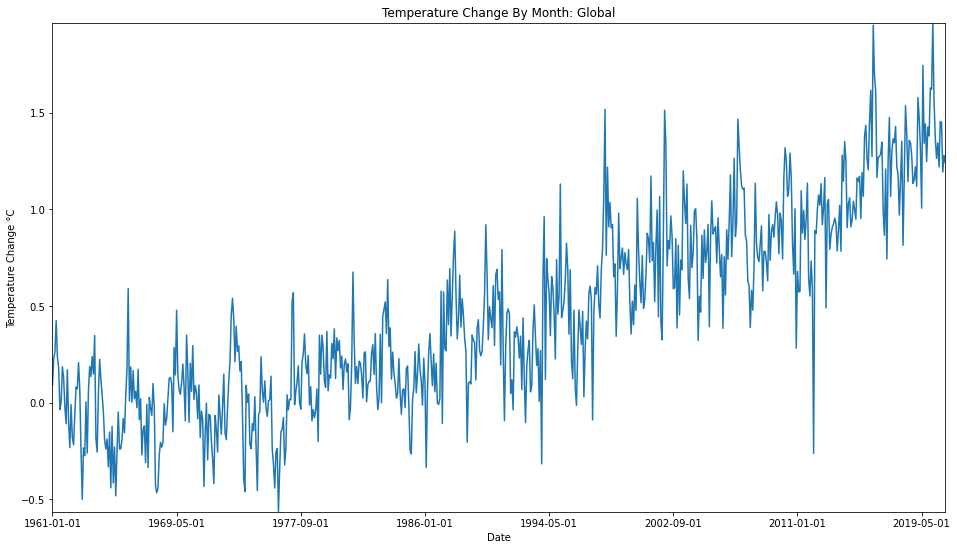

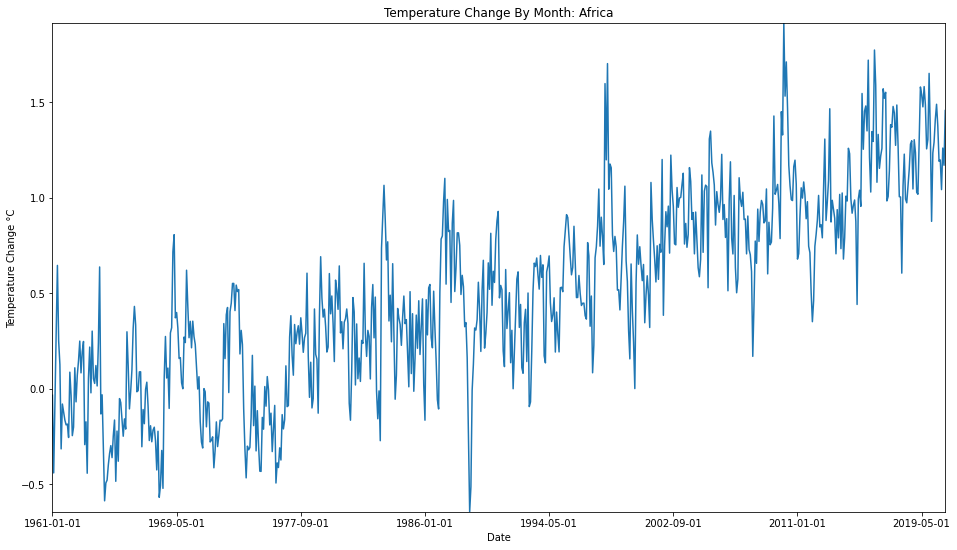

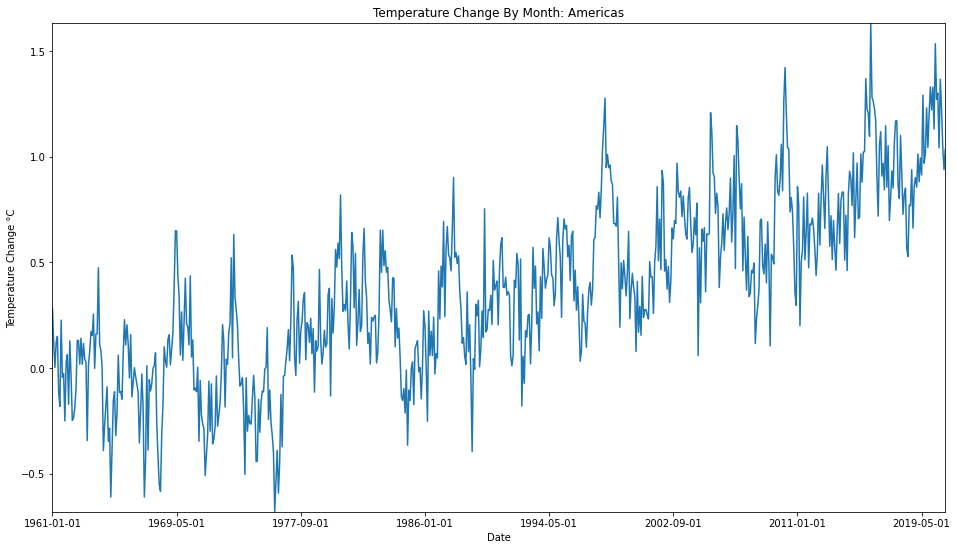

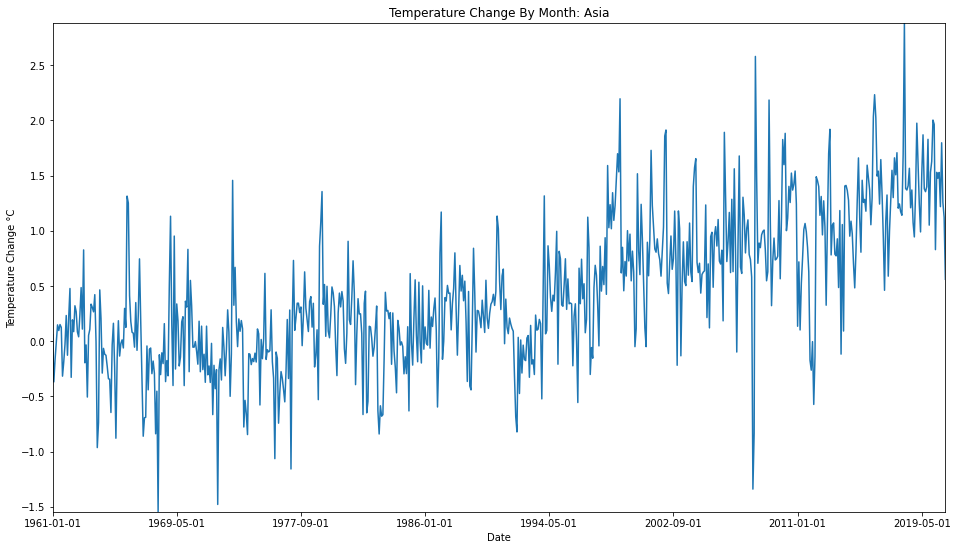

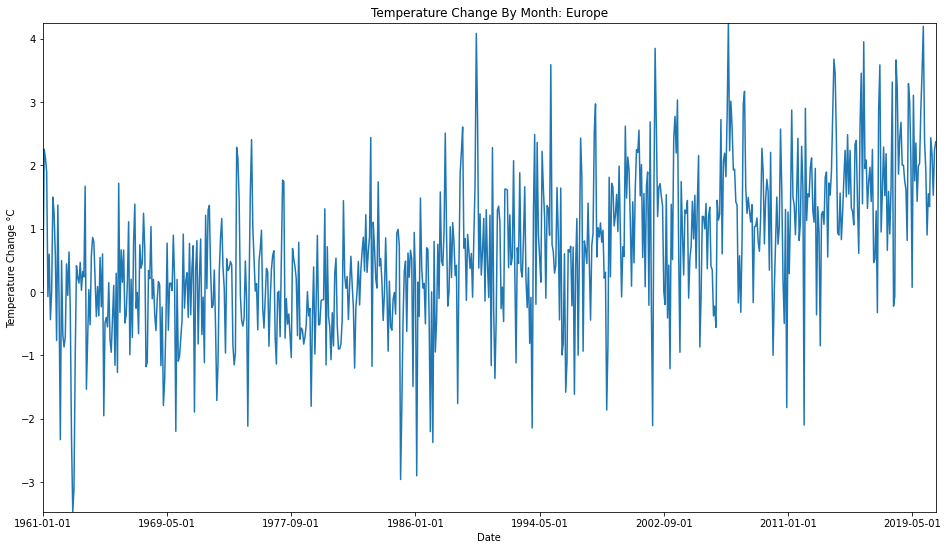

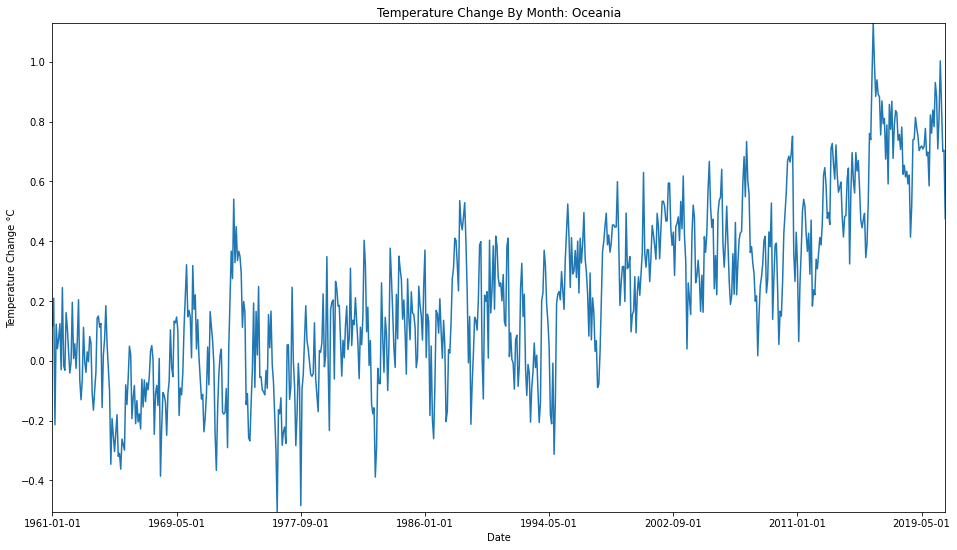

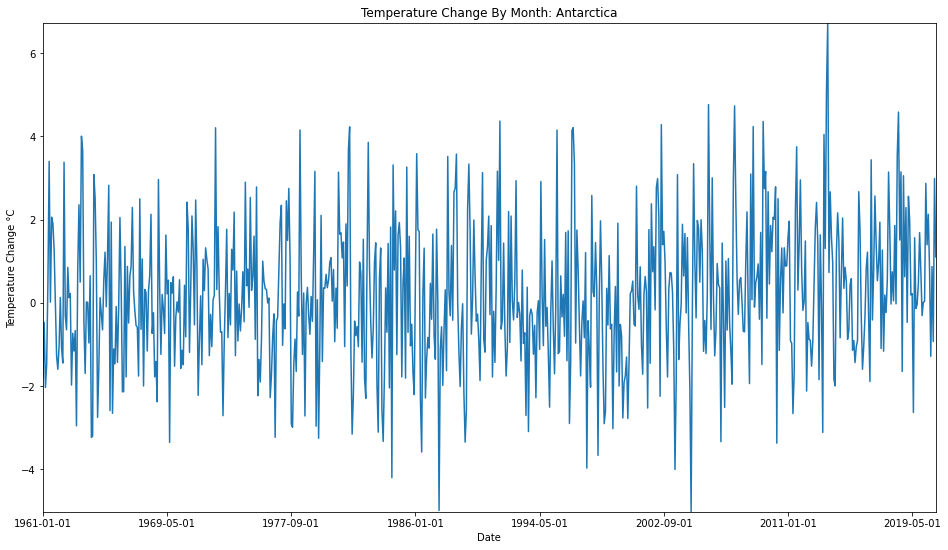

In [47]:
### Time series plot
for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = subp.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Temperature Change By Month: ' + region)
    plt.autoscale(tight=True)
    plt.show();

Observation: On this graphs of the 5 regions(Africa, Americas ,Asia, Europe, Oceania, and Antarctica) and a global overview we can see that the temperature change is increasing because there is a linear trend that is increasing , and we can see also seasonality due to the different seasons from winter to summer that affect the difference in the Temperature change.


For a better view we did a rolling Average of 12 months to smooth the graph which allows to have a clear view of the trend.

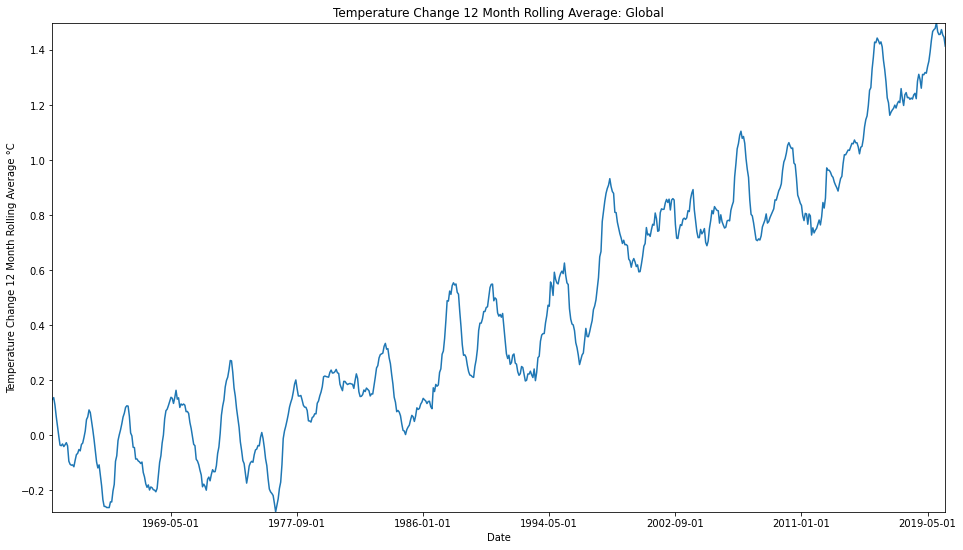

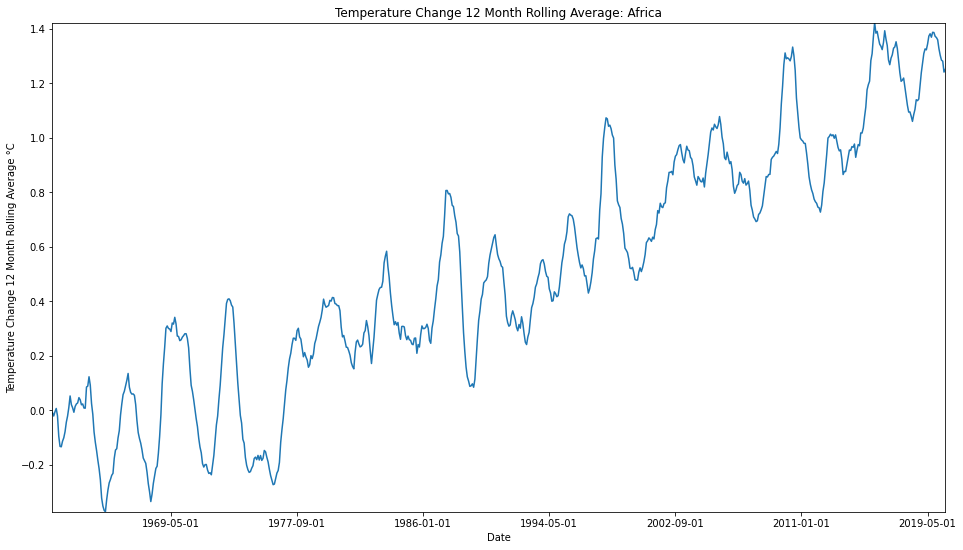

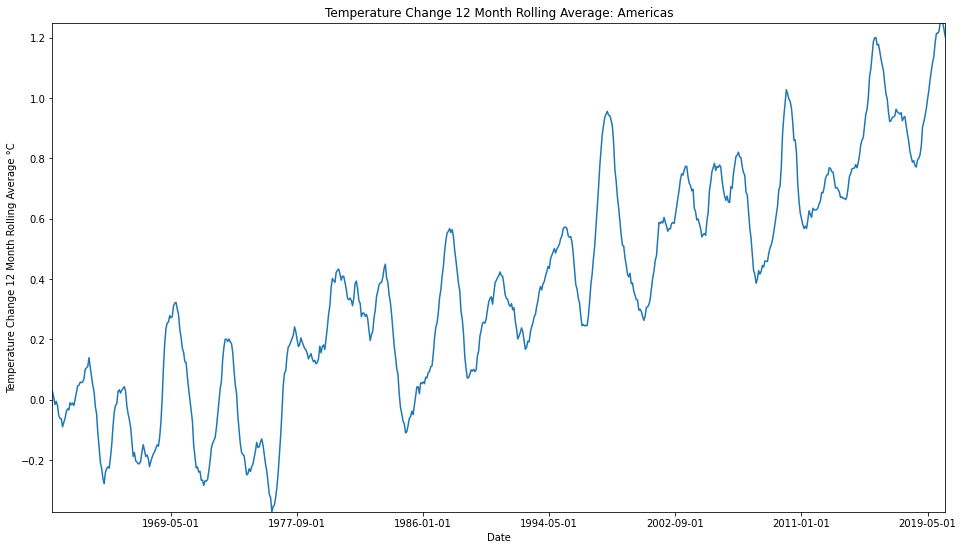

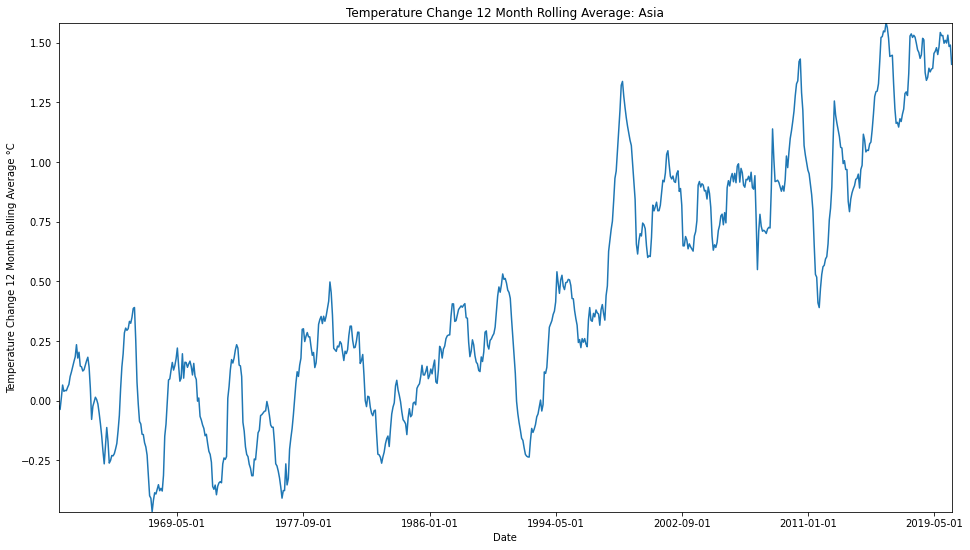

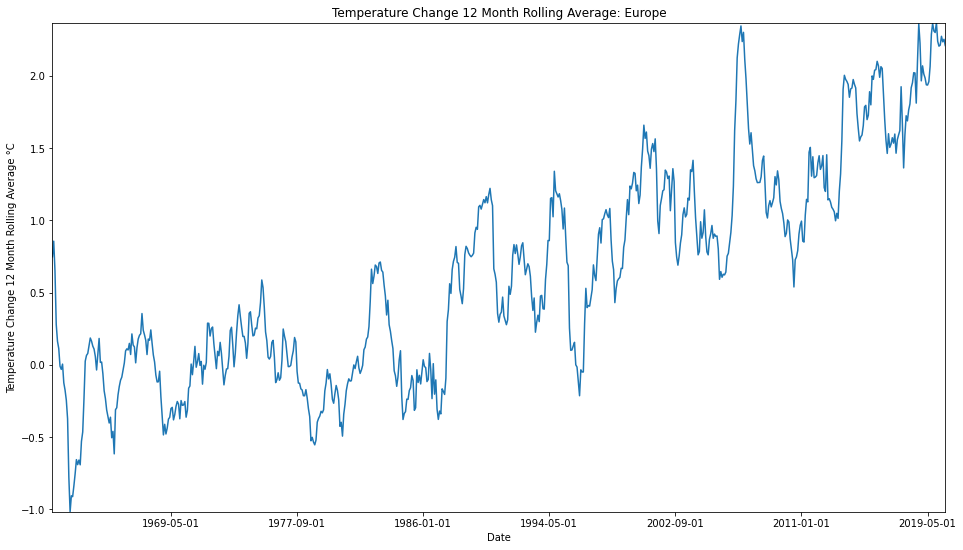

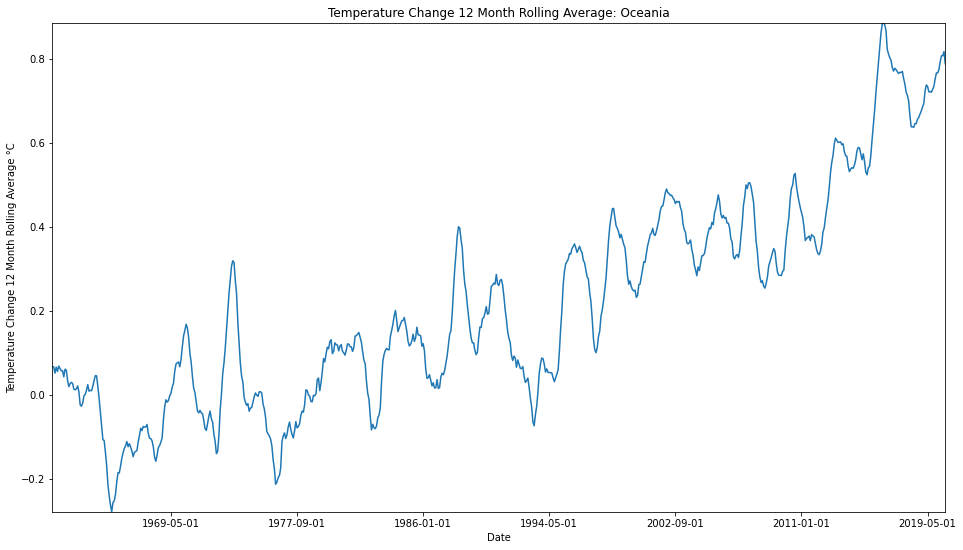

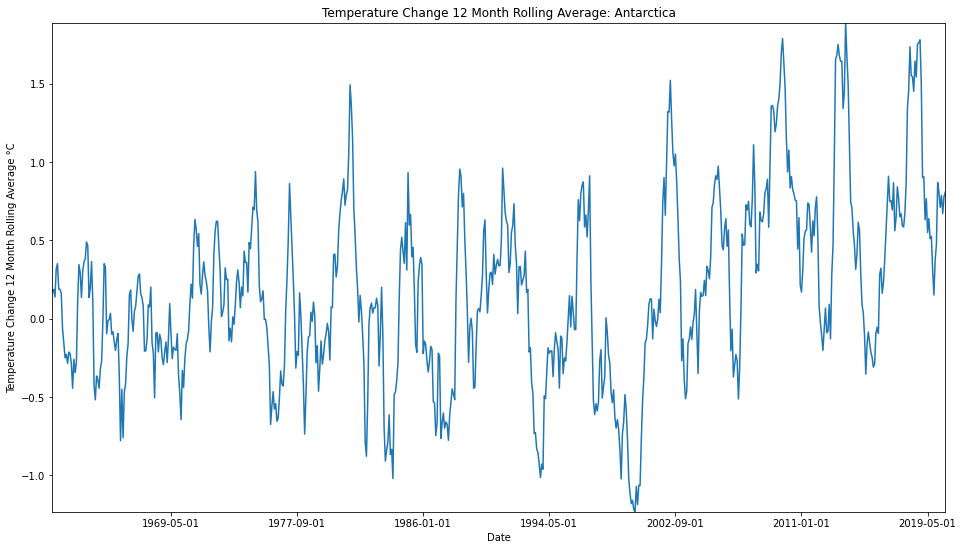

In [48]:
### Rolling Average plot 12 months

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    subp_rolling = subp.rolling(window=12, center=True).mean()
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = subp_rolling.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change 12 Month Rolling Average °C',
       title='Temperature Change 12 Month Rolling Average: ' + region)
    plt.autoscale(tight=True)
    plt.show();

**Autocorrelation**

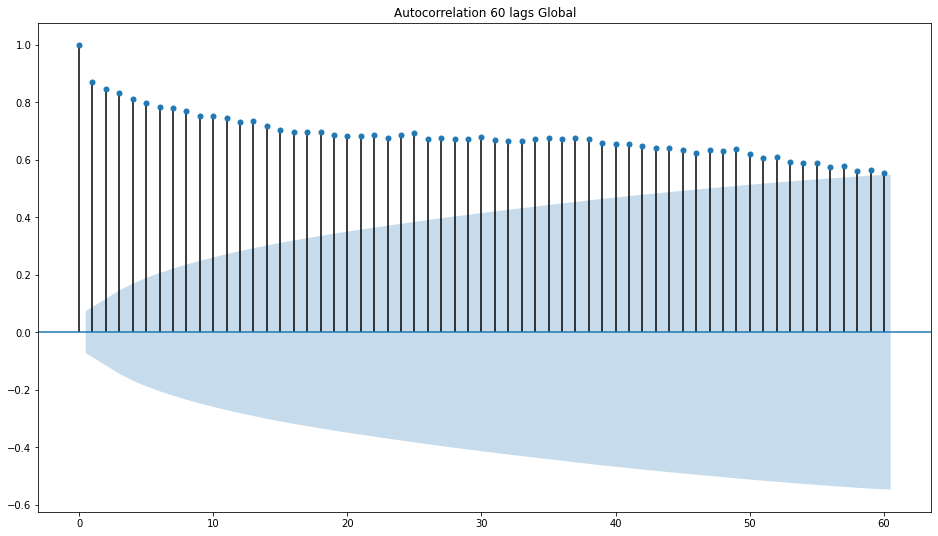

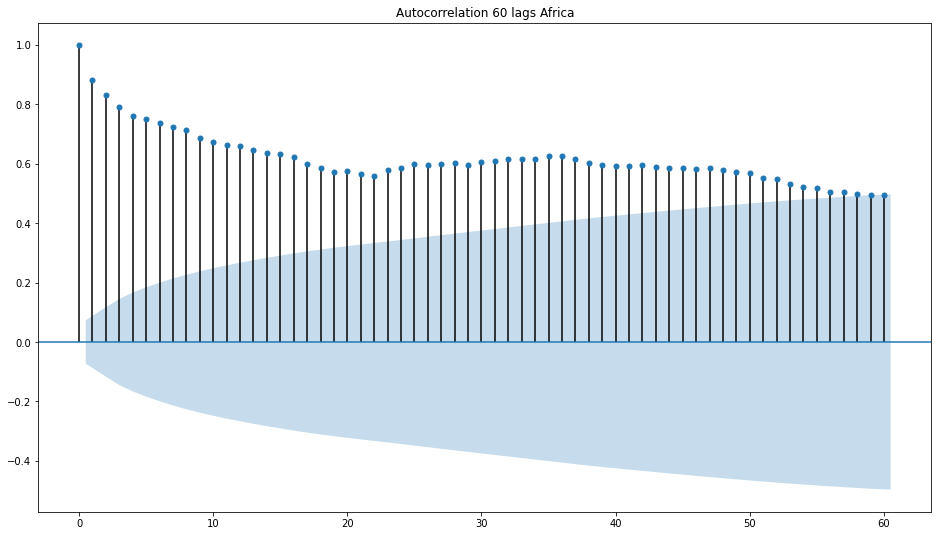

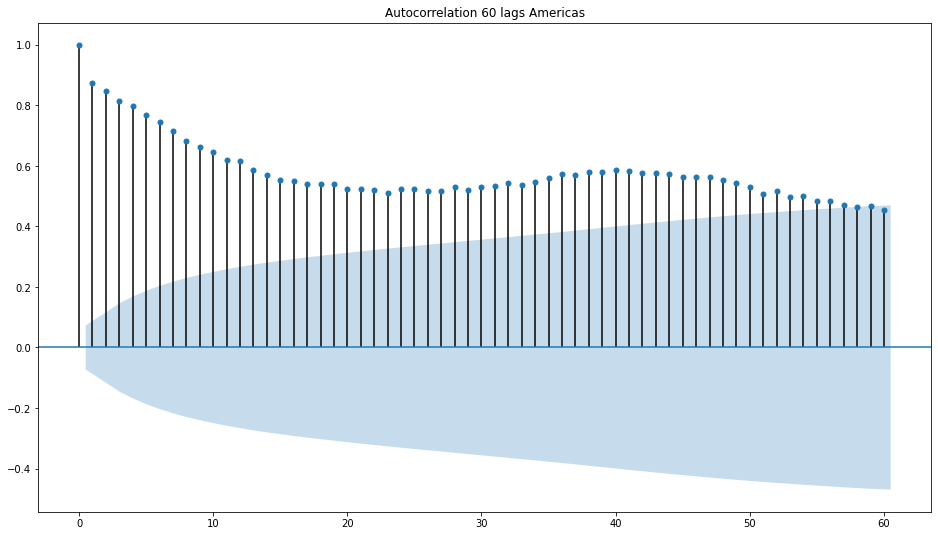

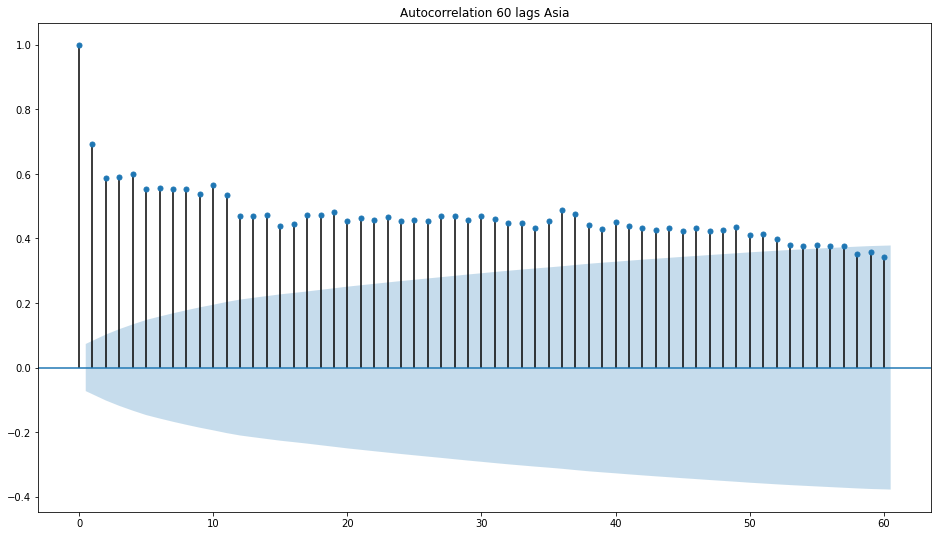

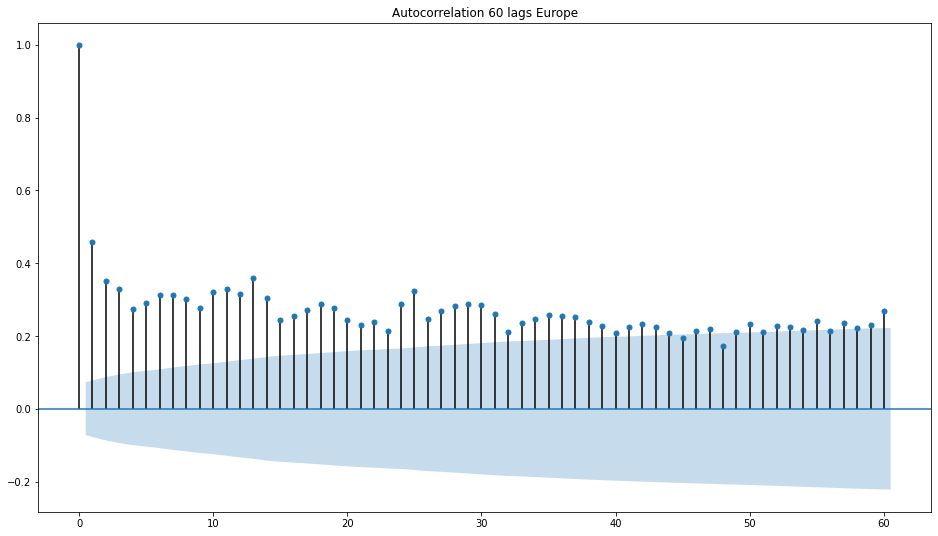

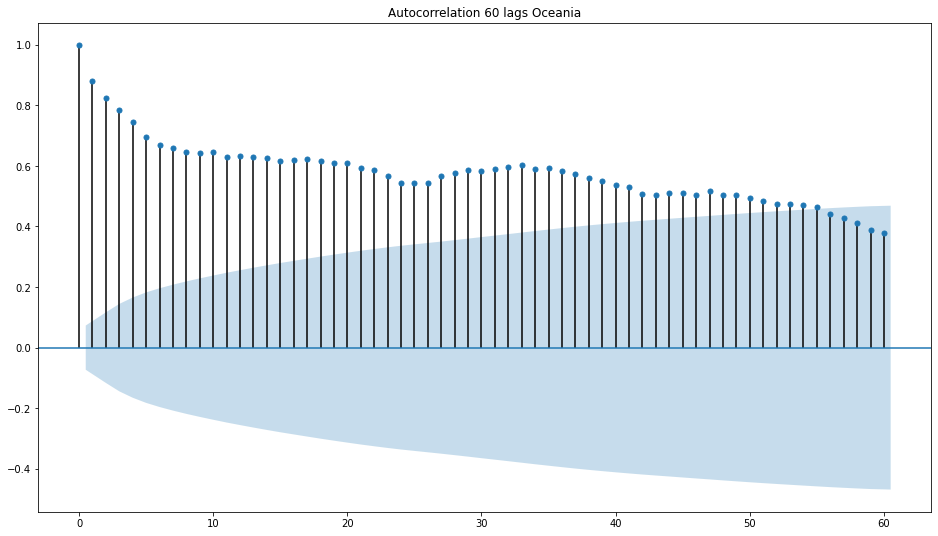

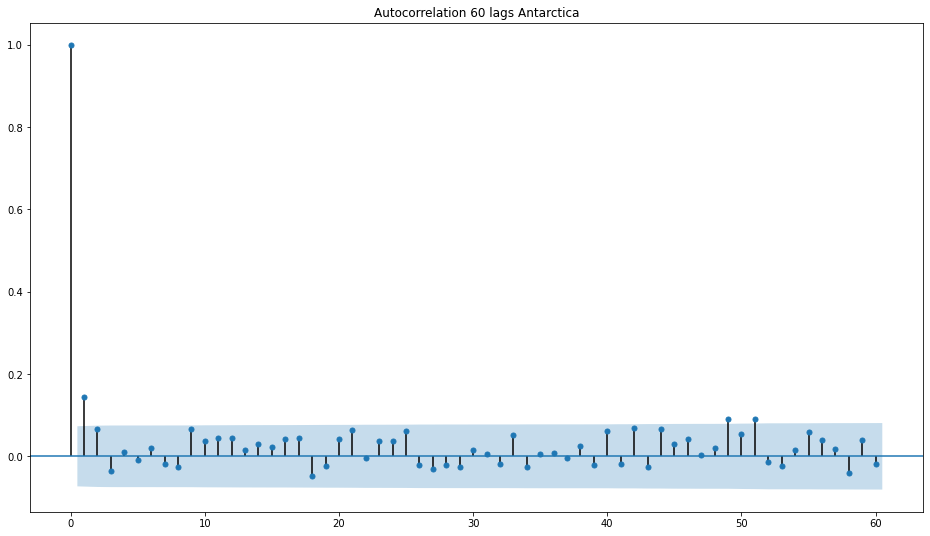

In [50]:
### Autocorrelations lag 60 all regions
plt.rcParams["figure.figsize"] = [16,9]

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    plot_acf(subp, lags= 60 ,title= 'Autocorrelation 60 lags ' + region)

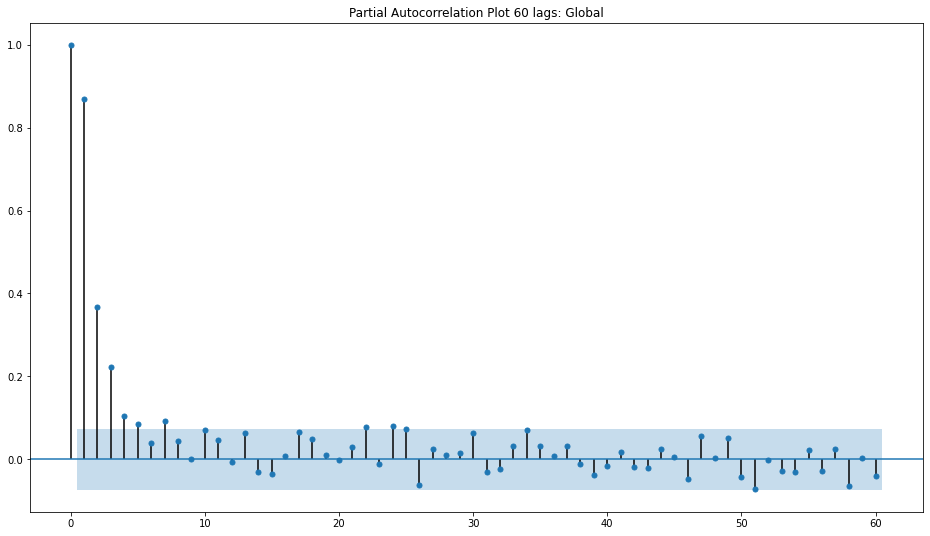

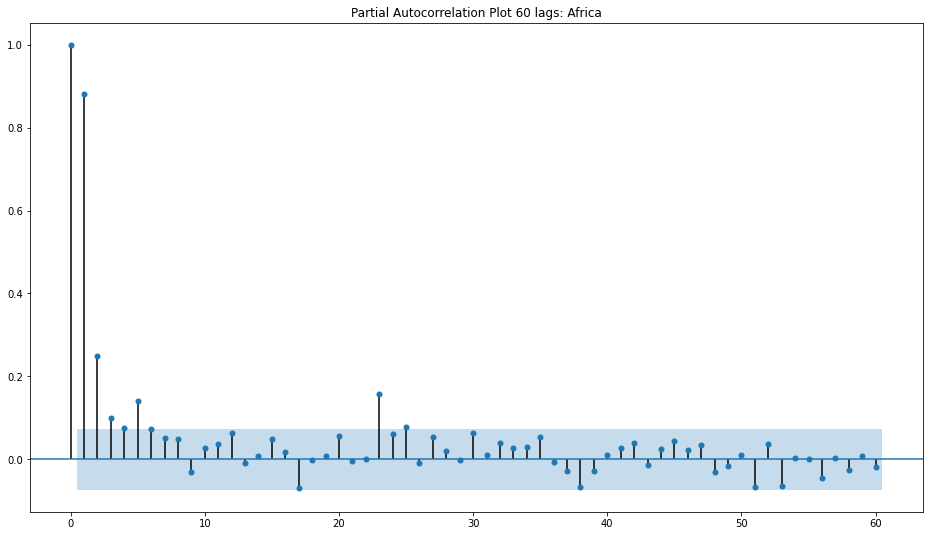

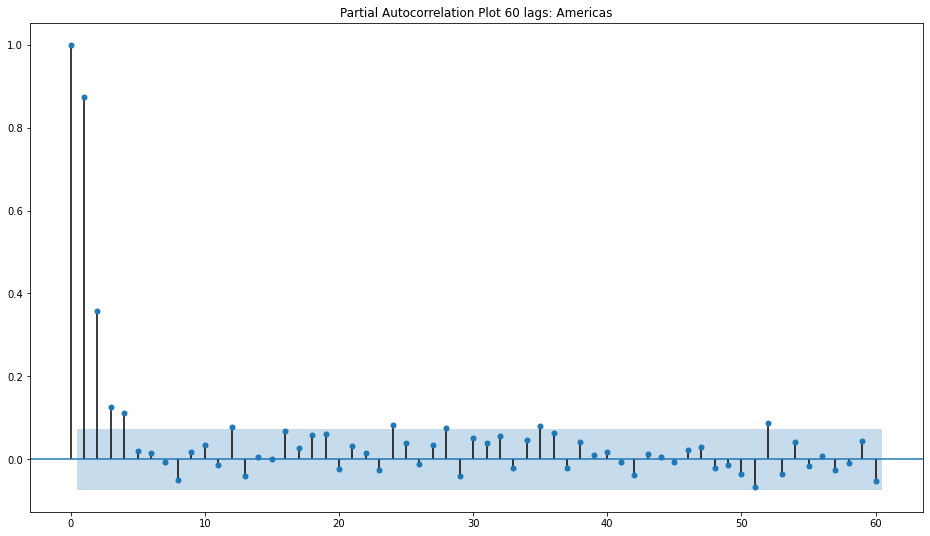

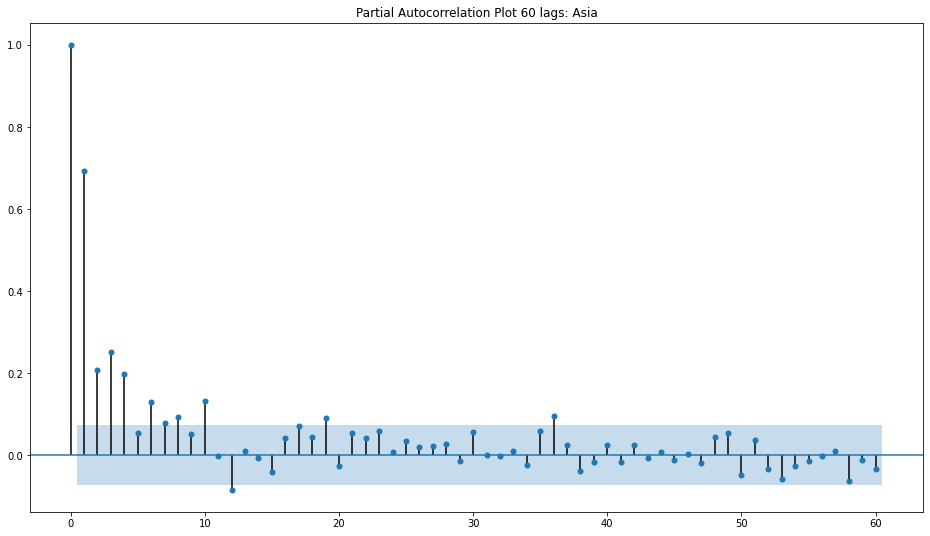

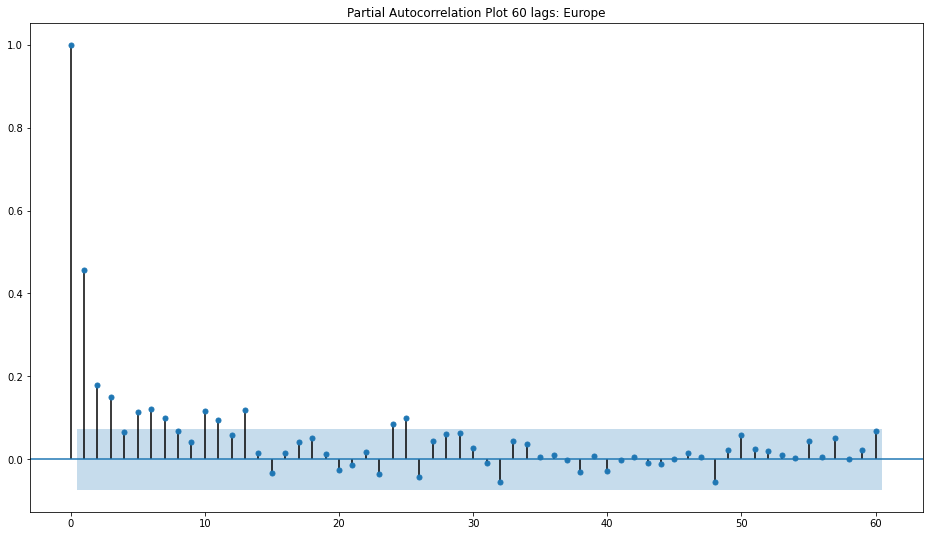

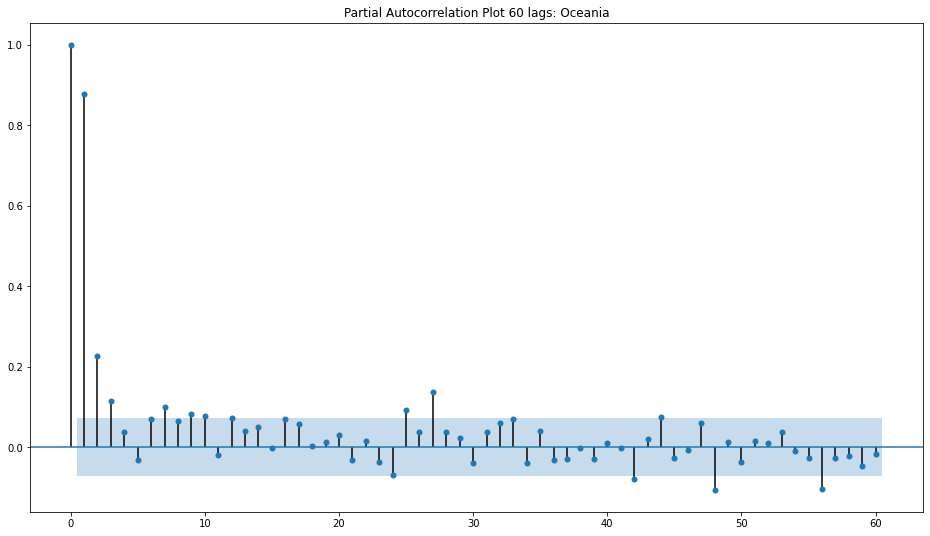

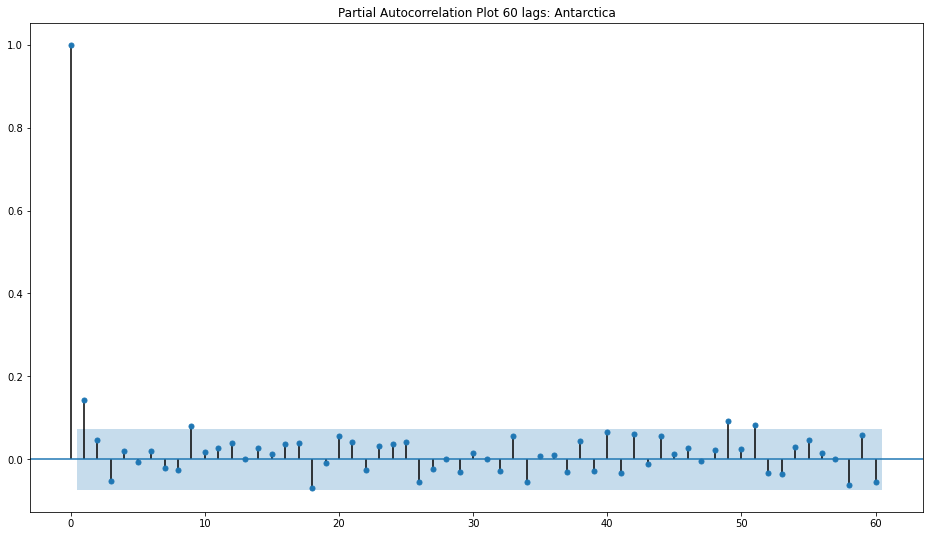

In [51]:
### Partial Autocorrelations lag 60 for all Regions
plt.rcParams["figure.figsize"] = [16,9]

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    plot_pacf(subp.values, lags=60,title= 'Partial Autocorrelation Plot 60 lags: ' + region, method='ywm')

The plot of autocorrelation for the different regions shows that

• Africa: we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,4,5,6,17,23,25,38,51 which we can infer that there is some correlation between consecutive 6 months that make seasons, and positive correlations that come around 2 years, 38 months. There are negative relationships that occur at 17 months and 51 months.

• Americas: we can see that the temperature change is correlated from ACF up to 56 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,4,12,16,24,28,35,51,52 which we can infer that there is some correlation between consecutive 3-4 months that make seasons, and positive correlations that come around at 12,16,24,28,35 and 52 months. There are negative relationships that occur 51 months.

• Asia: we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,6,7,8,10,12,17,19,36 which we can infer that there is some correlation between consecutive 3-6 months for different seasons, and positive correlations that come around 17,19, and 36 months. There are negative relationships that occur at 12months.

• Oceania: we can see that the temperature change is correlated from ACF up to 57 months with the blue filled space that represents the 95% of confidence interval which means up to 4 years. There are spikes in the PACF at lag 1,2,3,6,7,9,10,12,16,24,25,27,33,42,44,48,56

• Europe: we can see that the temperature change is correlated from ACF up to 40 months with the blue filled space that represents the 95% of confidence interval which means up to 3 years. There are spikes in the pacf at lag 1,2,3,5,6,7,8,10,11,13,24,25

• Antarctica: we can see that the temperature change is correlated from ACF up to 40 months with the blue filled space that represents the 95% of confidence interval which means up to 3 years. There are spikes in the pacf at lag 1,9,18,49,51

Seasonality and trend

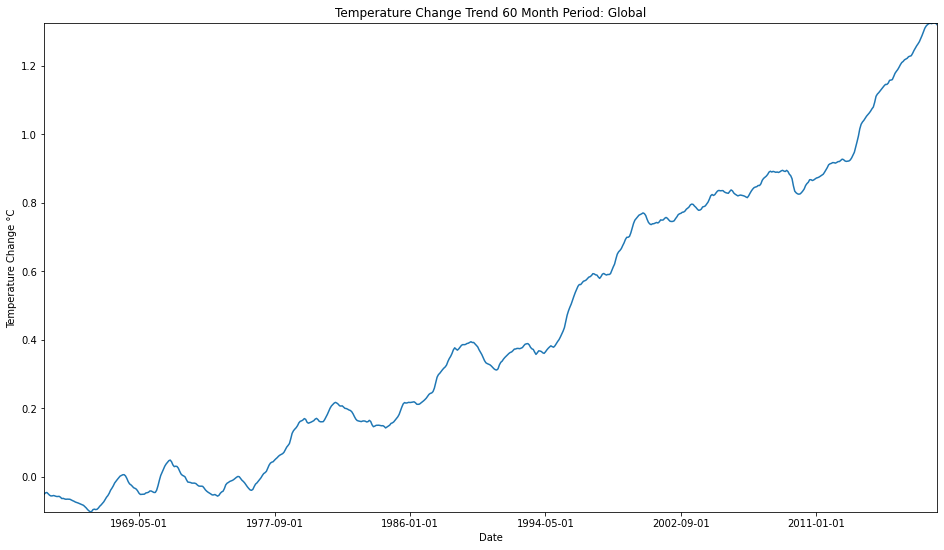

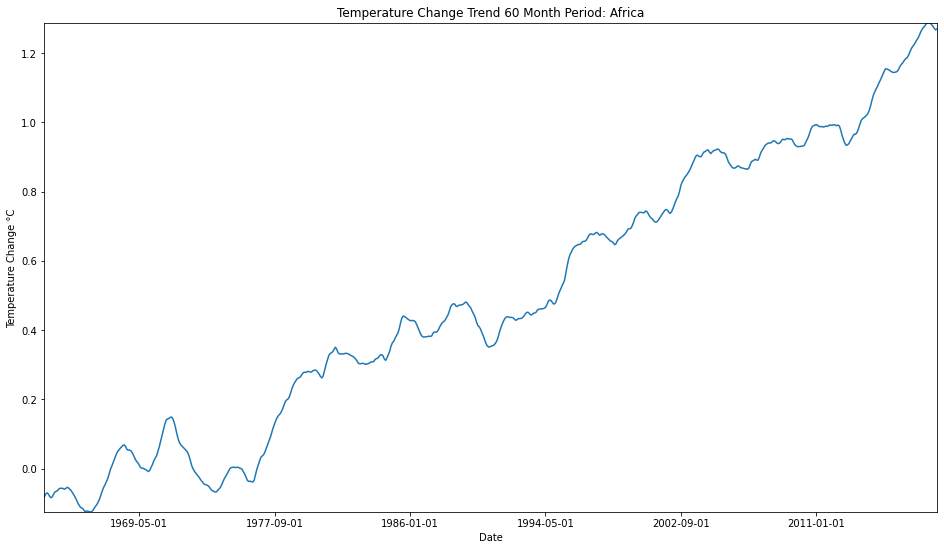

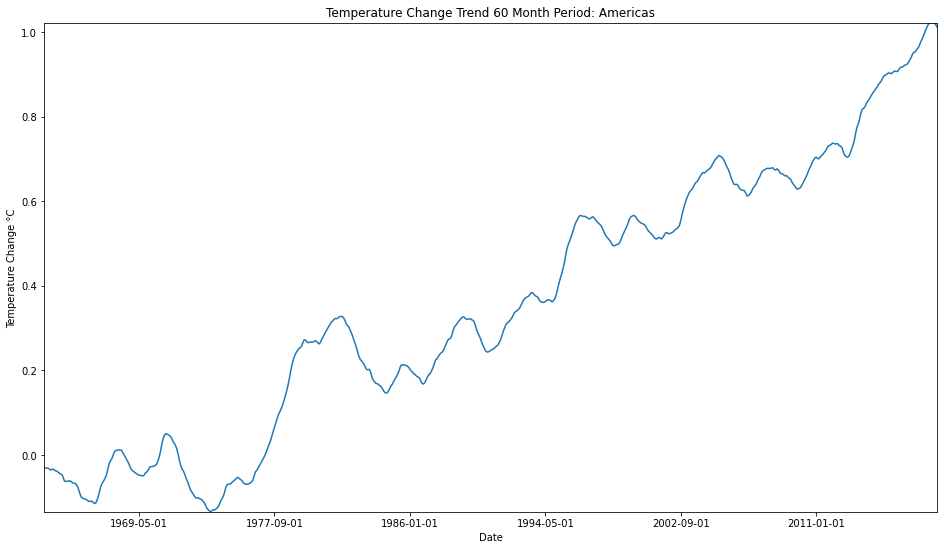

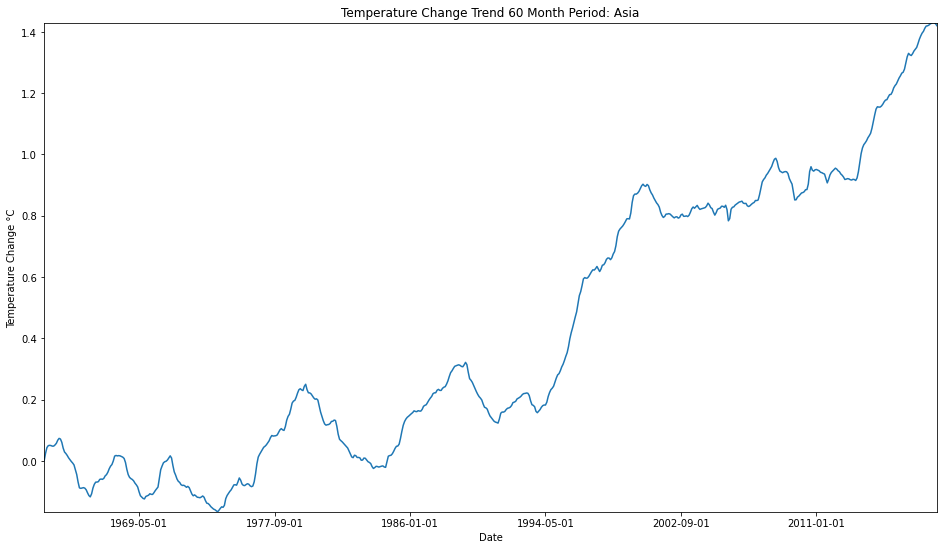

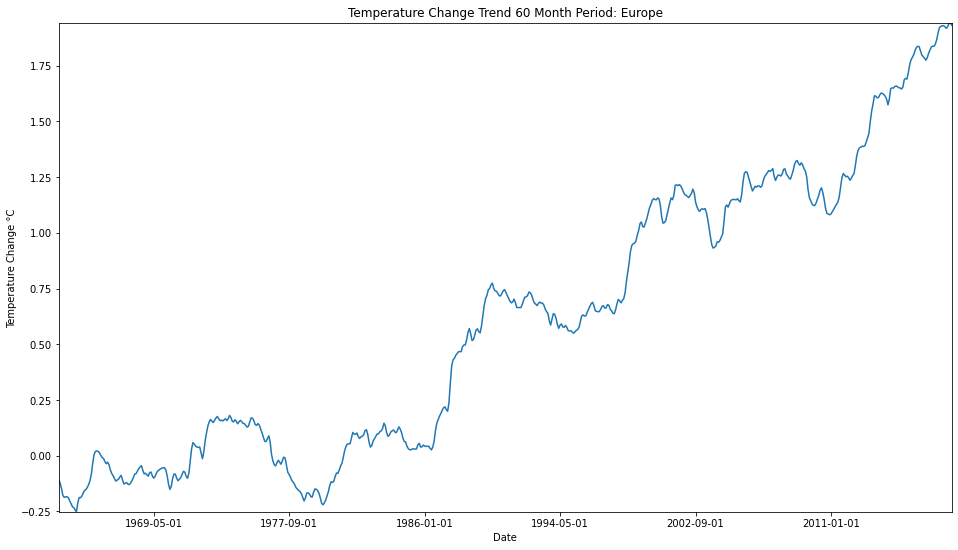

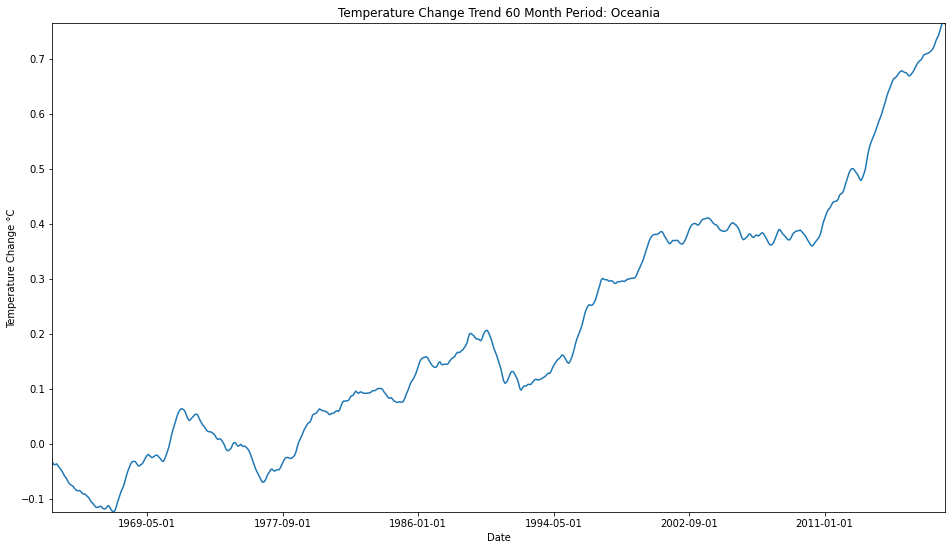

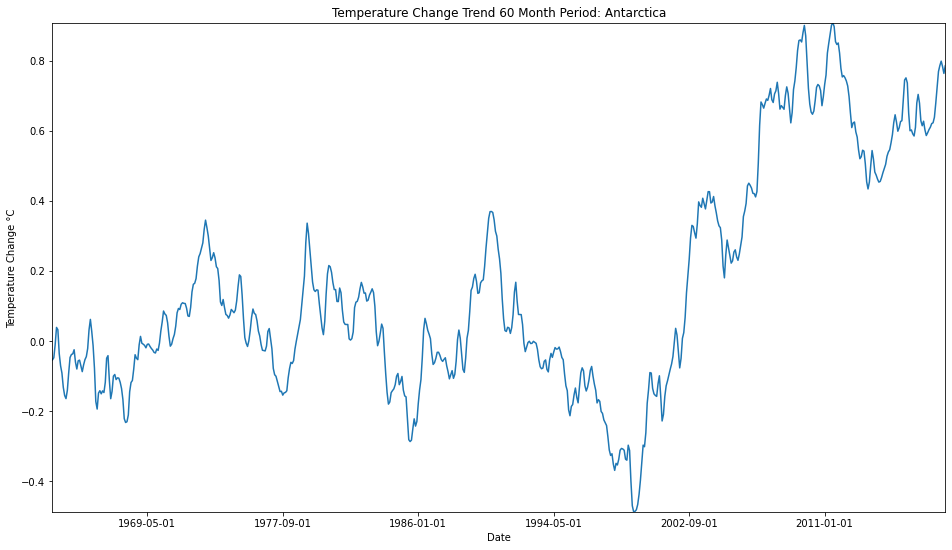

In [52]:
### Trend Decomposition in 5 years

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
    decomposition = seasonal_decompose(subp , period = 60)  
    trend = decomposition.trend
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = trend.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Temperature Change Trend 60 Month Period: ' + region)
    plt.autoscale(tight=True)
    plt.show();    
        

Observation: With this trend decomposition we can now see that globally the temperature change is rising to 1.2°C. If we look at each region we can see that Europe is having the highest temperature change because it is almost at 1.8°C. Another observation is that the highest Temperature in Antarctica occurred around 2009 to 2011 at 0.9°C in temperature change.

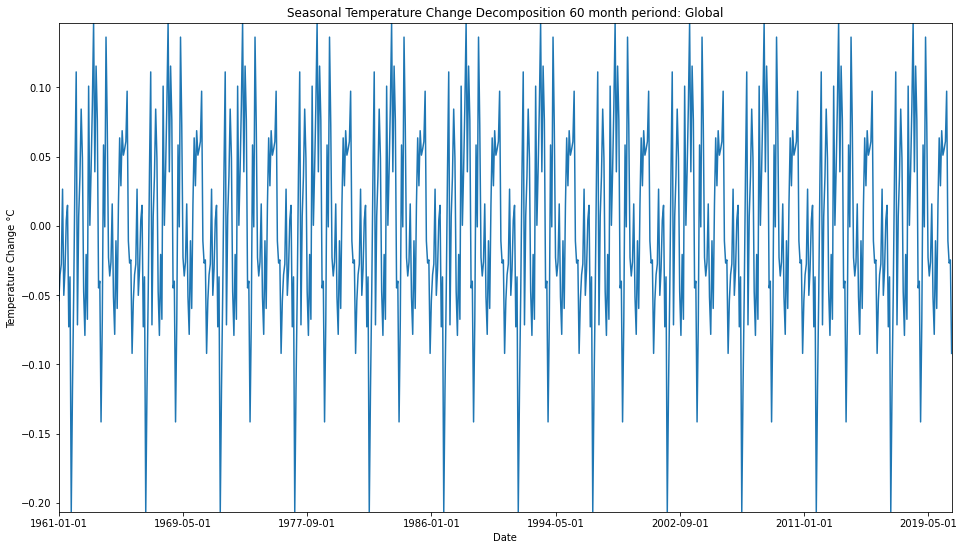

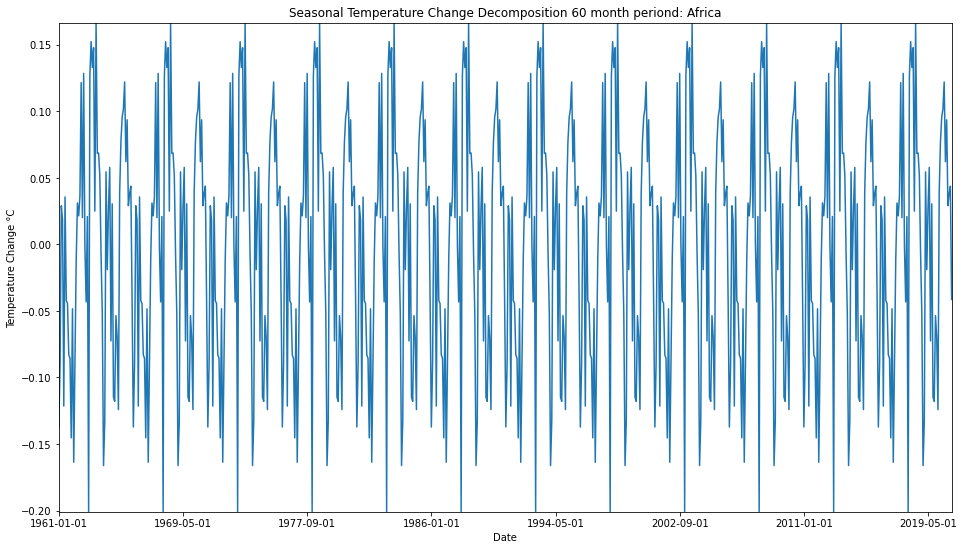

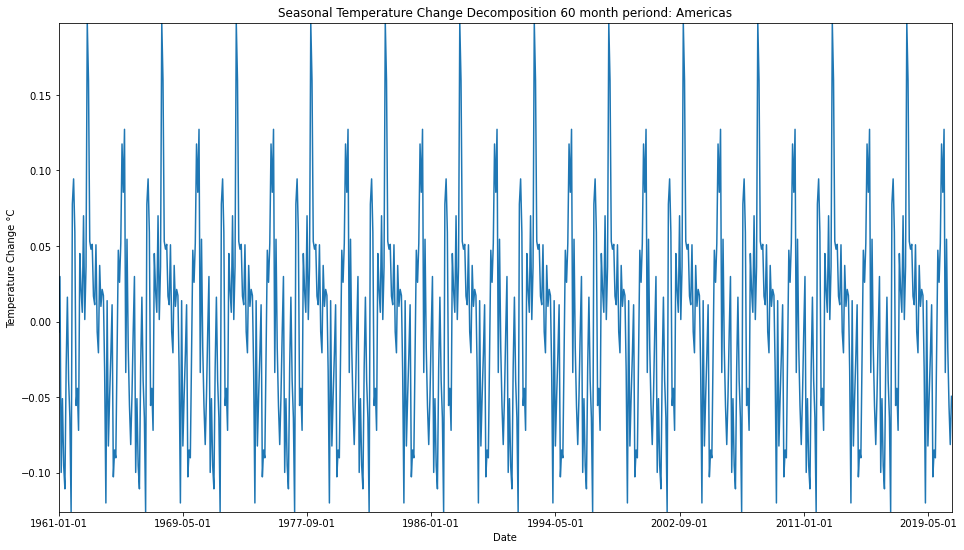

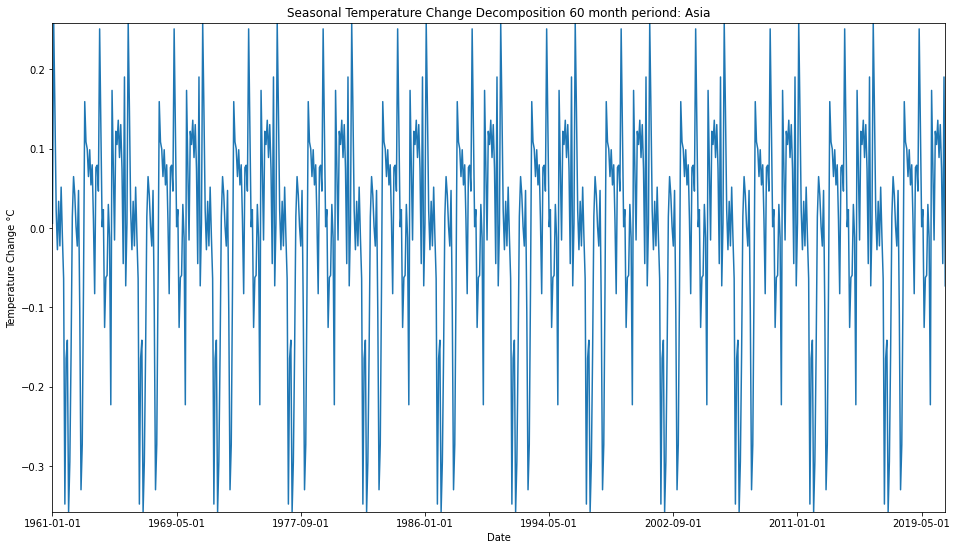

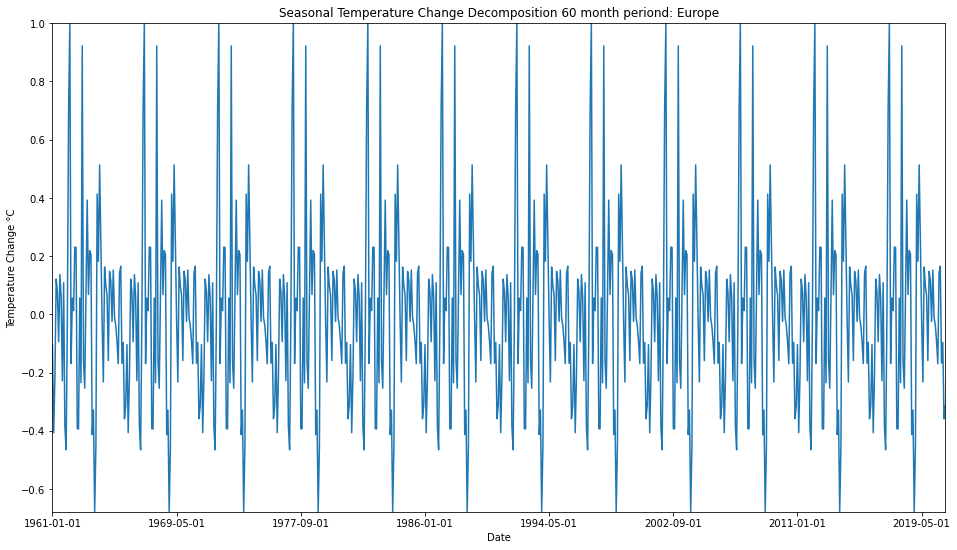

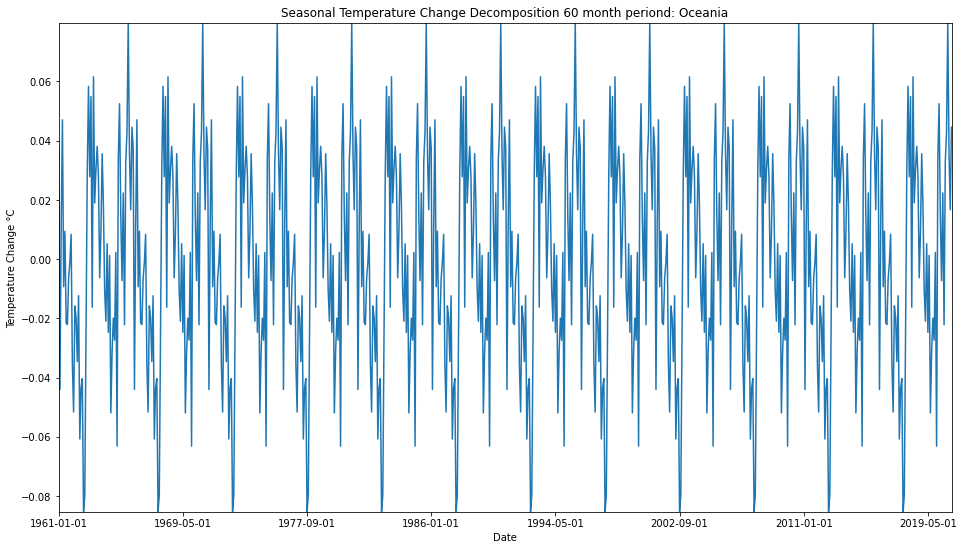

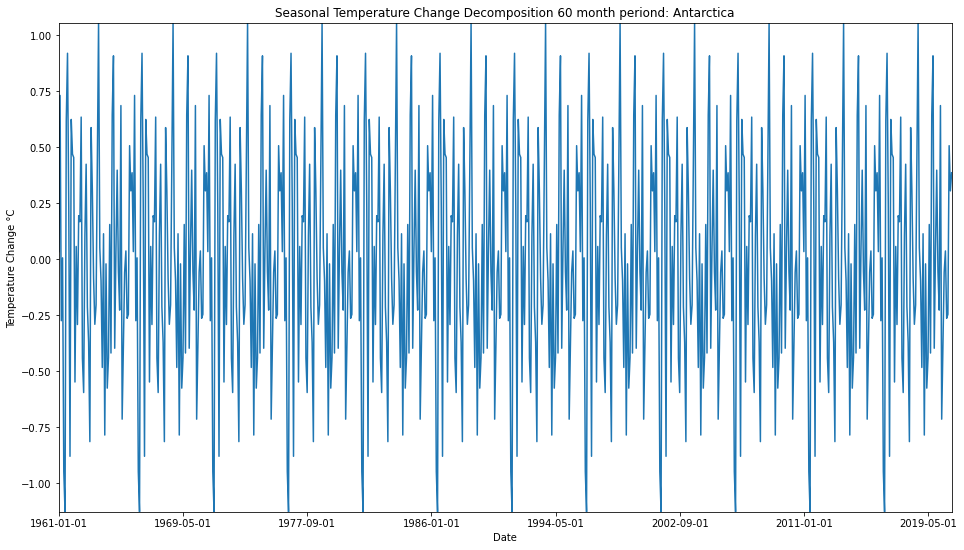

In [53]:
### Seasonality Decomposition for 5 year

for region in region_list:
    if region == 'Global':
        subp = data.groupby(['date'])['value'].mean()
    else:        
        data_region = data[data['region'] == region]
        subp = data_region.groupby(['date'])['value'].mean()
        
    decomposition = seasonal_decompose(subp , period = 60)
    seasonal = decomposition.seasonal
    
    fig, ax = plt.subplots(figsize=(16,9))  
    ax = seasonal.plot()
    maj_loc = mdates.AutoDateLocator()
    ax.xaxis.set_major_locator
    ax.set(xlabel="Date", ylabel='Temperature Change °C',
       title='Seasonal Temperature Change Decomposition 60 month periond: ' + region)
    plt.autoscale(tight=True)
    plt.show();    

Observation: With this seasonal decomposition I can now see that the same temperature change reoccurs after some time almost around 2 years which gives it seasonality. It is slightly different from region to region.

**Modeling**

In this part we built a SARIMAX model to predict and forecast the temperature change for the next 15 years. I choose to use SARIMAX because the model take into account the seasonality of dataset.

SARIMA models include extra parameters related to the seasonal part. Therefore, a SARIMA(p,d,q)(P,D,Q,S) model has (p,d,q) that are non-seasonal parameters and P,D,Q,S that are the seasonal parameters.

Non-seasonal orders

p: Autoregressive order. d: Differencing order. q: Moving average order.

Seasonal orders

P: Seasonal autoregressive order. D: Seasonal differencing order. Q: Seasonal moving average order S: Length of the seasonal cycle.

NOTE: To determine the initial parameters I needed a subset of region data so I have a strictly linear time series dataset where there is only one month per row. I initially chose Asia. The Global region was added after this initial step or I would have used that instead.

In [62]:
data['date']= pd.to_datetime(data.date)

data_sample = pd.DataFrame(data[data['region'] == 'Asia'].groupby(['date'])['value'].mean())

data_sample.index = pd.DatetimeIndex(data_sample.index).to_period('M')

print(f'Number of observations: {data_sample.shape[0]}')
print(f'Number of training observations: {round(data_sample.shape[0] * 0.75)}')
print(f'Number of testing observations: {data_sample.shape[0] - (data_sample.shape[0] * 0.75)}')

Number of observations: 720
Number of training observations: 540
Number of testing observations: 180.0


In [63]:
train_sample = data_sample.iloc[:541,]
test_sample = data_sample.iloc[541:,]

In [76]:
train_sample

value
date             
1961-01  0.060068
1961-02 -0.368659
1961-03 -0.166841
1961-04 -0.009977
1961-05  0.147955
...           ...
2005-09  1.102404
2005-10  0.726135
2005-11  0.699231
2005-12  0.824846
2006-01  0.184327

[541 rows x 1 columns]

In [77]:
test_sample

value
date             
2006-02  1.892385
2006-03  1.299885
2006-04  0.721673
2006-05  0.906846
2006-06  1.166769
...           ...
2020-08  1.219058
2020-09  1.797750
2020-10  1.256077
2020-11  1.123019
2020-12  0.561269

[179 rows x 1 columns]

In [64]:
# Import Augmented Dickey-Fuller test.
from statsmodels.tsa.stattools import adfuller
def my_dickey_fuller(data):
    data = data.dropna()
    print('\t\t\033[1mResults of Dickey-Fuller Test\033[0m\n\n')
    df_test = adfuller(data, maxlag=0, autolag=None)
    
    print(f'Test Statistic \t\t\t\t {round(df_test[0],2)}')
    print(f'p-value \t\t\t\t {df_test[1]}')
    print(f'Lags Used \t\t\t\t {round(df_test[2],2)}')
    print(f'Number of Observations \t\t\t {round(df_test[3],2)}')
    
    for key, value in df_test[4].items():
        print(f'Critical Value {key} \t\t\t {round(value, 2)}')

In [65]:
my_dickey_fuller(train_sample['value'])

		Results of Dickey-Fuller Test


Test Statistic 				 -12.09
p-value 				 2.1088410739168798e-22
Lags Used 				 0
Number of Observations 			 540
Critical Value 1% 			 -3.44
Critical Value 5% 			 -2.87
Critical Value 10% 			 -2.57


I did an Augmented Dickey-Fuller test to check if our time series are stationary using the a confidence interval of 95%.

I interpret this result using the p-value from the test. A p-value below a threshold of 5% suggests we reject the null hypothesis (stationary). Otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

According to the p-value we can say that the data are stationary.

Based on that result the initial d in the SARIMAX parameters will be 0.

In [66]:
# Import ARIMA model.
from statsmodels.tsa.arima_model import ARIMA
# Starting AIC, p, and q.
best_aic = 99 * (10 ** 16)
best_p = 0
best_q = 0

# Use nested for loop to iterate over values of p and q.
for p in range(5):
    for q in range(5):

        
            # Fitting an ARIMA(p, 0, q) model
            print(f'Attempting to fit ARIMA{p},0, {q} model')
            
            # Instantiate ARIMA model.
            arima = ARIMA(endog= data_sample,order = (p,0,q),freq = 'M')
            
            
            # Fit ARIMA model.
            model = arima.fit()

            # Print out AIC for ARIMA(p, 0, q) model.
            print(f'The AIC for ARIMA ({p},0,{q}) is: {model.aic}')

            # Is my current model's AIC better than our best_aic?
            if model.aic < best_aic:
                
                # If so, let's overwrite best_aic, best_p, and best_q.
                best_aic = model.aic
                best_p = p
                best_q = q

    
print()
print()
print('MODEL FINISHED!')
print(f'Our model that minimizes AIC on the training data is the ARIMA ({best_p },0,{best_q}).')
print(f'This model has an AIC of {best_aic}.')

Attempting to fit ARIMA0,0, 0 model
The AIC for ARIMA (0,0,0) is: 1441.3072465970645
Attempting to fit ARIMA0,0, 1 model
The AIC for ARIMA (0,0,1) is: 1160.430425852428
Attempting to fit ARIMA0,0, 2 model
The AIC for ARIMA (0,0,2) is: 1078.8324364673617
Attempting to fit ARIMA0,0, 3 model
The AIC for ARIMA (0,0,3) is: 1050.2606189712426
Attempting to fit ARIMA0,0, 4 model
The AIC for ARIMA (0,0,4) is: 994.0380368876811
Attempting to fit ARIMA1,0, 0 model
The AIC for ARIMA (1,0,0) is: 975.3437462810455
Attempting to fit ARIMA1,0, 1 model
The AIC for ARIMA (1,0,1) is: 867.1030774367052
Attempting to fit ARIMA1,0, 2 model
The AIC for ARIMA (1,0,2) is: 837.247720662559
Attempting to fit ARIMA1,0, 3 model
The AIC for ARIMA (1,0,3) is: 839.0580571052205
Attempting to fit ARIMA1,0, 4 model
The AIC for ARIMA (1,0,4) is: 841.0480314084352
Attempting to fit ARIMA2,0, 0 model
The AIC for ARIMA (2,0,0) is: 944.9794753416213
Attempting to fit ARIMA2,0, 1 model
The AIC for ARIMA (2,0,1) is: 838.3157

I used AIC (Akaike information criterion) metric to find the best value of p and q for non-seasonal orders . The best_aic is (4,0,3)

In [67]:
import time
t0 = time.time()
final_mse = 10000000000000
final_S = 0
final_D = 0
final_P = 0
final_Q = 0
start = test_sample.index[0]
end = test_sample.index[-1]
test_values = test_sample['value']
for S in range(5,7):
    for D in range(4):
        for P in range(4):
            for Q in range(4):
                print(f'Checking ({P}, {D}, {Q}, {S}) at {round(time.time() - t0)} seconds.')
                sarima = SARIMAX(endog = train_sample['value'],
                                     order = (4, 0, 3),
                                     seasonal_order = (P, D, Q, S)).fit()

                sarima_pred = sarima.predict(start=start, end = end)

                if mean_squared_error(test_values, sarima_pred) <final_mse:
                    final_mse = mean_squared_error(test_values, sarima_pred)
                    final_S = S
                    final_D = D
                    final_P = P
                    final_Q = Q

                    print(f'We just fit a SARIMAX(4, 0, 3)x({P}, {D}, {Q}, {S}) model with {mean_squared_error(test_values, sarima_pred)} MSE.')

              

print(f'The final model is SARIMAX(4, 0, 3)x({final_P}, {final_D}, {final_Q}, {final_S}).')

Checking (0, 0, 0, 5) at 0 seconds.
We just fit a SARIMAX(4, 0, 3)x(0, 0, 0, 5) model with 1.3057492201929377 MSE.
Checking (0, 0, 1, 5) at 2 seconds.
Checking (0, 0, 2, 5) at 4 seconds.
Checking (0, 0, 3, 5) at 6 seconds.
We just fit a SARIMAX(4, 0, 3)x(0, 0, 3, 5) model with 1.303629435807778 MSE.
Checking (1, 0, 0, 5) at 9 seconds.
Checking (1, 0, 1, 5) at 10 seconds.
Checking (1, 0, 2, 5) at 13 seconds.
Checking (1, 0, 3, 5) at 18 seconds.
We just fit a SARIMAX(4, 0, 3)x(1, 0, 3, 5) model with 1.2094134774873209 MSE.
Checking (2, 0, 0, 5) at 22 seconds.
Checking (2, 0, 1, 5) at 26 seconds.
Checking (2, 0, 2, 5) at 30 seconds.
Checking (2, 0, 3, 5) at 34 seconds.
Checking (3, 0, 0, 5) at 39 seconds.
Checking (3, 0, 1, 5) at 42 seconds.
We just fit a SARIMAX(4, 0, 3)x(3, 0, 1, 5) model with 1.2089563450662608 MSE.
Checking (3, 0, 2, 5) at 46 seconds.
Checking (3, 0, 3, 5) at 51 seconds.
Checking (0, 1, 0, 5) at 58 seconds.
We just fit a SARIMAX(4, 0, 3)x(0, 1, 0, 5) model with 0.6192

We used a for loop function to go through different value of P,D,Q which are seasonal orders to be used by the SARIMAX model in order to find the best seasonal parameters. S, the length of the seasonal cycle, will be determined by the partial autocorrelation by region. The best seasonal orders is (2,2,2,6).

We later found in model testing that 6 for S did not give the best results so we made that as a parameter for our modeling. We determined the S by analyzing autocorrelation plots and testing for the best value.

In [68]:
def sarimax_model(region, S):
    ### define dataframe of region to model
    '''
    runs a Sarimax seasonal model for temperature change for all major regions using a train test split of 75% train
    returns a plot of predictions and the root mean squared error for the test set,
            a forecast plot for the next 15 years,
            and a residuals plot
    parameters are the region to be modelled and the Sarimax seasonal order to be used 
    '''
    if region == 'Global':
        data_region = pd.DataFrame(data.groupby(['date'])['value'].mean())
    else:        
        data_region = pd.DataFrame(data[data['region'] == region].groupby(['date'])['value'].mean())
    
    ### train test split  
    data_region.index = pd.DatetimeIndex(data_region.index).to_period('M')
  
    train = data_region.iloc[:541,]
    test = data_region.iloc[541:,]
    
    ## fit model
    sarima_model = SARIMAX(endog = train['value'] ,order = (4, 0, 3), seasonal_order = (2, 2, 2, S)).fit()
    
    ## get mean squared error
    start = test.index[0]
    end = test.index[-1]
    sarima_pred = sarima_model.predict(start=start, end = end)
    test_values = test['value']
    mse = mean_squared_error(test_values, sarima_pred, squared = False)
    
    
    ### plot actual vs predicted
    preds = pd.DataFrame(sarima_pred.values, index=sarima_pred.index)
    test.rename(columns = {'value':'actual'}, inplace = True)
    preds.rename(columns = {0:'predicted'}, inplace = True)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title('Actual vs Predicted Temperature Change: ' + region + ' (RMSE: ' + str(mse) + ')')
    plt.ylabel('Temperature Change °C')
    test.plot(ax=ax)
    preds.plot(ax=ax);

    ### plot forecast model
    sarima_forecast = SARIMAX(endog = data_region['value'],order = (4, 0, 3),seasonal_order = (2, 2, 2, S)).fit()
    forecast = pd.DataFrame(sarima_forecast.predict(start = '1/1/2021',end = '1/1/2036'))
    ###forecast.rename(columns = {0:'forecasted'}, inplace = True)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title('Forecasted Temperature Change: ' + region)
    plt.ylabel('Temperature Change °C')
    test.plot(ax=ax)
    forecast.plot(ax=ax);
    
    ### Plot Residuals
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title ('Plot of Model Residuals :' + region)
    sns.residplot(x=test ,y=preds, ax = ax)

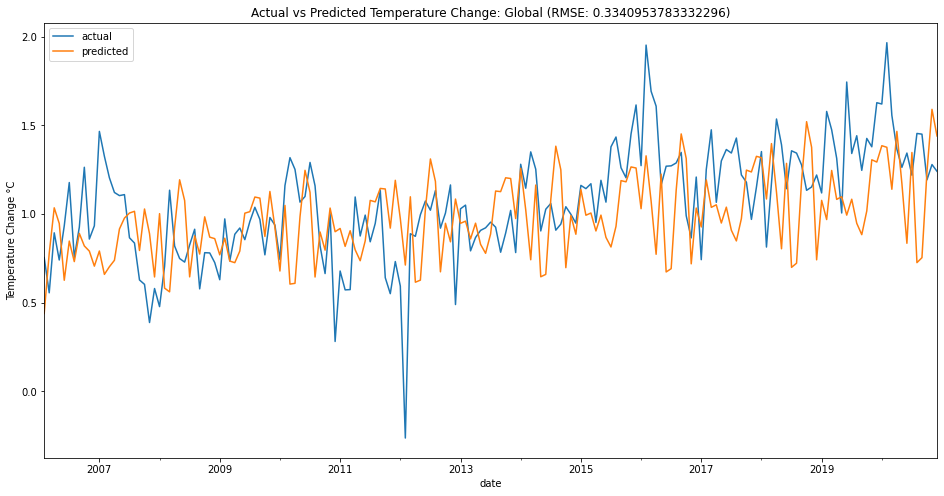

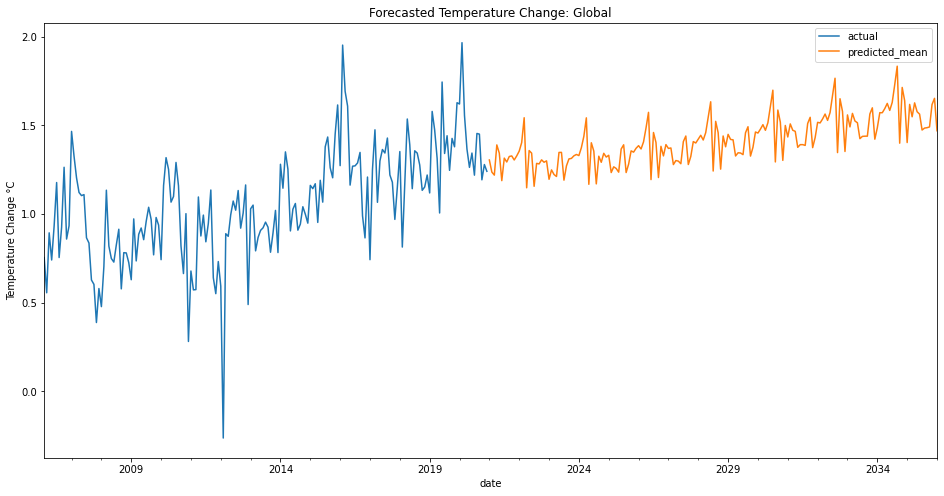

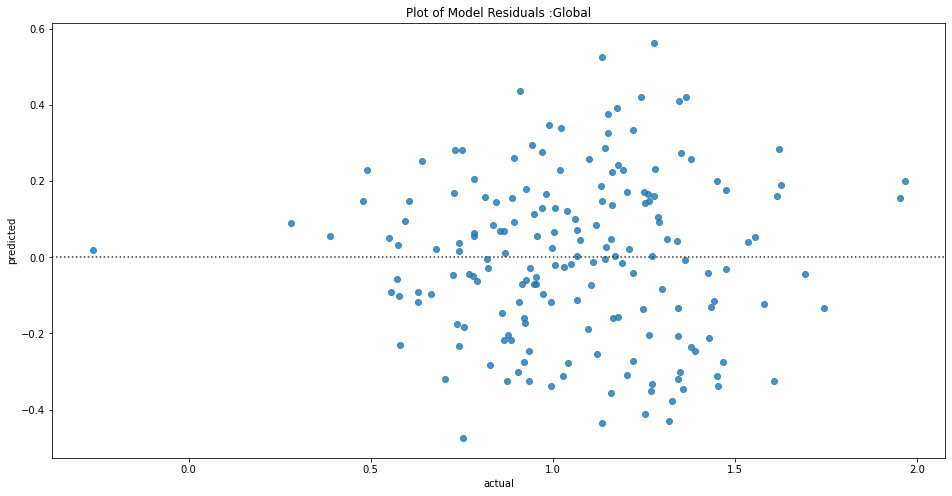

In [69]:
sarimax_model('Global',25)

In [72]:
def sarimax_model(region, S):
    ### define dataframe of region to model
    '''
    runs a Sarimax seasonal model for temperature change for all major regions using a train test split of 75% train
    returns a plot of predictions and the root mean squared error for the test set,
            a forecast plot for the next 15 years,
            and a residuals plot
    parameters are the region to be modelled and the Sarimax seasonal order to be used 
    '''
    if region == 'Global':
        data_region = pd.DataFrame(data.groupby(['date'])['value'].mean())
    else:        
        data_region = pd.DataFrame(data[data['region'] == region].groupby(['date'])['value'].mean())
    
    ### train test split  
    data_region.index = pd.DatetimeIndex(data_region.index).to_period('M')
  
    train = data_region.iloc[:541,]
    test = data_region.iloc[541:,]
    
    ## fit model
    sarima_model = SARIMAX(endog = train['value'] ,order = (4, 0, 3), seasonal_order = (0, 2, 2, S)).fit()
    
    ## get mean squared error
    start = test.index[0]
    end = test.index[-1]
    sarima_pred = sarima_model.predict(start=start, end = end)
    test_values = test['value']
    mse = mean_squared_error(test_values, sarima_pred, squared = False)
    
    
    ### plot actual vs predicted
    preds = pd.DataFrame(sarima_pred.values, index=sarima_pred.index)
    test.rename(columns = {'value':'actual'}, inplace = True)
    preds.rename(columns = {0:'predicted'}, inplace = True)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title('Actual vs Predicted Temperature Change: ' + region + ' (RMSE: ' + str(mse) + ')')
    plt.ylabel('Temperature Change °C')
    test.plot(ax=ax)
    preds.plot(ax=ax);

    ### plot forecast model
    sarima_forecast = SARIMAX(endog = data_region['value'],order = (4, 0, 3),seasonal_order = (0, 2, 2, S)).fit()
    forecast = pd.DataFrame(sarima_forecast.predict(start = '1/1/2021',end = '1/1/2036'))
    ###forecast.rename(columns = {0:'forecasted'}, inplace = True)
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title('Forecasted Temperature Change: ' + region)
    plt.ylabel('Temperature Change °C')
    test.plot(ax=ax)
    forecast.plot(ax=ax);
    
    ### Plot Residuals
    fig, ax = plt.subplots(figsize=(16, 8))
    plt.title ('Plot of Model Residuals :' + region)
    sns.residplot(x=test ,y=preds, ax = ax)

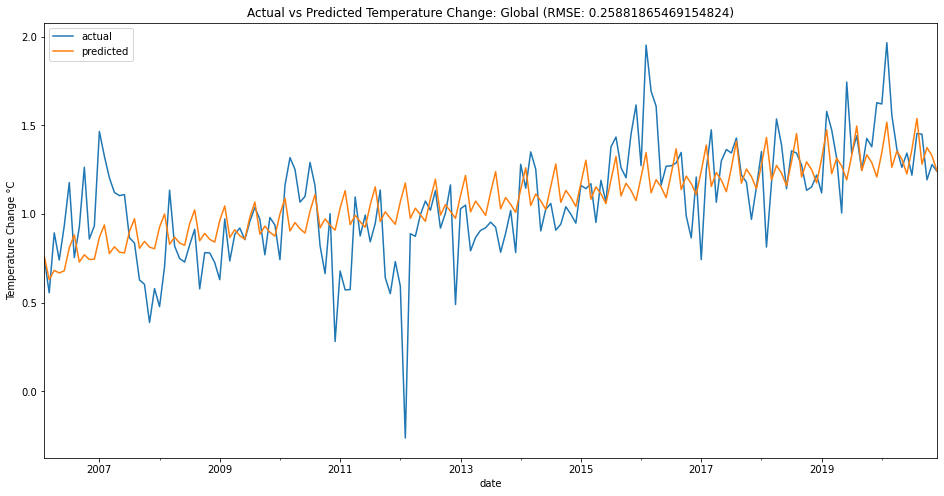

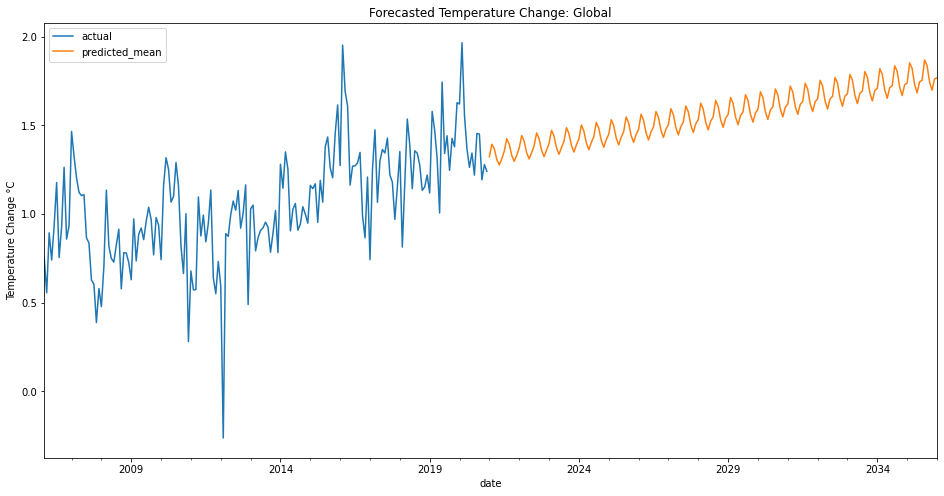

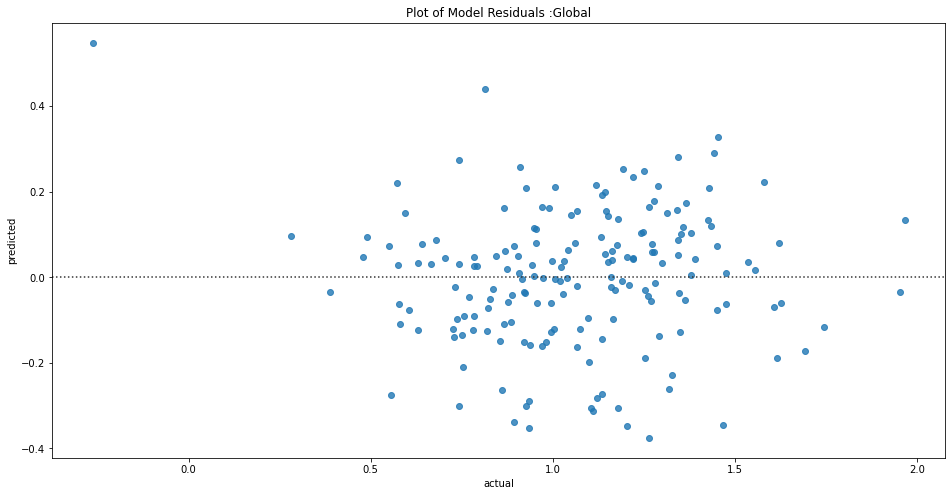

In [73]:
sarimax_model('Global',6)

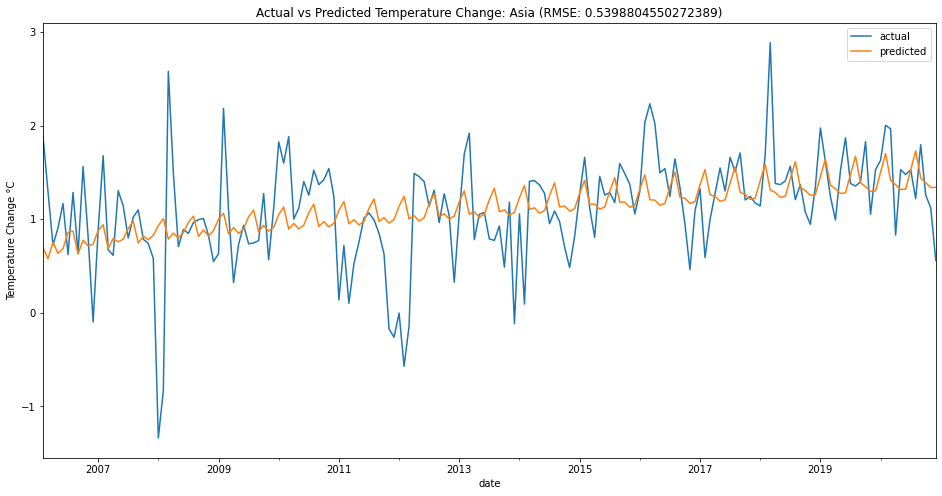

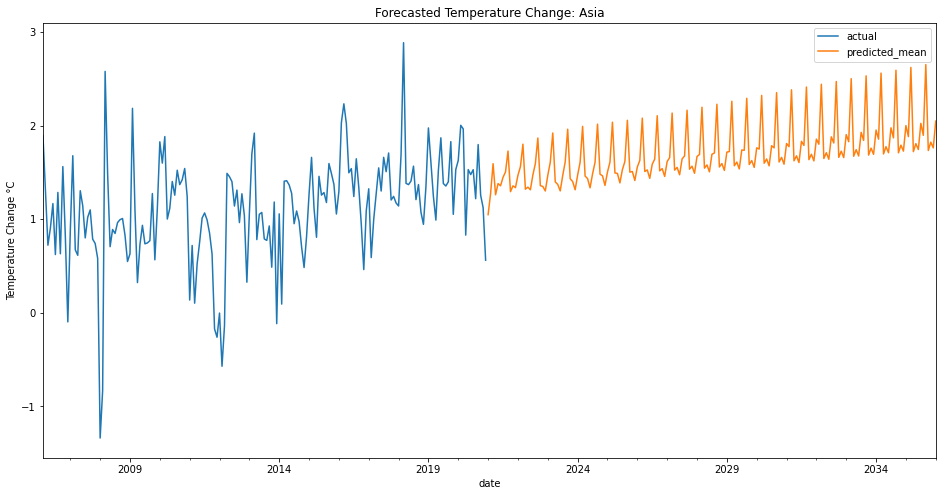

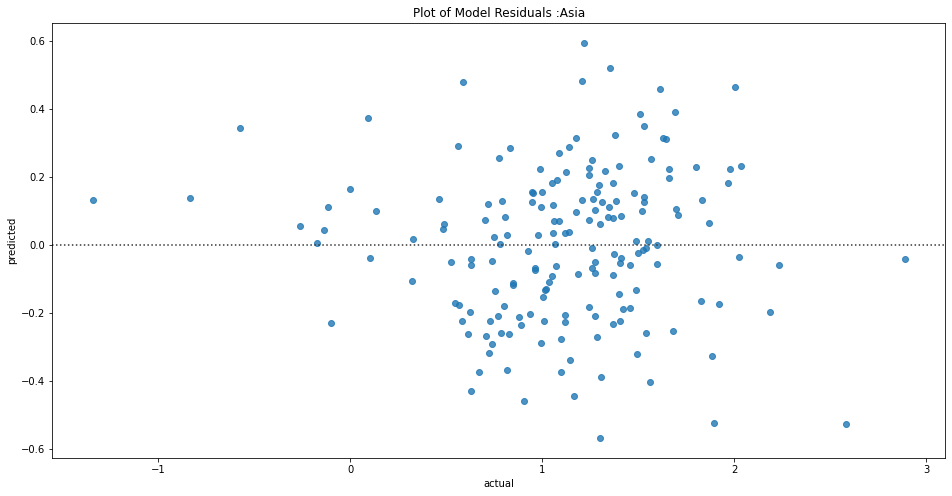

In [75]:
sarimax_model('Asia',6)

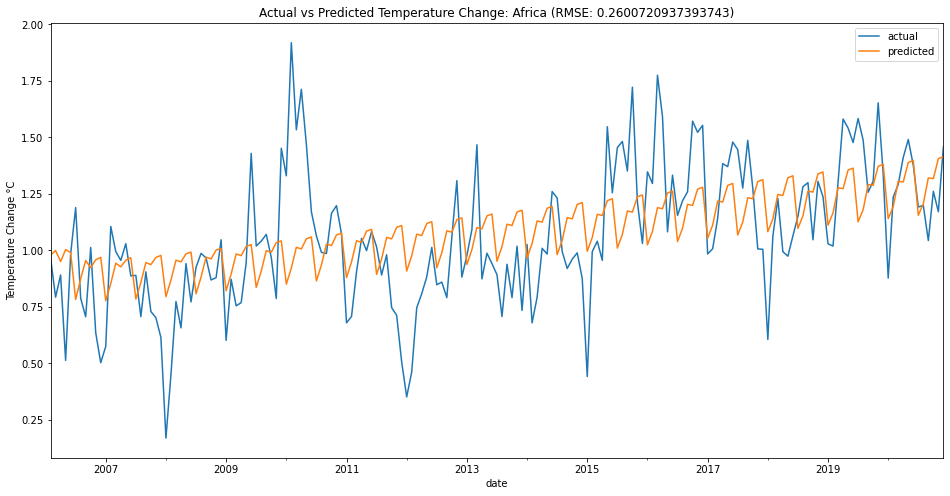

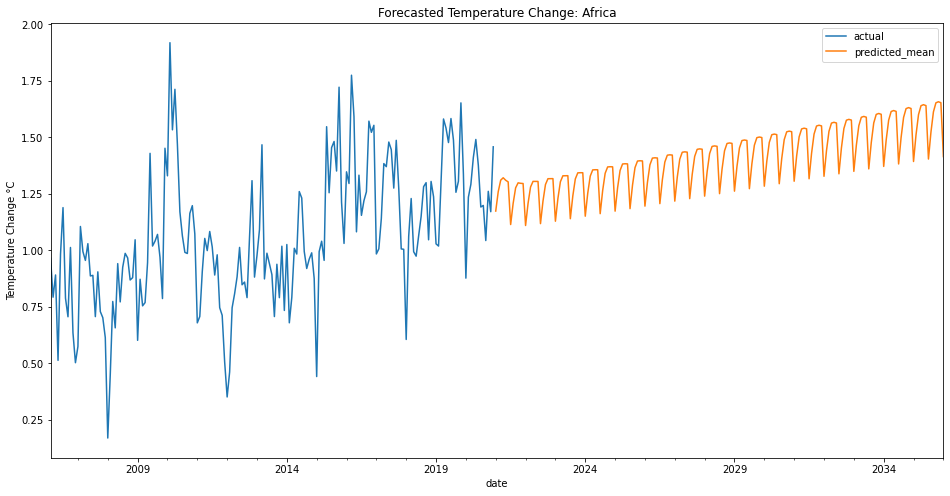

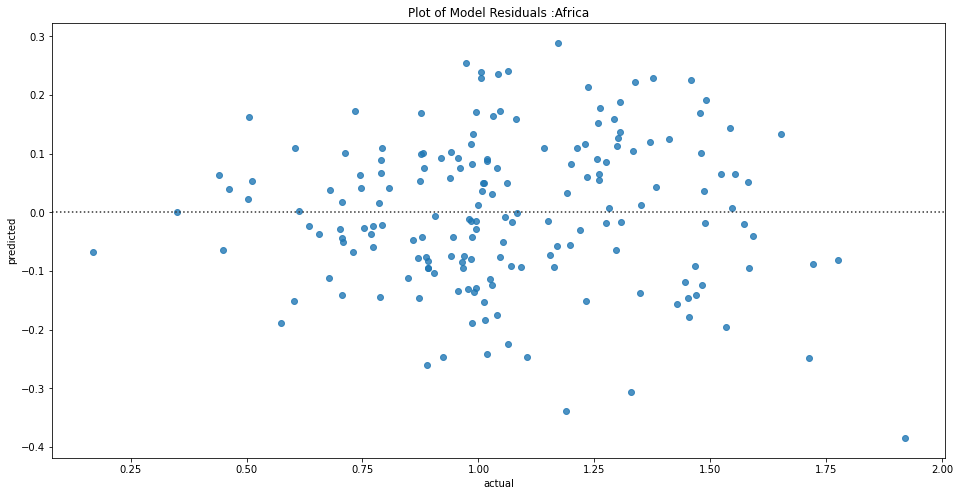

In [79]:
sarimax_model('Africa',6)

#Thanks for the attention



---



---



---



In [ ]:
print(f"Shape of the dataframe: {df_prod.shape[0]} rows and {df_prod.shape[1]} columns.")
print("\nColumns in this dataframe:\n", df_prod.columns)
df_prod.head()

Shape of the dataframe: 21477 rows and 63 columns.

Columns in this dataframe:
 Index(['Area Abbreviation', 'Area Code', 'Area', 'Item Code', 'Item',
       'Element Code', 'Element', 'Unit', 'latitude', 'longitude', 'Y1961',
       'Y1962', 'Y1963', 'Y1964', 'Y1965', 'Y1966', 'Y1967', 'Y1968', 'Y1969',
       'Y1970', 'Y1971', 'Y1972', 'Y1973', 'Y1974', 'Y1975', 'Y1976', 'Y1977',
       'Y1978', 'Y1979', 'Y1980', 'Y1981', 'Y1982', 'Y1983', 'Y1984', 'Y1985',
       'Y1986', 'Y1987', 'Y1988', 'Y1989', 'Y1990', 'Y1991', 'Y1992', 'Y1993',
       'Y1994', 'Y1995', 'Y1996', 'Y1997', 'Y1998', 'Y1999', 'Y2000', 'Y2001',
       'Y2002', 'Y2003', 'Y2004', 'Y2005', 'Y2006', 'Y2007', 'Y2008', 'Y2009',
       'Y2010', 'Y2011', 'Y2012', 'Y2013'],
      dtype='object')


Area Abbreviation  Area Code         Area  Item Code  \
0               AFG          2  Afghanistan       2511   
1               AFG          2  Afghanistan       2805   
2               AFG          2  Afghanistan       2513   
3               AFG          2  Afghanistan       2513   
4               AFG          2  Afghanistan       2514   

                       Item  Element Code Element         Unit  latitude  \
0        Wheat and products          5142    Food  1000 tonnes     33.94   
1  Rice (Milled Equivalent)          5142    Food  1000 tonnes     33.94   
2       Barley and products          5521    Feed  1000 tonnes     33.94   
3       Barley and products          5142    Food  1000 tonnes     33.94   
4        Maize and products          5521    Feed  1000 tonnes     33.94   

   longitude   Y1961   Y1962   Y1963   Y1964   Y1965   Y1966   Y1967   Y1968  \
0      67.71  1928.0  1904.0  1666.0  1950.0  2001.0  1808.0  2053.0  2045.0   
1      67.71   183.0   183.0   182.0   220.0   220.0   195.0   231.0   235.0   
2      67.71    76.0    76.0    76.0    76.0    76.0    75.0    71.0    72.0   
3      67.71   237.0   237.0   237.0   238.0   238.0   237.0   225.0   227.0   
4      67.71   210.0   210.0   214.0   216.0   216.0   216.0   235.0   232.0   

    Y1969   Y1970   Y1971   Y1972   Y1973   Y1974   Y1975   Y1976   Y1977  \
0  2154.0  1819.0  1963.0  2215.0  2310.0  2335.0  2434.0  2512.0  2282.0   
1   238.0   213.0   205.0   233.0   246.0   246.0   255.0   263.0   235.0   
2    73.0    74.0    71.0    70.0    72.0    76.0    77.0    80.0    60.0   
3   230.0   234.0   223.0   219.0   225.0   240.0   244.0   255.0   185.0   
4   236.0   200.0   201.0   216.0   228.0   231.0   234.0   240.0   228.0   

    Y1978   Y1979   Y1980   Y1981   Y1982   Y1983   Y1984   Y1985   Y1986  \
0  2454.0  2443.0  2129.0  2133.0  2068.0  1994.0  1851.0  1791.0  1683.0   
1   254.0   270.0   259.0   248.0   217.0   217.0   197.0   186.0   200.0   
2    65.0    64.0    64.0    60.0    55.0    53.0    51.0    48.0    46.0   
3   203.0   198.0   202.0   189.0   174.0   167.0   160.0   151.0   145.0   
4   234.0   228.0   226.0   210.0   199.0   192.0   182.0   173.0   170.0   

    Y1987   Y1988   Y1989   Y1990   Y1991   Y1992   Y1993   Y1994   Y1995  \
0  2194.0  1801.0  1754.0  1640.0  1539.0  1582.0  1840.0  1855.0  1853.0   
1   193.0   202.0   191.0   199.0   197.0   249.0   218.0   260.0   319.0   
2    46.0    47.0    46.0    43.0    43.0    40.0    50.0    46.0    41.0   
3   145.0   148.0   145.0   135.0   132.0   120.0   155.0   143.0   125.0   
4   154.0   148.0   137.0   144.0   126.0    90.0   141.0   150.0   159.0   

    Y1996   Y1997   Y1998   Y1999   Y2000   Y2001   Y2002   Y2003   Y2004  \
0  2177.0  2343.0  2407.0  2463.0  2600.0  2668.0  2776.0  3095.0  3249.0   
1   254.0   326.0   347.0   270.0   372.0   411.0   448.0   460.0   419.0   
2    44.0    50.0    48.0    43.0    26.0    29.0    70.0    48.0    58.0   
3   138.0   159.0   154.0   141.0    84.0    83.0   122.0   144.0   185.0   
4   108.0    90.0    99.0    72.0    35.0    48.0    89.0    63.0   120.0   

    Y2005   Y2006   Y2007   Y2008   Y2009   Y2010   Y2011  Y2012  Y2013  
0  3486.0  3704.0  4164.0  4252.0  4538.0  4605.0  4711.0   4810   4895  
1   445.0   546.0   455.0   490.0   415.0   442.0   476.0    425    422  
2   236.0   262.0   263.0   230.0   379.0   315.0   203.0    367    360  
3    43.0    44.0    48.0    62.0    55.0    60.0    72.0     78     89  
4   208.0   233.0   249.0   247.0   195.0   178.0   191.0    200    200

In [ ]:
# Delete unnecessary columns
df_prod.drop(columns=['Area Code', 'Item Code', 'Element Code', 'Unit'], inplace=True)

# Remove 'Y' from year's labels
df_prod.rename(columns={x:x[1:] for x in df_prod.columns if 'Y' in x}, inplace=True)

# Change the names of some labels
df_prod.rename(columns={'Area': 'country_name', 'Area Abbreviation':'country_code'}, inplace=True)

# Change in lower case all labels names
df_prod.rename(columns={x:x.lower() for x in df_prod.columns}, inplace=True)

Missing values and quantitative variables

In [ ]:
print("Dtype, Unique values and Missing values(%) of each column:")

df_prod_info= pd.DataFrame({"Dtype": df_prod.dtypes, 
                            "Unique values": df_prod.nunique(),
                            "Missing values(%)": round(df_prod.isnull().sum()/df_prod.shape[0]*100, 2)
                            }).rename_axis('Columns', axis='rows')                       

df_prod_info

Dtype, Unique values and Missing values(%) of each column:


Dtype  Unique values  Missing values(%)
Columns                                                
country_code   object            169               0.00
country_name   object            174               0.00
item           object            115               0.00
element        object              2               0.00
latitude      float64            173               0.00
longitude     float64            174               0.00
1961          float64           1197              16.48
1962          float64           1215              16.48
1963          float64           1209              16.48
1964          float64           1236              16.48
1965          float64           1259              16.48
1966          float64           1263              16.48
1967          float64           1283              16.48
1968          float64           1300              16.48
1969          float64           1309              16.48
1970          float64           1322              16.48
1971          float64           1351              16.48
1972          float64           1360              16.48
1973          float64           1374              16.48
1974          float64           1388              16.48
1975          float64           1405              16.48
1976          float64           1410              16.48
1977          float64           1411              16.48
1978          float64           1463              16.48
1979          float64           1473              16.48
1980          float64           1477              16.48
1981          float64           1469              16.48
1982          float64           1508              16.48
1983          float64           1528              16.48
1984          float64           1540              16.48
1985          float64           1538              16.48
1986          float64           1563              16.48
1987          float64           1592              16.48
1988          float64           1613              16.48
1989          float64           1622              16.48
1990          float64           1621              15.90
1991          float64           1632              15.90
1992          float64           1747               4.60
1993          float64           1785               2.85
1994          float64           1796               2.85
1995          float64           1796               2.85
1996          float64           1807               2.85
1997          float64           1810               2.85
1998          float64           1844               2.85
1999          float64           1859               2.85
2000          float64           1892               1.62
2001          float64           1881               1.62
2002          float64           1909               1.62
2003          float64           1935               1.62
2004          float64           1944               1.62
2005          float64           1963               1.62
2006          float64           1987               0.48
2007          float64           1994               0.48
2008          float64           2028               0.48
2009          float64           2029               0.48
2010          float64           2046               0.48
2011          float64           2081               0.48
2012            int64           2084               0.00
2013            int64           2107               0.00

The columns containing the highest percentages of missing values are those indicating the production data between 1961 and 1991.

As you can read in the dataset documentation:

(*The Food Balance sheet’s data was relatively complete. A few countries that do not exist anymore, such as Czechoslovakia, were deleted from the database. Countries which were formed Lately such as South Sudan were kept, even though they do not have all full data going back to 1961. [...])*

Thus, in a sense, it would seem that particular geopolitical evolutions of some countries are the cause of the unavailability of data.

I take a random sample where these missing values are present, trying to clarify and confirm the information contained in the dataset documentation.

In [ ]:
# Create a subset of the dataframe containing at least one missing value in the rows
df_null_rows = df_prod.loc[df_prod.isnull().any(axis=1)]
print(f'\nNumber of rows with missing values: {df_null_rows.shape[0]}')

# Set a random seed to make this cell pseudorandomic and reproducible
np.random.seed(0)

# Select a random sample of 5 elements
df_null_rows.sample(5)


Number of rows with missing values: 3539


country_code        country_name                   item element  \
17328          SVK            Slovakia    Millet and products    Feed   
13020          MNE          Montenegro    Apples and products    Food   
17526          SVN            Slovenia                Pigmeat    Food   
11128          LVA              Latvia                   Beer    Food   
16103          RUS  Russian Federation  Coconuts - Incl Copra    Food   

       latitude  longitude  1961  1962  1963  1964  1965  1966  1967  1968  \
17328     48.67      19.70   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
13020     42.71      19.37   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
17526     46.15      15.00   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11128     56.88      24.60   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16103     61.52     105.32   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
17328   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
13020   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
17526   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
11128   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16103   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  \
17328   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
13020   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
17526   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  49.0   
11128   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  88.0   
16103   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   

       1993  1994  1995  1996  1997  1998   1999  2000   2001   2002   2003  \
17328   1.0   1.0   1.0   1.0   0.0   0.0    1.0   1.0    1.0    1.0    1.0   
13020   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN    NaN    NaN    NaN   
17526  81.0  84.0  75.0  70.0  73.0  77.0   87.0  76.0   82.0   78.0   88.0   
11128  53.0  66.0  67.0  66.0  73.0  82.0  100.0  99.0  105.0  134.0  142.0   
16103   0.0   1.0   1.0   2.0   2.0  10.0   10.0  21.0   28.0   42.0   45.0   

        2004   2005   2006   2007   2008   2009   2010   2011  2012  2013  
17328    2.0    0.0    0.0    1.0    1.0    1.0    0.0    1.0     1     1  
13020    NaN    NaN   11.0   19.0   34.0   38.0   33.0   27.0    14    13  
17526   88.0   88.0   89.0   84.0   84.0   80.0   81.0   76.0    69    58  
11128  124.0  144.0  147.0  158.0  156.0  146.0  164.0  172.0   163   156  
16103   47.0   52.0   45.0   59.0   42.0   39.0   48.0   63.0    57    63

In fact, in these five randomly selected countries: Slovakia, Montenegro, Slovenia, Latvia and Russian Federation, production data are missing from 1961 to 1991 (Montenegro until 2005).

Looking for information on the geopolitical history of these countries you can read:
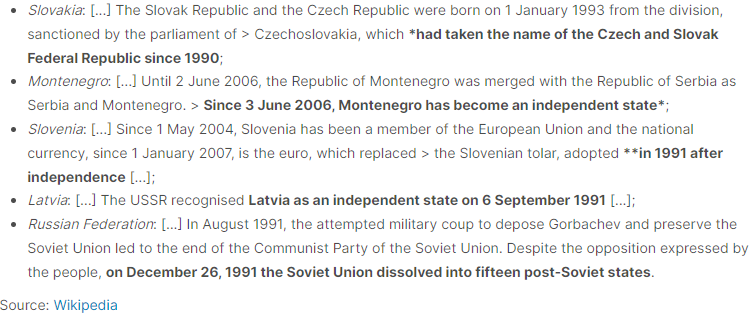

This result is in line with the documentation of the dataset, justifying the background regarding the presence of missing values.

Is it convenient to delete lines with missing values from the dataframe, or do you risk losing too much of information? I’m running a test to check.

In [ ]:
# Create a copy of the dataframe to test the drop of rows with missing values
test_drop = df_prod.dropna()

# Calculate the percentage of deleted data 
rows_removal_perc = round((1-test_drop.shape[0]/df_prod.shape[0])*100,2)

print(f"\nRows in the original dataframe: {df_prod.shape[0]}.") 

print(f"\nDataframe rows after removing missing values: {test_drop.shape[0]}")

print(f'\nRemoving lines that contain NaN values has eliminated {rows_removal_perc}% of the data!')


Rows in the original dataframe: 21477.

Dataframe rows after removing missing values: 17938

Removing lines that contain NaN values has eliminated 16.48% of the data!


In my opinion, in this case data loss is tolerable. Therefore, I will continue the study of this dataset by adopting this procedure.

To finish cleaning the quantitative variables I delete all the rows where the production values over the entire time period are zero or negative and I transform all the numerical values into int64.

In [ ]:
# Select a dataframe subset containing all the columns of production years
prod_values = test_drop.loc[:, '1961':]

# Get the indexes of rows containing at least one negative number and all 0 from 1961 to 2013
idx_to_drop = prod_values.loc[((prod_values < 0).any(axis=1)) | (prod_values == 0).all(axis=1)].index

# Delete all rows with these indexes
test_drop.drop(idx_to_drop, inplace=True)

# Rename the dataframe and reset the index
df_prod = test_drop.reset_index(drop=True)

# Transform number values to 'int64'
df_prod.loc[:, '1961':] = df_prod.loc[:, '1961':].astype('int64')

In [ ]:
# Checking duplicates
df_prod.loc[df_prod.duplicated()].sample(5)

country_code          country_name                     item element  \
2189           CMR              Cameroon                     Eggs    Food   
442            ATG   Antigua and Barbuda  Milk - Excluding Butter    Food   
7469           JPN                 Japan  Milk - Excluding Butter    Food   
13884          ARE  United Arab Emirates  Milk - Excluding Butter    Food   
10212          NER                 Niger  Milk - Excluding Butter    Food   

       latitude  longitude  1961  1962  1963  1964  1965  1966  1967  1968  \
2189       7.37      12.35     2     2     2     3     3     4     4     5   
442       17.06     -61.80     6     5     5     5     5     4     5     5   
7469      36.20     138.25  2324  2740  3309  3679  3748  4083  4699  4868   
13884     23.42      53.85    14    14    14    14    14    18    19    21   
10212     17.61       8.08   189   196   202   209   216   230   237   243   

       1969  1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  \
2189      5     5     5     5     5     6     6     6     6     6     6     7   
442       6     6     6     6     6     6     6     6     7     7     8     9   
7469   5241  5439  5331  5648  5710  5964  5693  6456  7277  7912  8111  7905   
13884    24    27    28    33    55    78    73   126   129   149   183   219   
10212   258   283   270   238   225   242   275   300   302   312   328   330   

       1981  1982  1983  1984  1985  1986  1987  1988  1989  1990   1991  \
2189      7     8     9     7     8    10     9     9    10    10      9   
442       9     9     9     9     9     8     8     9     9     9      8   
7469   7814  8098  8367  8426  8831  8774  8774  9509  9630  9540  10065   
13884   197   232   225   278   243   245   300   300   299   319    322   
10212   351   357   411   329   286   287   297   317   305   417    387   

        1992   1993   1994   1995   1996   1997   1998   1999   2000   2001  \
2189      10     10     10     10      9     10     10      9     10     10   
442        9      8      9     10      9     10      9      9     10     10   
7469   10222  10080  10026  10287  10371  10374  10230  10153  10270  10063   
13884    361    363    364    345    372    333    322    406    432    363   
10212    445    472    477    529    533    556    595    611    633    664   

        2002   2003   2004  2005  2006  2007  2008  2009  2010  2011  2012  \
2189      10     10      9     8     8     7     7     8     8     8     8   
442       10     10      8    10     9    11    11    11    11    12    11   
7469   10086  10017  10040  9900  9593  9740  9406  9357  9241  9071  9293   
13884    495    511    467   441   555   739  1007  1077  1025   983   976   
10212    708    736    764   806   842   887   930   955   966   973  1050   

       2013  
2189      9  
442      11  
7469   9162  
13884  1240  
10212  1051

In [ ]:
# Delete duplicates
df_prod.drop_duplicates(inplace=True)

# Reset index of the dataframe
df_prod.reset_index(drop=True, inplace=True)

**Qualitative variables - Country names**

A very useful tool to control qualitative variables is fuzzywuzzy.

Compared to looking for duplicates before, with this function I can evaluate the similarity in nomenclature between different elements and then quickly notice if some items have been encoded in an incongruous way (e.g. the country 'X, Republic of' is also present in the dataset under 'Republic of X').

I write a function that will be useful on several occasions to check the similarity between qualitative variables.

In [ ]:
def fuzz_finder(dictionary, test, target, treshold, first, last, show):

    """This function inserts in a dictionary at will the best matches between the names 
    of the elements of two lists, 'test' and 'target'. 
    Note: The dictionary must be already initialized before running the function.  

    The dictionary keys correspond to the names of the items to be tested, 
    while the values correspond to the list of items obtained for best match. 
    To test the elements of a list with itself it is sufficient to indicate it both as 'test' and as 'target'.
     
    You must specify a 'treshold', a number between 0 and 100, as the threshold score to be reached 
    between the first and second items in comparison. To perform a finer search, assign the value 'treshold'
    a number close to 100. By default the score refers to the comparison of the test element with the second target element.
    
    With 'first' and 'last' you decide the first and last item to be inserted in the list of values in the dictionary.  
    
    The resulting dictionary is transformed into a dataframe to improve the output. Setting 'show' = True 
    you can decide whether or not to display the output of the function.""" 

    for item in test:
      # Returns a list of tuples containing element's name and its score
        matches = fuzzywuzzy.process.extract(item, target, limit=None, scorer=fuzzywuzzy.fuzz.token_sort_ratio)
        
        if matches[1][1] >= treshold and first != last:        

            key = item 
            
            values = [(matches[n][0], matches[n][1]) for n in range(first,last+1)]
            
            dictionary[key] = values
        
        elif matches[1][1] >= treshold and first == last:

            key = item

            value = (matches[first][0], matches[first][1])

            dictionary[key] = value

    if show:

        df_result = pd.DataFrame.from_dict(dictionary)
        return df_result

In [ ]:
# Initialize a dictionary where to insert the correspondences
country_dict = {}

# List of items to test
test_target_list = df_prod.country_name.unique()

# Best matches with the first 4 items in order of score
fuzz_finder(dictionary=country_dict, test=test_target_list, target=test_target_list, treshold=85, first=1, last=4, show=True)

Australia           Austria   Democratic People's Republic of Korea  \
0     (Austria, 88)   (Australia, 88)  (Lao People's Democratic Republic, 87)   
1  (Mauritania, 63)  (Costa Rica, 59)                 (Republic of Korea, 63)   
2   (Guatemala, 56)  (Mauritania, 59)        (Iran (Islamic Republic of), 52)   
3      (Israel, 53)     (Algeria, 57)                (Dominican Republic, 51)   

             Iceland            Ireland  \
0      (Ireland, 86)      (Iceland, 86)   
1      (Finland, 71)      (Finland, 71)   
2  (Switzerland, 67)  (Switzerland, 67)   
3     (Thailand, 67)     (Thailand, 67)   

              Lao People's Democratic Republic  
0  (Democratic People's Republic of Korea, 90)  
1                     (Dominican Republic, 56)  
2             (Iran (Islamic Republic of), 54)  
3     (Venezuela (Bolivarian Republic of), 47)

There are no duplicate or badly formatted entries between country names.

I perform the same procedure to search for duplicate or badly formatted entries between feed/food names in the dataframe

In [ ]:
# Initialize a dictionary where to insert the correspondences
item_dict = {}

# List of items to test
test_target_list = df_prod.item.unique()

# Best matches with the first 3 items in order of score. To display the outupt set 'show' = True
fuzz_finder(dictionary=item_dict, test=test_target_list, target=test_target_list, treshold=75, first=1, last=3, show=False)

Nothing happende, but I noticed that there is an inconsistency ('Beverages, Alcoholic' with 'Alcoholic Beverages'). 

In addition in some cases, the formatting used to make this dataset is ambiguous in some cases (e.g. 'Vegetables' and 'Vegetables, Other', what is the substantial difference between these two items?). The documentation of the dataset does not help to understand the differences between these items.

In [ ]:
# Resolve the inconsistency
df_prod.item.replace({'Beverages, Alcoholic':'Alcoholic Beverages'}, inplace=True)

I change the configuration from wide format to long format to view the data more easily, but especially to be able to handle them better.

In [ ]:
df_prod = df_prod.melt(

    id_vars=['country_code', 'country_name', 'item', 'element', 'latitude', 'longitude'], 
    value_vars=[str(n) for n in range(1961, 2013+1)], 
    var_name="years", 
    value_name="production")

df_prod.head()

country_code country_name                      item element  latitude  \
0          AFG  Afghanistan        Wheat and products    Food     33.94   
1          AFG  Afghanistan  Rice (Milled Equivalent)    Food     33.94   
2          AFG  Afghanistan       Barley and products    Feed     33.94   
3          AFG  Afghanistan       Barley and products    Food     33.94   
4          AFG  Afghanistan        Maize and products    Feed     33.94   

   longitude years  production  
0      67.71  1961        1928  
1      67.71  1961         183  
2      67.71  1961          76  
3      67.71  1961         237  
4      67.71  1961         210

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import style
style.use('seaborn')
%matplotlib inline

In [ ]:
# Load the global temperature dataset and store it in a dataframe
orig_temp_data = pd.read_csv('/content/sample_data/GlobalTemperatures.csv')
global_temp_df = orig_temp_data.copy()

global_temp_df.head()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
0  1750-01-01                   3.034                              3.574   
1  1750-02-01                   3.083                              3.702   
2  1750-03-01                   5.626                              3.076   
3  1750-04-01                   8.490                              2.451   
4  1750-05-01                  11.573                              2.072   

   LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
0                 NaN                            NaN                 NaN   
1                 NaN                            NaN                 NaN   
2                 NaN                            NaN                 NaN   
3                 NaN                            NaN                 NaN   
4                 NaN                            NaN                 NaN   

   LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
0                            NaN                             NaN   
1                            NaN                             NaN   
2                            NaN                             NaN   
3                            NaN                             NaN   
4                            NaN                             NaN   

   LandAndOceanAverageTemperatureUncertainty  
0                                        NaN  
1                                        NaN  
2                                        NaN  
3                                        NaN  
4                                        NaN

In [ ]:
global_temp_df.tail()

dt  LandAverageTemperature  LandAverageTemperatureUncertainty  \
3187  2015-08-01                  14.755                              0.072   
3188  2015-09-01                  12.999                              0.079   
3189  2015-10-01                  10.801                              0.102   
3190  2015-11-01                   7.433                              0.119   
3191  2015-12-01                   5.518                              0.100   

      LandMaxTemperature  LandMaxTemperatureUncertainty  LandMinTemperature  \
3187              20.699                          0.110               9.005   
3188              18.845                          0.088               7.199   
3189              16.450                          0.059               5.232   
3190              12.892                          0.093               2.157   
3191              10.725                          0.154               0.287   

      LandMinTemperatureUncertainty  LandAndOceanAverageTemperature  \
3187                          0.170                          17.589   
3188                          0.229                          17.049   
3189                          0.115                          16.290   
3190                          0.106                          15.252   
3191                          0.099                          14.774   

      LandAndOceanAverageTemperatureUncertainty  
3187                                      0.057  
3188                                      0.058  
3189                                      0.062  
3190                                      0.063  
3191                                      0.062

After observing the data, remove the data not required for the analysis and keep only the relevant data. The column 'LandAndOceanAverageTemperature' gives information about the overall earth temperature.

The global temperature dataset has monthly granularity. It can be resampled annually to reduce the number of entries, without losing the average temperature information.

In [ ]:
# Choose the required columns
global_temp_df = global_temp_df[['dt', 'LandAndOceanAverageTemperature']]

# Set the date column as a DateTimeIndex and sort it
global_temp_df['dt'] = pd.to_datetime(global_temp_df['dt'])
global_temp_df.set_index('dt', inplace = True)
global_temp_df.sort_index(axis = 0, inplace = True)

# Resample annually and rename index & columns
global_temp_df = global_temp_df.resample('A').mean()
global_temp_df.rename(columns = {'LandAndOceanAverageTemperature': 'AnnualAverageTemp'}, inplace = True)
global_temp_df.index.rename('Year', inplace = True)
global_temp_df.index = global_temp_df.index.year

<ipython-input-4-fd3896b19be7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  global_temp_df['dt'] = pd.to_datetime(global_temp_df['dt'])


In [ ]:
# Check the number of missing values and the corresponding years
print(global_temp_df.isnull().sum())
print(global_temp_df[global_temp_df['AnnualAverageTemp'].isnull()].index)

AnnualAverageTemp    100
dtype: int64
Int64Index([1750, 1751, 1752, 1753, 1754, 1755, 1756, 1757, 1758, 1759, 1760,
            1761, 1762, 1763, 1764, 1765, 1766, 1767, 1768, 1769, 1770, 1771,
            1772, 1773, 1774, 1775, 1776, 1777, 1778, 1779, 1780, 1781, 1782,
            1783, 1784, 1785, 1786, 1787, 1788, 1789, 1790, 1791, 1792, 1793,
            1794, 1795, 1796, 1797, 1798, 1799, 1800, 1801, 1802, 1803, 1804,
            1805, 1806, 1807, 1808, 1809, 1810, 1811, 1812, 1813, 1814, 1815,
            1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826,
            1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836, 1837,
            1838, 1839, 1840, 1841, 1842, 1843, 1844, 1845, 1846, 1847, 1848,
            1849],
           dtype='int64', name='Year')


The first hundred years from 1750 don't have temperature values. Drop those entries to begin the analysis from 1850 onwards.

In [ ]:
global_temp_df.dropna(inplace = True)

In [ ]:
# Calculate the global baseline temperature
global_ref_temp = global_temp_df.loc['1951':'1980'].mean()['AnnualAverageTemp'] 

# Create the temperature anomaly column
global_temp_df['Temperature Anomaly'] = global_temp_df['AnnualAverageTemp'] - global_ref_temp
global_temp_df.drop(['AnnualAverageTemp'], axis = 1, inplace = True)

global_temp_df.head()

Temperature Anomaly
Year                     
1850            -0.432381
1851            -0.307714
1852            -0.293047
1853            -0.344381
1854            -0.308547

In [ ]:
global_temp_df.tail()

Temperature Anomaly
Year                     
2011             0.469953
2012             0.502786
2013             0.554869
2014             0.613453
2015             0.759036

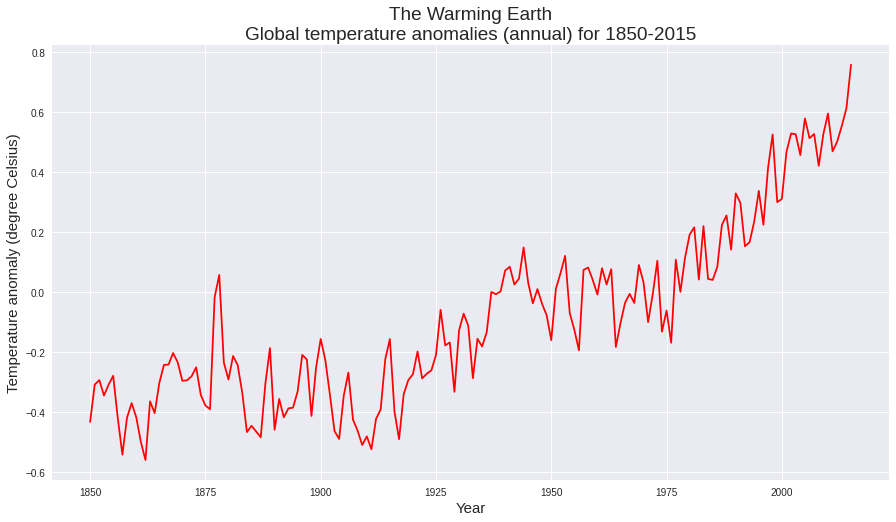

In [ ]:
# Plot the temperature anomaly
plt.figure(figsize = (15, 8))

plt.plot(global_temp_df['Temperature Anomaly'], 'r')

plt.title('The Warming Earth\nGlobal temperature anomalies (annual) for 1850-2015', fontsize = 19)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Temperature anomaly (degree Celsius)', fontsize = 15)

plt.show()

Global food and feed production comparison

In [ ]:
elements = df_prod.element.value_counts()

fig = px.pie(
    values=elements.values, 
    names=elements.index,
    
    color=elements.index,
    color_discrete_map={
        'Feed':'brown',
        'Food':'orange'})

fig.update_traces(
    textinfo='label+percent',
    insidetextfont = dict(color = 'black'))

fig.update_layout(
    width=500,
    height=400,
    
    title='Counting of food and feed elements in the Dataframe',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    showlegend= True,
    legend_itemclick=False)

fig.show()


In [ ]:
 # Group together all food and feed items and sum the production values of each year
food_feed_prod = df_prod.groupby(['element', 'years'])['production'].sum().reset_index()

fig = px.line(
    food_feed_prod, 
    x="years",
    y="production", 
    
    color='element',
    color_discrete_map={
        'Feed':'brown',
        'Food':'orange'},
    
    labels=dict(
        element='Elements',
        years='Years',
        production='Production'))

fig.update_layout(
    width=900,

    title='Production of food and feed from 1961 to 2013',
    title_x = 0.5,
    title_y = 0.95,
    title_xanchor='center',
    title_yanchor='top',

    showlegend= True,
    legend_itemclick=False,

    yaxis = dict(title='Production (1000 tons)'),
    xaxis = dict(
        tickmode = 'linear',
        tick0 = 0, 
        dtick = 4)) # Reducing ticks for cleaner graphic output   

fig.show()